In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
'''

class2 = gwls[['D4N0139', 'D4N0140' ,'D4N0141' ,'D4N0142','2526CC00029','2526CC00255']]

  
pima1 = pima['Precipitation']


ax1 = class2.plot(figsize=(20,10), linewidth=1, fontsize = 20, grid=True, marker="o")
ax2 = pima1.plot(secondary_y=True, legend=True, linewidth=1, marker="o", grid=True, color='purple') #Precipitation

ax1.set_ylim(-50,0)
ax2.set_ylim(0,800) #(0, 800) for Precipitation and (0,5) for discharge



ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),ncol=12, prop={'size': 16});
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),ncol=12, prop={'size': 16});

ax1.set_title('Groundwater levels vs Precipitation',fontsize=20) #'Groundwater levels vs Precipitation'
ax1.set_xlabel('Year',fontsize=20)
ax1.set_ylabel('Groundwater level (m)',fontsize=20)
ax2.set_ylabel('Precipitation (mm)',fontsize=20) #Discharge #Precipitation (mm)
'''


'\n\nclass2 = gwls[[\'D4N0139\', \'D4N0140\' ,\'D4N0141\' ,\'D4N0142\',\'2526CC00029\',\'2526CC00255\']]\n\n  \npima1 = pima[\'Precipitation\']\n\n\nax1 = class2.plot(figsize=(20,10), linewidth=1, fontsize = 20, grid=True, marker="o")\nax2 = pima1.plot(secondary_y=True, legend=True, linewidth=1, marker="o", grid=True, color=\'purple\') #Precipitation\n\nax1.set_ylim(-50,0)\nax2.set_ylim(0,800) #(0, 800) for Precipitation and (0,5) for discharge\n\n\n\nax1.legend(loc=\'upper center\', bbox_to_anchor=(0.5, -0.12),ncol=12, prop={\'size\': 16});\nax2.legend(loc=\'upper center\', bbox_to_anchor=(0.5, -0.20),ncol=12, prop={\'size\': 16});\n\nax1.set_title(\'Groundwater levels vs Precipitation\',fontsize=20) #\'Groundwater levels vs Precipitation\'\nax1.set_xlabel(\'Year\',fontsize=20)\nax1.set_ylabel(\'Groundwater level (m)\',fontsize=20)\nax2.set_ylabel(\'Precipitation (mm)\',fontsize=20) #Discharge #Precipitation (mm)\n'

In [3]:
df = pd.read_excel('/Users/yolanda/Downloads/excel_file1.xlsx')
df.set_index('year_month', inplace=True)

p = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_3.xlsx')
p.set_index('year_month', inplace=True)
v = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_2.xlsx')
v.set_index('year_month', inplace=True)
w = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_4.xlsx')
w.set_index('year_month', inplace=True)
z = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_5.xlsx')
z.set_index('year_month', inplace=True)

In [4]:
#df['scenario_usage'] = w['Usage']
df['D4N0140'] = p[' D4N0140']
df['D4N0141'] = p[' D4N0141']
df['D4N0142'] = p[' D4N0142']
df['D4N0139'] = p[' D4N0139']
df['2526CC00029'] = p['2526CC00029']
df['2526CC00255'] = p[' 2526CC00255']

In [5]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  D4N0140  D4N0141  D4N0142  \
year_month                                                                     
1950-01-01                NaN                 NaN      NaN      NaN      NaN   
1950-02-01                NaN                 NaN      NaN      NaN      NaN   
1950-03-01                NaN                 NaN      NaN      NaN      NaN   
1950-04-01                NaN                 NaN      NaN      NaN      NaN   
1950-05-01                NaN                 NaN      NaN      NaN      NaN   
...                       ...                 ...      ...      ...      ...   
2019-08-01                NaN                 NaN      NaN      NaN      NaN   
2019-09-01                NaN                 NaN      NaN      NaN      NaN   
2019-10-01                NaN                 NaN      NaN      NaN      NaN   
2019-11-01                NaN                 NaN      NaN      NaN      NaN   
2019-12-01                NaN                 NaN      NaN      NaN      NaN   

            D4N0139  2526CC00029  2526CC00255  
year_month                                     
1950-01-01      NaN          NaN          NaN  
1950-02-01      NaN          NaN          NaN  
1950-03-01      NaN          NaN          NaN  
1950-04-01      NaN          NaN          NaN  
1950-05-01      NaN         

In [6]:
df = df[['D4N0139', 'D4N0140' ,'D4N0141' ,'D4N0142','2526CC00029','2526CC00255','Temperature' ,'Precipitation' ,'Discharge' ,'scenario_usage']]

In [7]:
df

D4N0139  D4N0140  D4N0141  D4N0142  2526CC00029  2526CC00255  \
year_month                                                                 
1950-01-01      NaN      NaN      NaN      NaN          NaN          NaN   
1950-02-01      NaN      NaN      NaN      NaN          NaN          NaN   
1950-03-01      NaN      NaN      NaN      NaN          NaN          NaN   
1950-04-01      NaN      NaN      NaN      NaN          NaN          NaN   
1950-05-01      NaN      NaN      NaN      NaN          NaN          NaN   
...             ...      ...      ...      ...          ...          ...   
2019-08-01      NaN      NaN      NaN      NaN          NaN          NaN   
2019-09-01      NaN      NaN      NaN      NaN          NaN          NaN   
2019-10-01      NaN      NaN      NaN      NaN          NaN          NaN   
2019-11-01      NaN      NaN      NaN      NaN          NaN          NaN   
2019-12-01      NaN      NaN      NaN      NaN          NaN          NaN   

            Temperature  Precipitation  Discharge  scenario_usage  
year_month                                                         
1950-01-01        23.90           95.9        NaN             NaN  
1950-02-01        25.10           52.8        NaN             NaN  
1950-03-01        23.75           71.4        NaN             NaN  
1950-04-01        19.65           58.6        NaN             NaN  
1950-05-01        14.60           27.7        NaN             NaN  
...                 ...            ...        ...             ...  
2019-08-01          NaN            NaN        NaN             0.0  
2019-09-01          NaN            NaN        NaN             0.0  
2019-10-01          NaN            NaN        NaN             0.0  
2019-11-01          NaN            NaN        NaN             0.0  
2019-12-01          NaN            NaN        NaN             0.0  

[840 rows x 10 columns]

In [8]:
f = lambda x: -x; 
gwls = df[['D4N0139', 'D4N0140' ,'D4N0141' ,'D4N0142','2526CC00029','2526CC00255']].apply(f, axis=1)

#### checking when each varibale starts and ends 

In [9]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
gwls.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0139    D4N0140    D4N0141    D4N0142 2526CC00029 2526CC00255
0 1977-02-01 1977-01-01 1977-01-01 1977-01-01  1976-01-01  1977-02-01
1 2019-02-01 2017-09-01 2014-05-01 2017-08-01  2017-09-01  2014-09-01

#### Limiting period based on minimum start of all 6 bh's and maximum finish of all 6 bh's

In [10]:

gwls = gwls[gwls.index > '1976-12-01']  
gwls = gwls[gwls.index < '2016-12-01']  

#### These boreholes are the onles with less that 32% missing data. 

Text(0, 0.5, 'Groundwater levels')

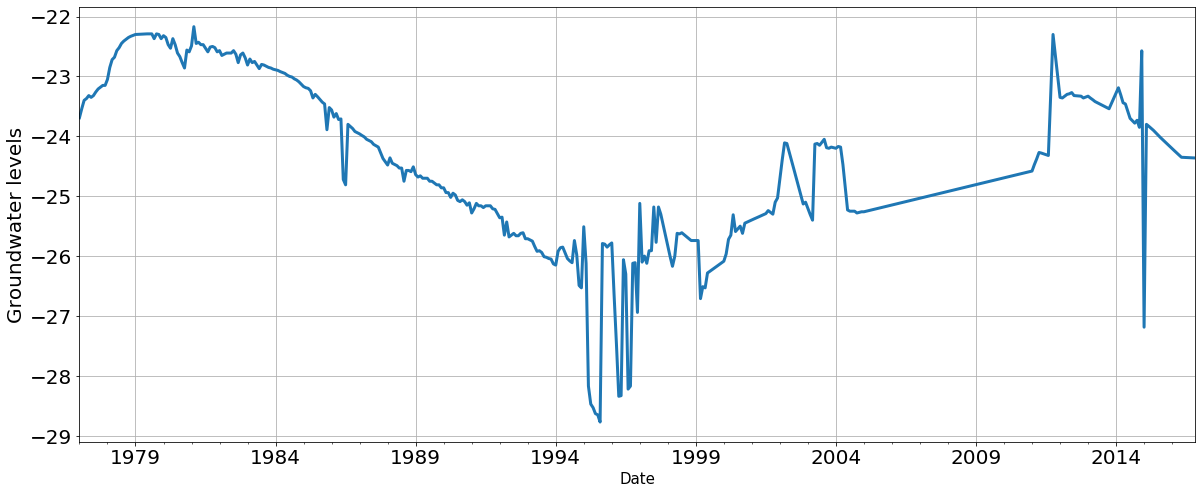

In [11]:
#visual illustration just to show all groundwater levels 

gwls['D4N0142'].plot(figsize=(20,8), linewidth=3, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [12]:
gwls['Temperature'] = df['Temperature']
gwls['Precipitation'] = df['Precipitation']
gwls['Discharge'] = df['Discharge']
gwls['scenario_usage'] = df['scenario_usage']
gwls

D4N0139    D4N0140  D4N0141    D4N0142  2526CC00029  \
year_month                                                          
1977-01-01        NaN -22.950000   -12.37 -23.690000       -22.95   
1977-02-01 -22.310000 -22.818644   -12.57 -23.537627          NaN   
1977-03-01 -22.160000 -22.700000   -12.28 -23.400000       -22.70   
1977-04-01 -22.300000 -22.630000   -12.22 -23.370000       -22.63   
1977-05-01 -22.410000 -22.690000   -12.20 -23.320000       -22.69   
...               ...        ...      ...        ...          ...   
2016-07-01 -27.004783 -24.581791      NaN -24.354004          NaN   
2016-08-01 -27.180000 -24.572537      NaN -24.356039          NaN   
2016-09-01 -27.355217 -24.563284      NaN -24.358074          NaN   
2016-10-01 -27.524783 -24.554328      NaN -24.360044          NaN   
2016-11-01 -27.700000 -24.545075      NaN -24.362079          NaN   

            2526CC00255  Temperature  Precipitation  Discharge  scenario_usage  
year_month                                                                      
1977-01-01          NaN          NaN           65.8      1.041      436477.250  
1977-02-01       -38.00        24.40          122.5      1.092      436477.250  
1977-03-01       -38.12        20.70          124.0        NaN      436477.250  
1977-04-01       -38.16        19.60           28.7        NaN      436477.250  
1977-05-01       -38.25          NaN            0.0      1.406      436477.250  
...                 ...          ...            ...        ...             ...  
2016-07-01          NaN        10.40           11.0      0.269     1291604.875  
2016-08-01          NaN        13.90           11.2      0.280     1291604.875  
2016-09-01          NaN        18.70            0.0      0.260     1291604.875  
2016-10-01          NaN        20.95            6.4      0.252     1291604.875  
2016-11-01          NaN        22.40           35.4      0.242     1291604.875  

[479 rows x 10 columns]

### Reframing length of dataset based on bhid D4N0115 start and end dates 

In [13]:
pima = gwls.filter(['D4N0142', 'Temperature', 'Precipitation', 'Discharge', 'scenario_usage'])


In [14]:
pima.apply(lambda x: sum(x.isnull()), axis=0)

D4N0142            0
Temperature       13
Precipitation     31
Discharge         65
scenario_usage     0
dtype: int64

#### Interpolating independant varibales only 

In [15]:
pima['Discharge']= pima['Discharge'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['Precipitation']= pima['Precipitation'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['Temperature']= pima['Temperature'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

#### Calculating start and end dates for new dataframa

In [16]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
pima.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0142 Temperature Precipitation  Discharge scenario_usage
0 1977-01-01  1977-01-01    1977-01-01 1977-01-01     1977-01-01
1 2016-11-01  2016-11-01    2016-11-01 2016-11-01     2016-11-01

### Mutual information stats

In [17]:
from sklearn.feature_selection import mutual_info_regression

In [18]:
X = pima[['Temperature', 'Precipitation', 'Discharge','scenario_usage']] # Features
y = pima[['D4N0142']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0142','D4N0115','D4N0110' 

In [19]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature       0.008636
Precipitation     0.040439
Discharge         0.385843
scenario_usage    1.000000
dtype: float64

## LAG TESTING 

In [20]:
precip1  = pima.filter(['D4N0142', 'Precipitation'])
discha1 = pima.filter(['D4N0142', 'Discharge'])
temp1   = pima.filter(['D4N0142', 'Temperature'])
abstr1   = pima.filter(['D4N0142', 'scenario_usage'])

In [21]:
lags = range(1, 24)  # 2year lag

# Precipitation
precip = precip1.assign(**{ '{} (t-{})'.format([ 'Precipitation'], t): precip1[[ 'Precipitation']].shift(t) for t in lags for col in precip1})
# disharge
discha = discha1.assign(**{ '{} (t-{})'.format([ 'Discharge'], t): discha1[[ 'Discharge']].shift(t) for t in lags for col in discha1})
# temperature
temp = temp1.assign(**{ '{} (t-{})'.format([ 'Temperature'], t): temp1[[ 'Temperature']].shift(t) for t in lags for col in temp1})
# scenario_usage
abstr = abstr1.assign(**{ '{} (t-{})'.format([ 'scenario_usage'], t): abstr1[[ 'scenario_usage']].shift(t) for t in lags for col in abstr1})

## Cross Correlation

- degree of similarity between two time series in different times or space 
- lag is considred since time is under investigation

### Rainfall

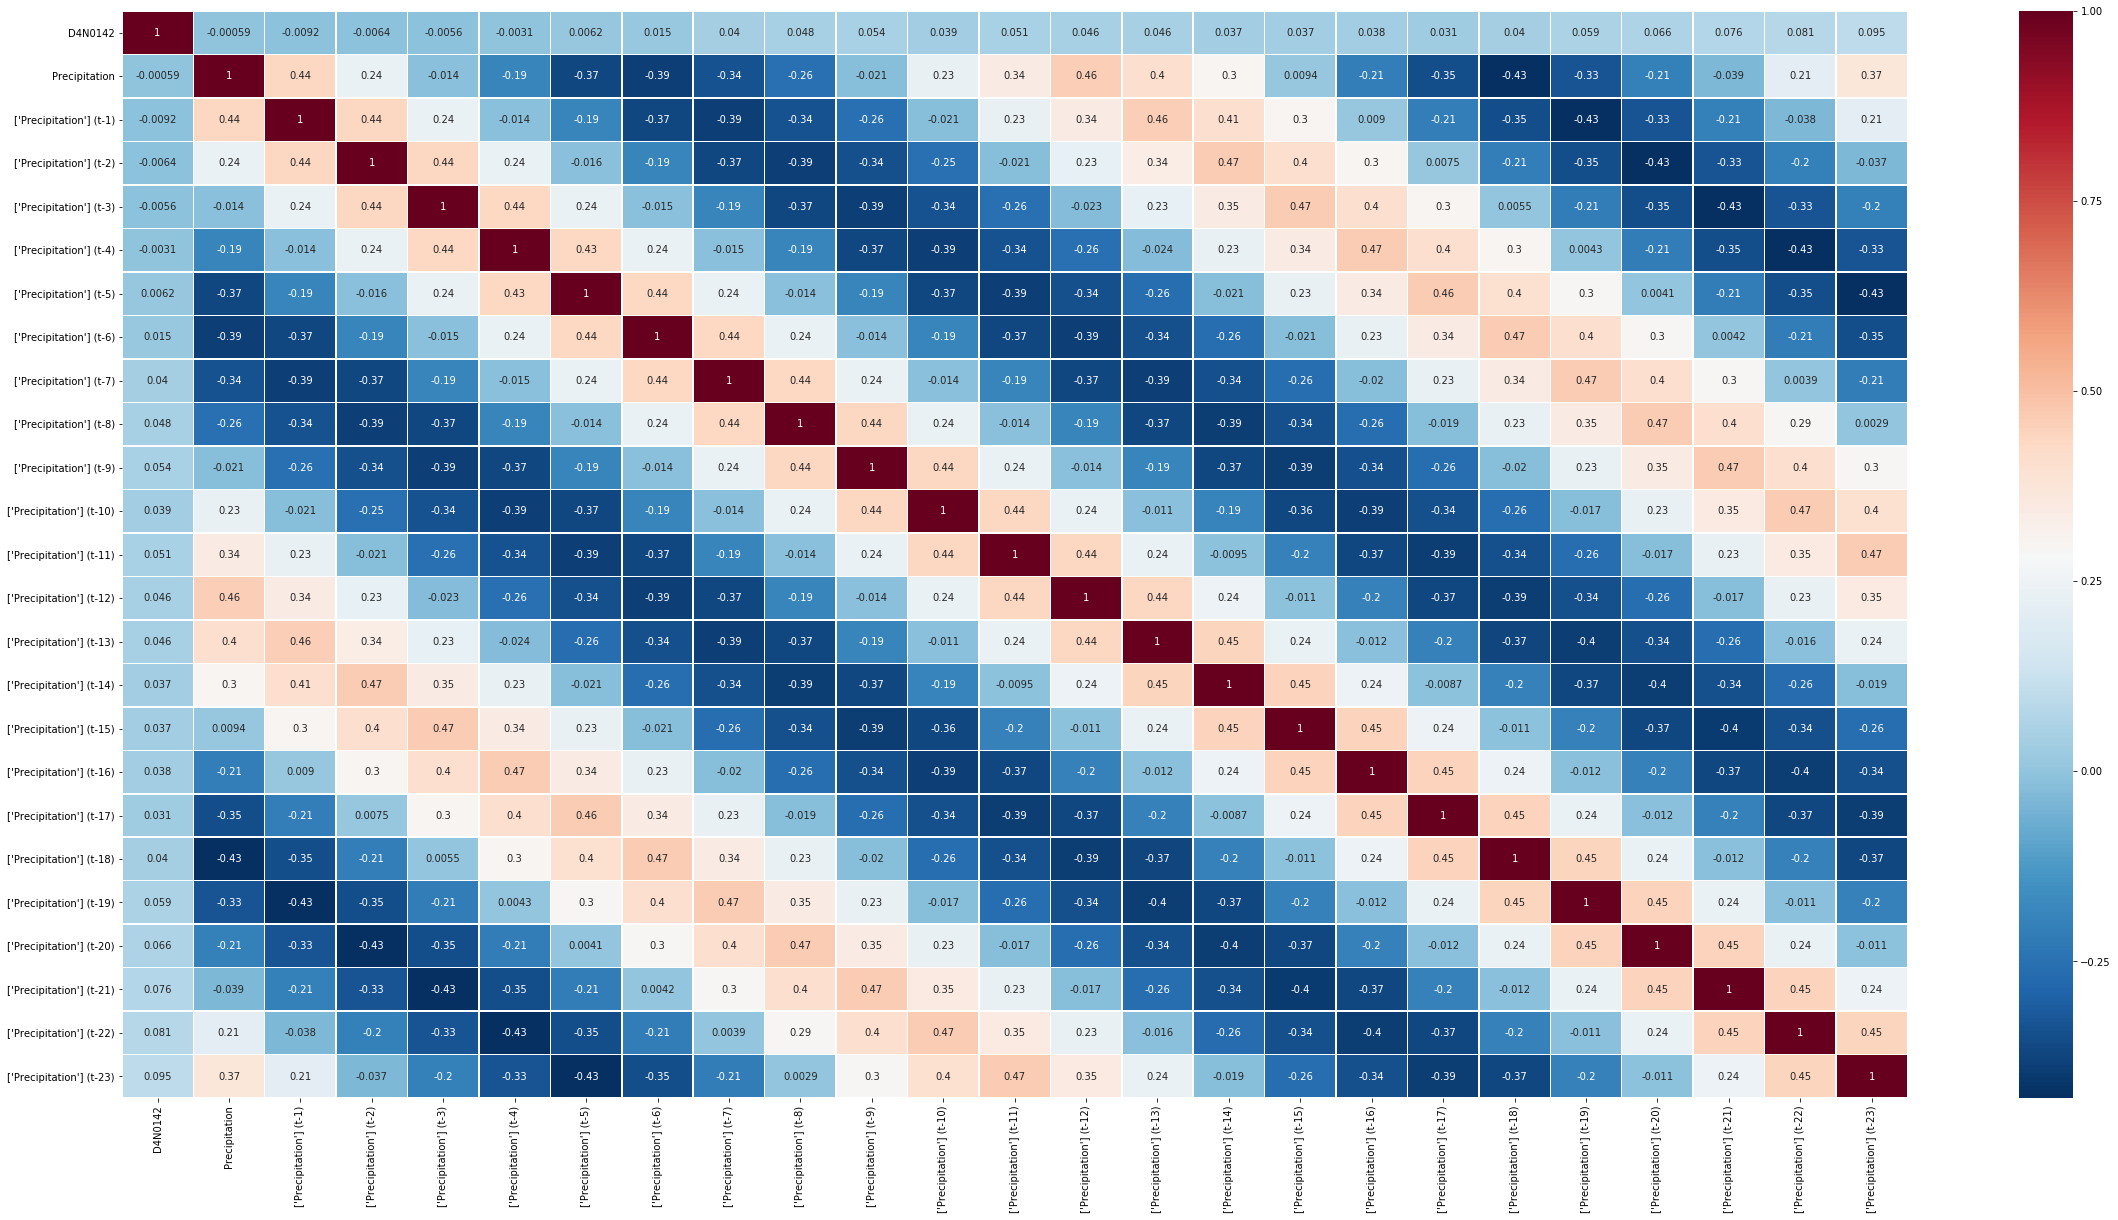

In [22]:
# precip0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = precip.corr(method = 'spearman')
corrm2 = precip.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Temperature

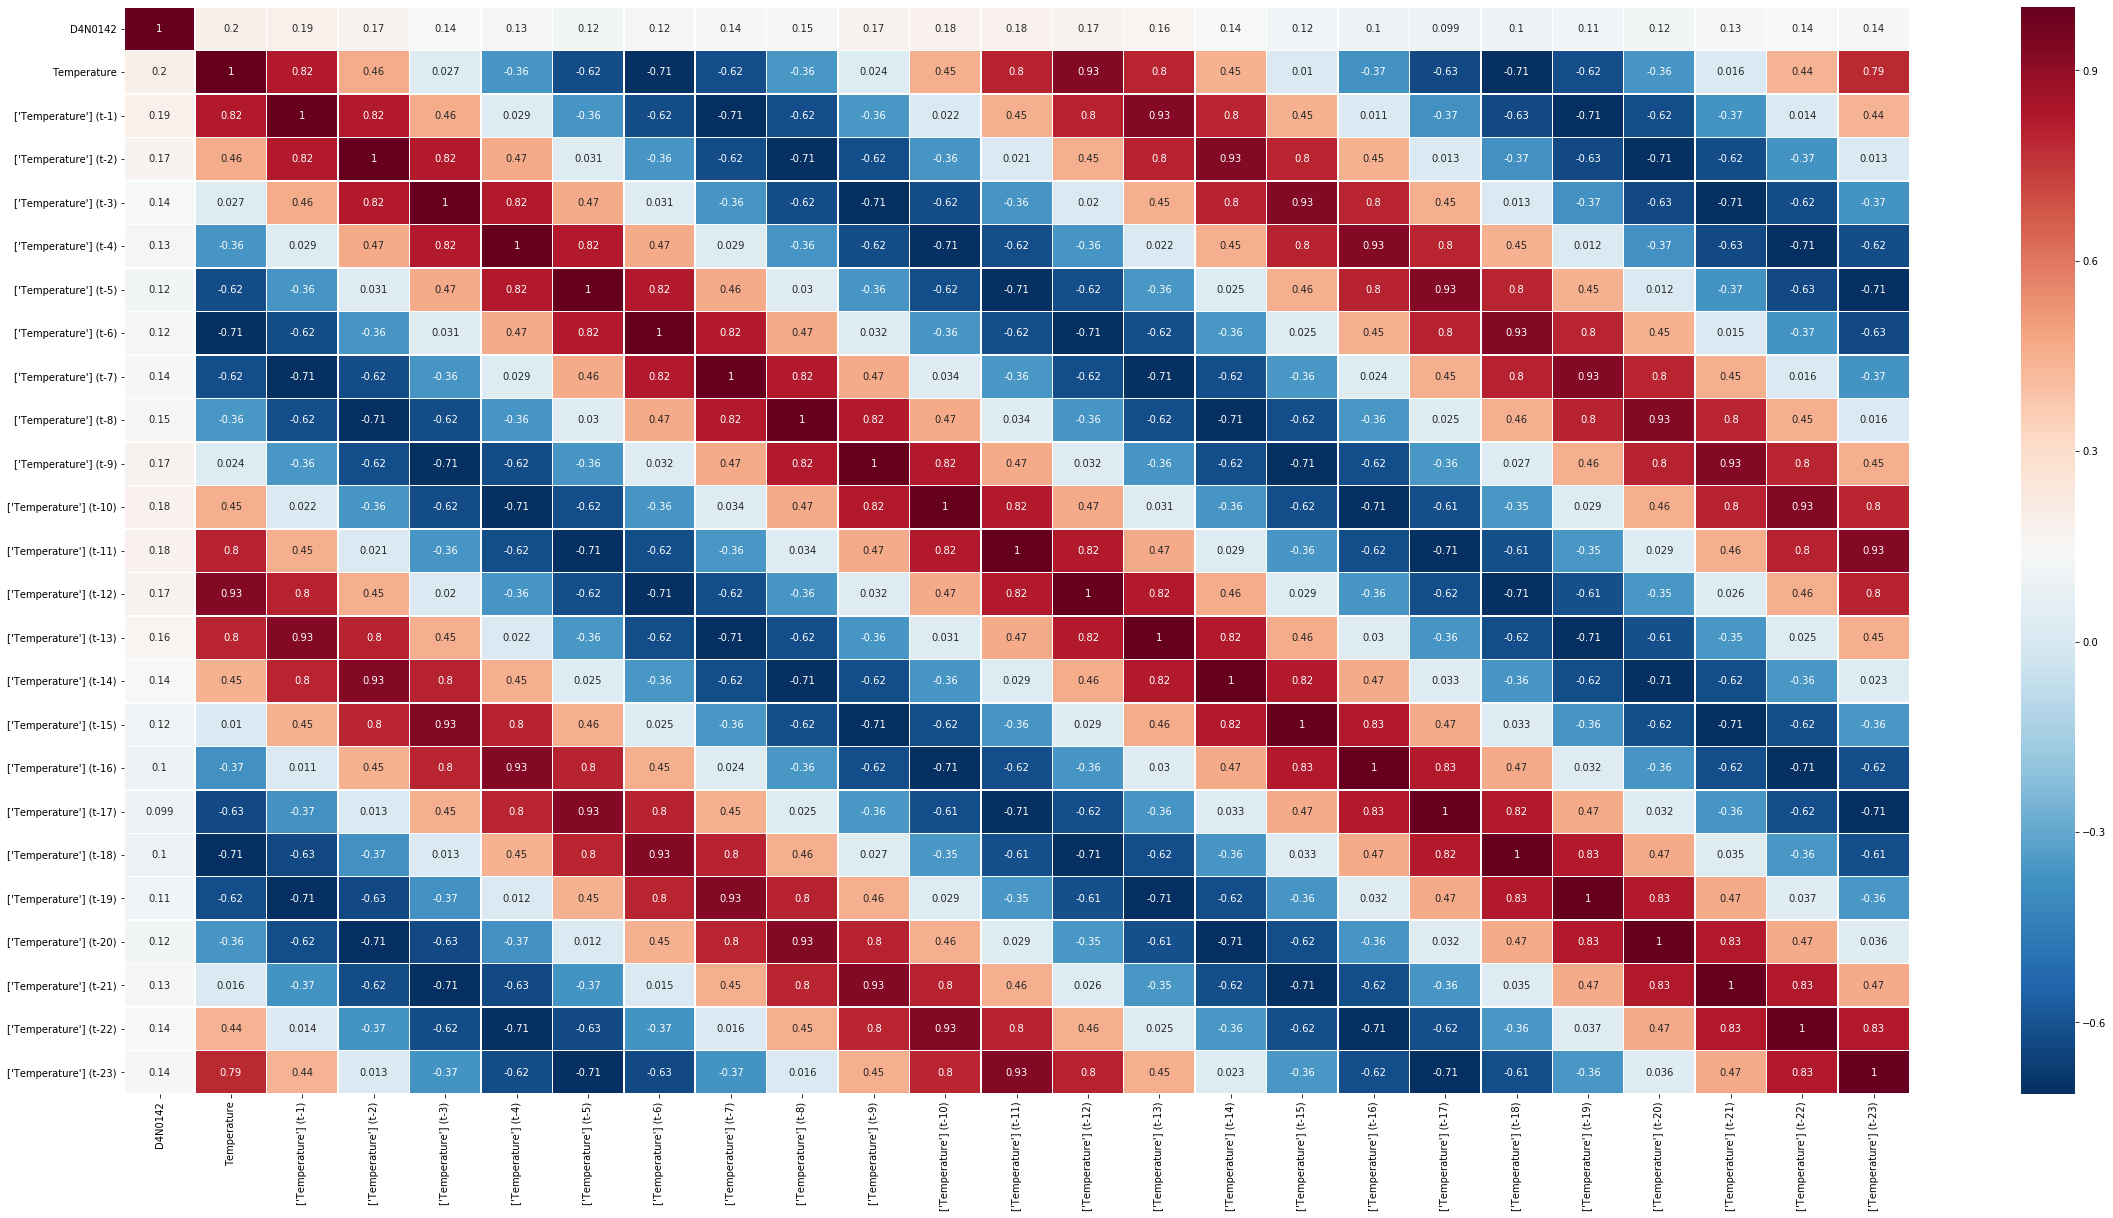

In [23]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = temp.corr(method = 'spearman')
corrm2 = temp.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Shifting variables based on lag variables 

In [24]:
#pima=pima.drop(['Temperature (t-3)'], axis=1)
#pima=pima.drop(['Precipitation (t-5)'], axis=1)
#pima

In [25]:
pima['Temperature (t-3)'] = pima.Temperature.shift(0)
pima['Precipitation (t-5)'] = pima.Precipitation.shift(0)
#pima = pima['Discharge (t-6)'].drop(axis=1)
pima

D4N0142  Temperature  Precipitation  Discharge  scenario_usage  \
year_month                                                                     
1977-01-01 -23.690000    24.400000           65.8   1.041000      436477.250   
1977-02-01 -23.537627    24.400000          122.5   1.092000      436477.250   
1977-03-01 -23.400000    20.700000          124.0   1.190787      436477.250   
1977-04-01 -23.370000    19.600000           28.7   1.300157      436477.250   
1977-05-01 -23.320000    16.231148            0.0   1.406000      436477.250   
...               ...          ...            ...        ...             ...   
2016-07-01 -24.354004    10.400000           11.0   0.269000     1291604.875   
2016-08-01 -24.356039    13.900000           11.2   0.280000     1291604.875   
2016-09-01 -24.358074    18.700000            0.0   0.260000     1291604.875   
2016-10-01 -24.360044    20.950000            6.4   0.252000     1291604.875   
2016-11-01 -24.362079    22.400000           35.4   0.242000     1291604.875   

            Temperature (t-3)  Precipitation (t-5)  
year_month                                          
1977-01-01          24.400000                 65.8  
1977-02-01          24.400000                122.5  
1977-03-01          20.700000                124.0  
1977-04-01          19.600000                 28.7  
1977-05-01          16.231148                  0.0  
...                       ...                  ...  
2016-07-01          10.400000                 11.0  
2016-08-01          13.900000                 11.2  
2016-09-01          18.700000                  0.0  
2016-10-01          20.950000                  6.4  
2016-11-01          22.400000                 35.4  

[479 rows x 7 columns]

In [26]:
X = pima[['Temperature (t-3)', 'Precipitation (t-5)', 'Discharge','scenario_usage']] # Features
y = pima[['D4N0142']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0142','D4N0115','D4N0110' 

In [27]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [28]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature (t-3)      0.007431
Precipitation (t-5)    0.039697
Discharge              0.386597
scenario_usage         1.000000
dtype: float64

### Auto and Cross corr plots combined 

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [30]:
rainfall = X['Precipitation (t-5)']
temperature = X['Temperature (t-3)']
discharge = X['Discharge']
usage =  X['scenario_usage']
bhid =  y['D4N0142']

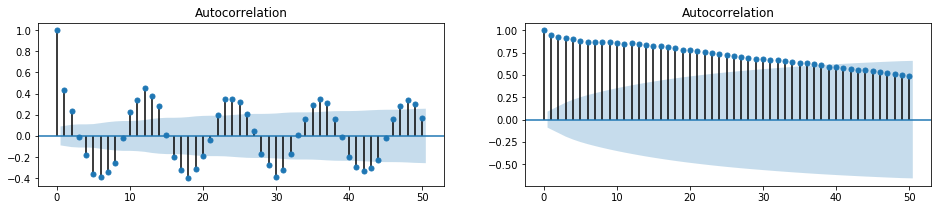

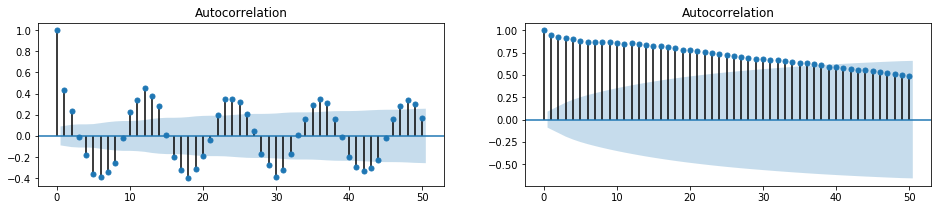

In [31]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(rainfall.tolist(), lags=50, ax=axes[0])
plot_acf(bhid.tolist(), lags=50, ax=axes[1])

Checking if target variable is auto correlated.
Auto-corr (similarity between observations as a function of the lag time)

- plot looks like a sigmoid funtion (hint for seasonality)

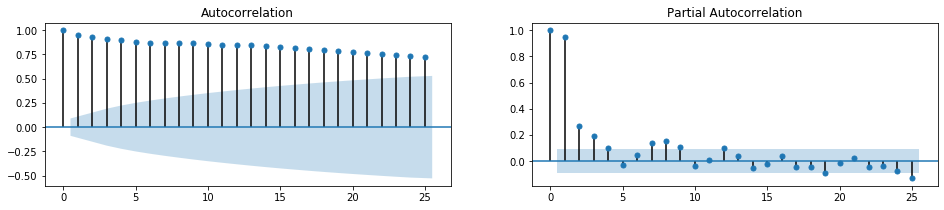

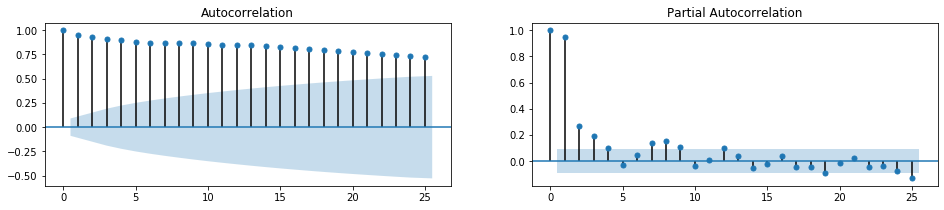

In [32]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

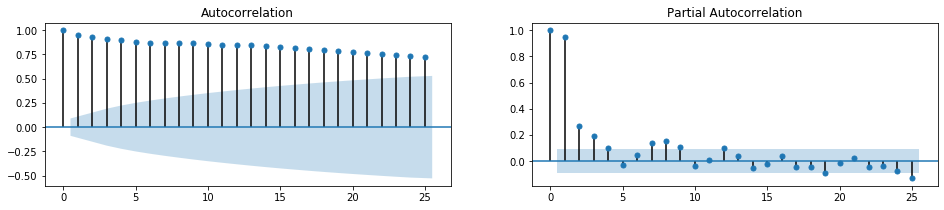

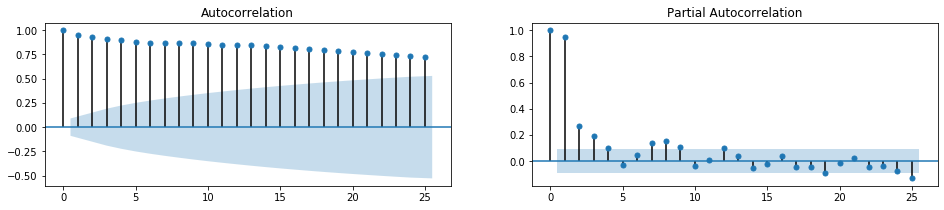

In [33]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

#### To check whether data is stationary we use Augmented Dickey-Fuller (ADF) Test

For time series modeling, data needs to be stationary — if there is a trend in the data we need to get rid of it. 

#### BHID

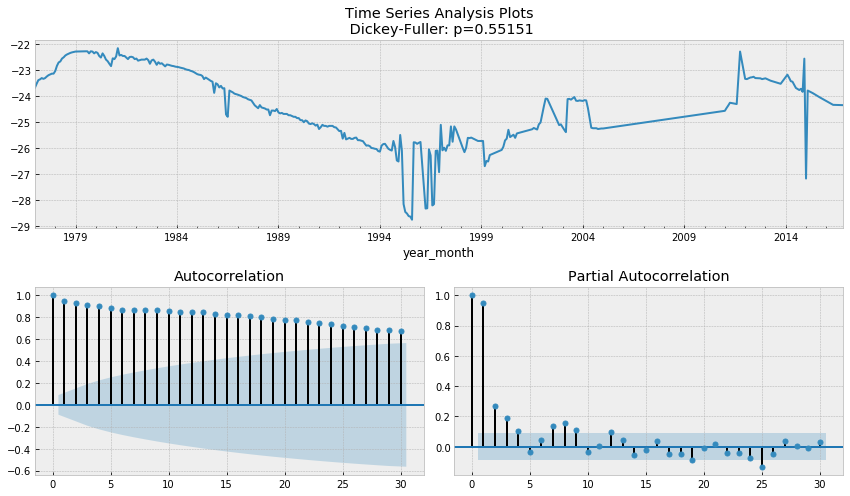

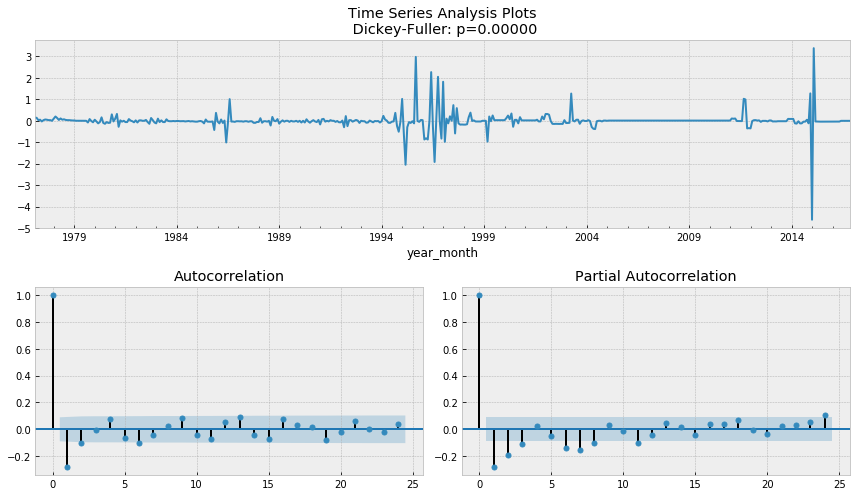

In [34]:
In [2]: import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(bhid, lags=30)

# Take the first difference to remove to make the process stationary
D4N0111_diff = bhid - bhid.shift(1)

tsplot(D4N0111_diff[1:], lags=24)

#### Rainfall

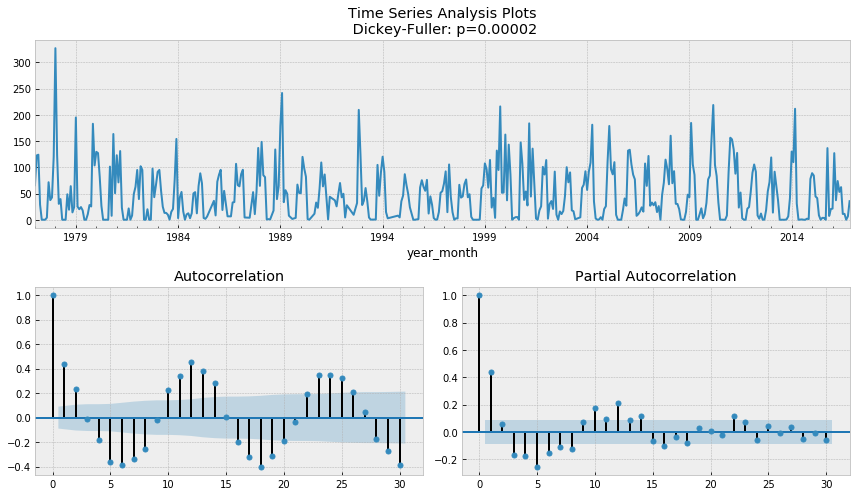

In [35]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(rainfall, lags=30)

#### Temp

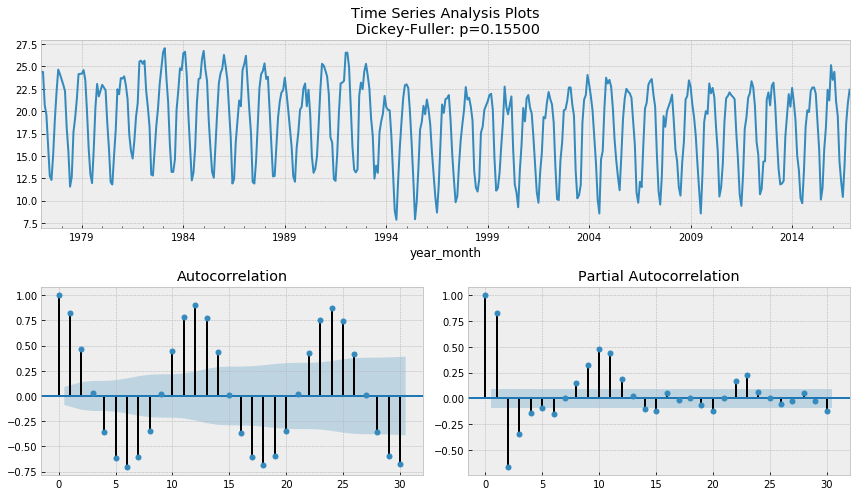

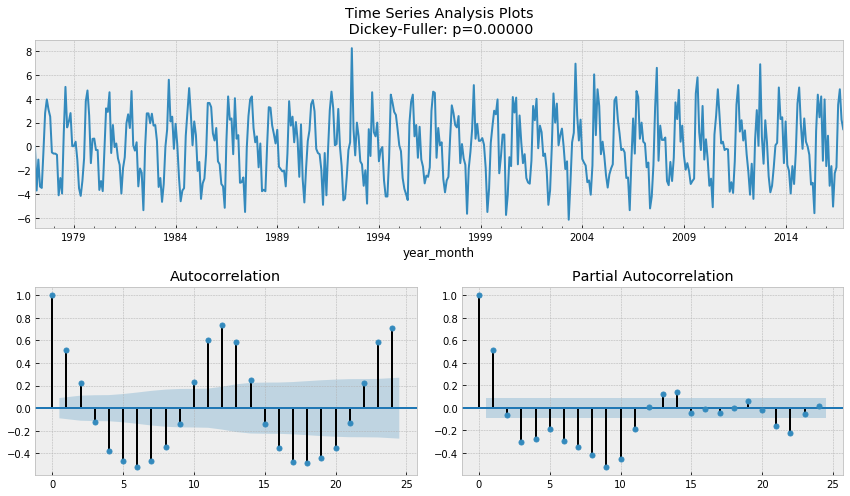

In [36]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(temperature, lags=30)

# Take the first difference to remove to make the process stationary
temp_diff = temperature - temperature.shift(1)

tsplot(temp_diff[1:], lags=24)


#### Discharge

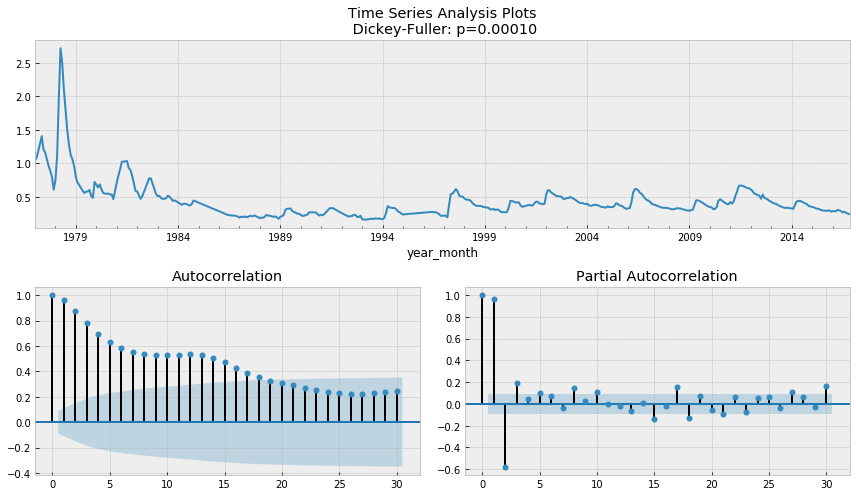

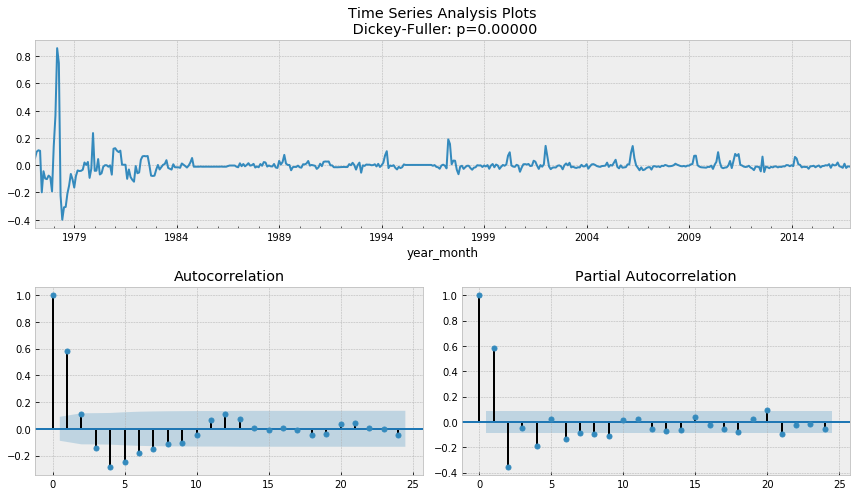

In [37]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(discharge, lags=30)

# Take the first difference to remove to make the process stationary
dis_diff = discharge - discharge.shift(1)

tsplot(dis_diff[1:], lags=24)

#### Usage

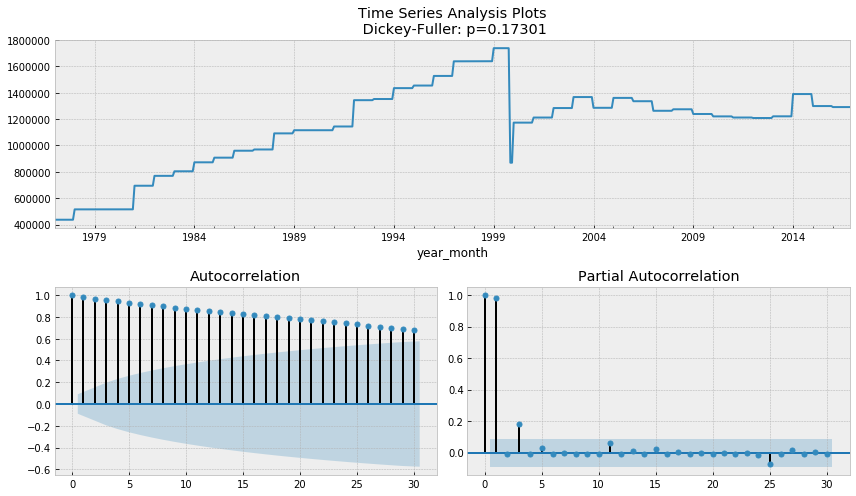

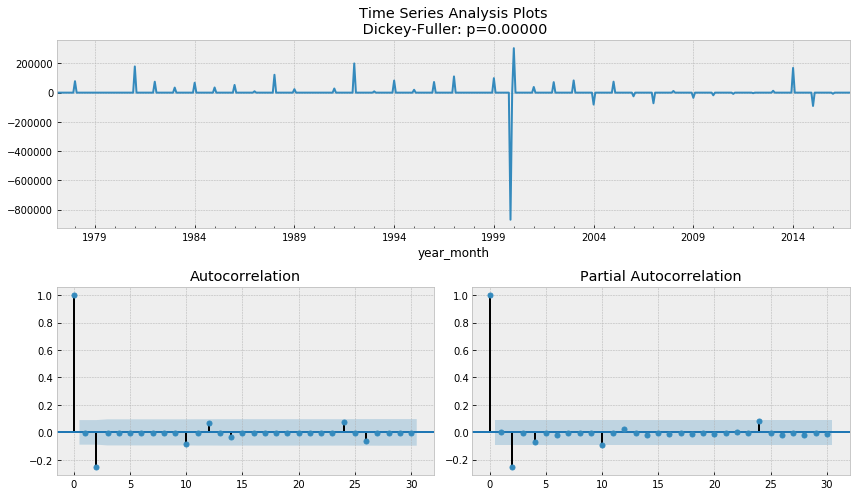

In [38]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(usage, lags=30)

#Take the first difference to remove to make the process stationary
usage_diff = usage - usage.shift(1)


tsplot(usage_diff[1:], lags=30)



### Differenced dataframe (poor model results)

In [39]:
pima_diff = pd.DataFrame({'D4N0111': D4N0111_diff ,'Temperature': temp_diff,  'Rainfall': rainfall,  'Discharge': dis_diff, 'scenario_usage': usage_diff}, columns=['D4N0111','Temperature','Precipitation','Discharge', 'scenario_usage'])
pima_diff.apply(lambda x: sum(x.isnull()), axis=0)

D4N0111             1
Temperature         1
Precipitation     479
Discharge           1
scenario_usage      1
dtype: int64

In [40]:
#X = pima_diff[['Temperature', 'Discharge','scenario_usage']] # Features
#y = pima_diff[['D4N0834']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0142','D4N0115','D4N0110' 

### Visual illustration to help select train and test data

Text(0, 0.5, 'Groundwater levels')

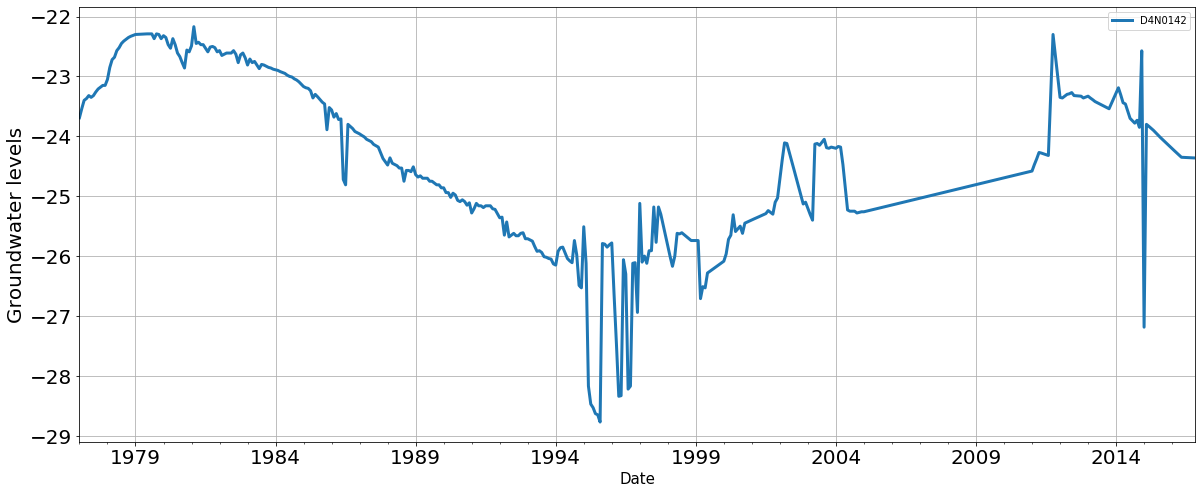

In [41]:
pima[['D4N0142']].plot(figsize=(20,8), linewidth=3, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [42]:
pima = pima[pima.index < '2004-05-01'] 

### Model Parameters

In [43]:
pima['Precipitation_log'] = 1 +np.log1p(pima['Precipitation (t-5)'])
pima['Temperature_log'] = 1 +np.log1p(pima['Temperature (t-3)'])
pima['Discharge_log'] = 1 + np.log1p(pima['Discharge'])
pima['scenario_usage_log'] = 1 + np.log1p(pima['scenario_usage'])

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [44]:
pima

D4N0142  Temperature  Precipitation  Discharge  scenario_usage  \
year_month                                                                     
1977-01-01 -23.690000    24.400000           65.8   1.041000    4.364772e+05   
1977-02-01 -23.537627    24.400000          122.5   1.092000    4.364772e+05   
1977-03-01 -23.400000    20.700000          124.0   1.190787    4.364772e+05   
1977-04-01 -23.370000    19.600000           28.7   1.300157    4.364772e+05   
1977-05-01 -23.320000    16.231148            0.0   1.406000    4.364772e+05   
...               ...          ...            ...        ...             ...   
2003-12-01 -24.189836    24.050000           92.4   0.393000    1.367684e+06   
2004-01-01 -24.200000    23.000000           56.8   0.400000    1.286091e+06   
2004-02-01 -24.170000    21.650000           91.8   0.375000    1.286091e+06   
2004-03-01 -24.180000    20.050000          108.8   0.367000    1.286091e+06   
2004-04-01 -24.470000    17.050000          181.2   0.373000    1.286091e+06   

            Temperature (t-3)  Precipitation (t-5)  Precipitation_log  \
year_month                                                              
1977-01-01          24.400000                 65.8           5.201703   
1977-02-01          24.400000                122.5           5.816241   
1977-03-01          20.700000                124.0           5.828314   
1977-04-01          19.600000                 28.7           4.391147   
1977-05-01          16.231148                  0.0           1.000000   
...                       ...                  ...                ...   
2003-12-01          24.050000                 92.4           5.536891   
2004-01-01          23.000000                 56.8           5.056989   
2004-02-01          21.650000                 91.8           5.530447   
2004-03-01          20.050000                108.8           5.698661   
2004-04-01          17.050000                181.2           6.205105   

            Temperature_log  Discharge_log  scenario_usage_log  
year_month                                                      
1977-01-01         4.234749       1.713440           13.986494  
1977-02-01         4.234749       1.738121           13.986494  
1977-03-01         4.077312       1.784261           13.986494  
1977-04-01         4.025291       1.832978           13.986494  
1977-05-01         3.846719       1.877966           13.986494  
...                     ...            ...                 ...  
2003-12-01         4.220874       1.331460           15.128630  
2004-01-01         4.178054       1.336472           15.067119  
2004-02-01         4.120160       1.318454           15.067119  
2004-03-01         4.046901       1.312619           15.067119  
2004-04-01         3.893146       1.316998           15.067119  

[328 rows x 11 columns]

In [45]:
for obs in range(1,5):
    pima["t_" + str(obs)] = pima.D4N0142.shift(obs)
pima.fillna(0, inplace=True)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [46]:
pima

D4N0142  Temperature  Precipitation  Discharge  scenario_usage  \
year_month                                                                     
1977-01-01 -23.690000    24.400000           65.8   1.041000    4.364772e+05   
1977-02-01 -23.537627    24.400000          122.5   1.092000    4.364772e+05   
1977-03-01 -23.400000    20.700000          124.0   1.190787    4.364772e+05   
1977-04-01 -23.370000    19.600000           28.7   1.300157    4.364772e+05   
1977-05-01 -23.320000    16.231148            0.0   1.406000    4.364772e+05   
...               ...          ...            ...        ...             ...   
2003-12-01 -24.189836    24.050000           92.4   0.393000    1.367684e+06   
2004-01-01 -24.200000    23.000000           56.8   0.400000    1.286091e+06   
2004-02-01 -24.170000    21.650000           91.8   0.375000    1.286091e+06   
2004-03-01 -24.180000    20.050000          108.8   0.367000    1.286091e+06   
2004-04-01 -24.470000    17.050000          181.2   0.373000    1.286091e+06   

            Temperature (t-3)  Precipitation (t-5)  Precipitation_log  \
year_month                                                              
1977-01-01          24.400000                 65.8           5.201703   
1977-02-01          24.400000                122.5           5.816241   
1977-03-01          20.700000                124.0           5.828314   
1977-04-01          19.600000                 28.7           4.391147   
1977-05-01          16.231148                  0.0           1.000000   
...                       ...                  ...                ...   
2003-12-01          24.050000                 92.4           5.536891   
2004-01-01          23.000000                 56.8           5.056989   
2004-02-01          21.650000                 91.8           5.530447   
2004-03-01          20.050000                108.8           5.698661   
2004-04-01          17.050000                181.2           6.205105   

            Temperature_log  Discharge_log  scenario_usage_log        t_1  \
year_month                                                                  
1977-01-01         4.234749       1.713440           13.986494   0.000000   
1977-02-01         4.234749       1.738121           13.986494 -23.690000   
1977-03-01         4.077312       1.784261           13.986494 -23.537627   
1977-04-01         4.025291       1.832978           13.986494 -23.400000   
1977-05-01         3.846719       1.877966           13.986494 -23.370000   
...                     ...            ...                 ...        ...   
2003-12-01         4.220874       1.331460           15.128630 -24.180000   
2004-01-01         4.178054       1.336472           15.067119 -24.189836   
2004-02-01         4.120160       1.318454           15.067119 -24.200000   
2004-03-01         4.046901       1.312619           15.067119 -24.170000   
2004-04-01         3.893146       1.316998           15.067119 -24.180000   

                  t_2        t_3        t_4  
year_month                                   
1977-01-01   0.000000   0.000000   0.000000  
1977-02-01   0.000000   0.000000   0.000000  
1977-03-01 -23.690000   0.000000   0.000000  
1977-04-01 -23.537627 -23.690000   0.000000  
1977-05-01 -23.400000 -23.537627 -23.690000  
...               ...        ...        ...  
2003-12-01 -24.200000 -24.190000 -24.050000  
2004-01-01 -24.180000 -24.200000 -24.190000  
2004-02-01 -24.189836 -24.180000 -24.200000  
2004-03-01 -24.200000 -24.189836 -24.180000  
2004-04-01 -24.170000 -24.200000 -24.189836  

[328 rows x 15 columns]

In [47]:
pima.shape

(328, 15)

In [48]:
pima1  = pima[['Discharge_log', 'Temperature_log', 'Precipitation_log', 'scenario_usage_log', 't_1', 't_2','D4N0142']]
scaler = StandardScaler()
pima1  = pd.DataFrame(scaler.fit_transform(pima1), columns=pima1.columns, index=pima1.index)

### All variables

In [49]:
X = pima1[['Temperature_log','Precipitation_log' ,'Discharge_log','scenario_usage_log' ,'t_1', 't_2']]
y = pima1['D4N0142']

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

Temperature_log       0.035269
Precipitation_log     0.063900
Discharge_log         0.401629
scenario_usage_log    0.797884
t_1                   1.000000
t_2                   0.868035
dtype: float64

In [50]:
X = pima1[['Discharge_log' ,'Precipitation_log' ,'Discharge_log','scenario_usage_log','t_1', 't_2']].values
y = pima1['D4N0142'].values
y = y.reshape(-1,1)

In [51]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(274, 6) (274, 1)
(54, 6) (54, 1)


In [52]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

In [53]:
y_test[0]

array([-1.09980612])

### LSTM

In [54]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorf

In [55]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(54, 6)

    #running function
    gwl = -1.09980612
    test_forecast = X_test
    steps_ahead = 54
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(274, 6)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 274 samples, validate on 54 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1000
 96/274 [=========>....................] - ETA: 5s - loss: 1.1885 - mean_squared_error: 1.1885
Epoch 00001: val_loss improved from inf to 0.24997, saving model to model.h5
274/274 [==============================] - 4s 13ms/sample - loss: 1.1284 - mean_squared_error: 1.1284 - val_loss: 0.2500 - val_mean_squared_error: 0.2500
Epoch 2/1000
 96/274 [=========>....................] - ETA: 0s - loss: 1.0619 - mean_squared_error: 1.0619
Epoch 00002: val_loss improved from 0.24997 to 0.23871, saving model to model.h5
274/274 [==============================] - 0s 588us/sample - loss: 1.0189 - mean_squared_error: 1.0189 - val_loss: 0.2387 - val_mean_squared_error: 0.2387
Epoch 3/1000
 96/274 [=========>....

274/274 [==============================] - 0s 223us/sample - loss: 0.3030 - mean_squared_error: 0.3030 - val_loss: 0.1073 - val_mean_squared_error: 0.1073
Epoch 23/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2563 - mean_squared_error: 0.2563
Epoch 00023: val_loss improved from 0.10733 to 0.10297, saving model to model.h5
274/274 [==============================] - 0s 259us/sample - loss: 0.2854 - mean_squared_error: 0.2854 - val_loss: 0.1030 - val_mean_squared_error: 0.1030
Epoch 24/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2488 - mean_squared_error: 0.2488
Epoch 00024: val_loss improved from 0.10297 to 0.09859, saving model to model.h5
274/274 [==============================] - 0s 239us/sample - loss: 0.2726 - mean_squared_error: 0.2726 - val_loss: 0.0986 - val_mean_squared_error: 0.0986
Epoch 25/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2628 - mean_squared_error: 0.2628
Epoch 00025: val_loss improved from 0.09859 to

 96/274 [=========>....................] - ETA: 0s - loss: 0.0685 - mean_squared_error: 0.0685
Epoch 00046: val_loss did not improve from 0.05628
274/274 [==============================] - 0s 149us/sample - loss: 0.0901 - mean_squared_error: 0.0901 - val_loss: 0.0566 - val_mean_squared_error: 0.0566
Epoch 47/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0949 - mean_squared_error: 0.0949
Epoch 00047: val_loss improved from 0.05628 to 0.05486, saving model to model.h5
274/274 [==============================] - 0s 225us/sample - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.0549 - val_mean_squared_error: 0.0549
Epoch 48/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0815 - mean_squared_error: 0.0815
Epoch 00048: val_loss did not improve from 0.05486
274/274 [==============================] - 0s 137us/sample - loss: 0.0914 - mean_squared_error: 0.0914 - val_loss: 0.0556 - val_mean_squared_error: 0.0556
Epoch 49/1000
 96/274 [=========>......

Epoch 71/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0504 - mean_squared_error: 0.0504
Epoch 00071: val_loss did not improve from 0.04472
274/274 [==============================] - 0s 140us/sample - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 72/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0821 - mean_squared_error: 0.0821
Epoch 00072: val_loss improved from 0.04472 to 0.04450, saving model to model.h5
274/274 [==============================] - 0s 170us/sample - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 73/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0733 - mean_squared_error: 0.0733
Epoch 00073: val_loss improved from 0.04450 to 0.04407, saving model to model.h5
274/274 [==============================] - 0s 173us/sample - loss: 0.0816 - mean_squared_error: 0.0816 - val_loss: 0.0441 - val_mean_squared_error: 0.

Epoch 96/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0938 - mean_squared_error: 0.0938
Epoch 00096: val_loss did not improve from 0.03682
274/274 [==============================] - 0s 126us/sample - loss: 0.0725 - mean_squared_error: 0.0725 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 97/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0477 - mean_squared_error: 0.0477
Epoch 00097: val_loss did not improve from 0.03682
274/274 [==============================] - 0s 127us/sample - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 98/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 00098: val_loss did not improve from 0.03682
274/274 [==============================] - 0s 139us/sample - loss: 0.0775 - mean_squared_error: 0.0775 - val_loss: 0.0375 - val_mean_squared_error: 0.0375
Epoch 99/1000
 96/274 [=========>....................] 

 96/274 [=========>....................] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00121: val_loss improved from 0.03184 to 0.03181, saving model to model.h5
274/274 [==============================] - 0s 208us/sample - loss: 0.0702 - mean_squared_error: 0.0702 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 122/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0419 - mean_squared_error: 0.0419
Epoch 00122: val_loss improved from 0.03181 to 0.03167, saving model to model.h5
274/274 [==============================] - 0s 187us/sample - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.0317 - val_mean_squared_error: 0.0317
Epoch 123/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 00123: val_loss did not improve from 0.03167
274/274 [==============================] - 0s 114us/sample - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 1

Epoch 146/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0926 - mean_squared_error: 0.0926
Epoch 00146: val_loss improved from 0.02822 to 0.02779, saving model to model.h5
274/274 [==============================] - 0s 195us/sample - loss: 0.0727 - mean_squared_error: 0.0727 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 147/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0651 - mean_squared_error: 0.0651
Epoch 00147: val_loss did not improve from 0.02779
274/274 [==============================] - 0s 145us/sample - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 148/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0800 - mean_squared_error: 0.0800
Epoch 00148: val_loss did not improve from 0.02779
274/274 [==============================] - 0s 143us/sample - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 149/1000
 96/274

 96/274 [=========>....................] - ETA: 0s - loss: 0.0550 - mean_squared_error: 0.0550
Epoch 00171: val_loss did not improve from 0.02616
274/274 [==============================] - 0s 142us/sample - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 172/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0493 - mean_squared_error: 0.0493
Epoch 00172: val_loss improved from 0.02616 to 0.02590, saving model to model.h5
274/274 [==============================] - 0s 207us/sample - loss: 0.0620 - mean_squared_error: 0.0620 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 173/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 00173: val_loss improved from 0.02590 to 0.02578, saving model to model.h5
274/274 [==============================] - 0s 196us/sample - loss: 0.0643 - mean_squared_error: 0.0643 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 1

Epoch 197/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00197: val_loss did not improve from 0.02522
274/274 [==============================] - 0s 194us/sample - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 198/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 00198: val_loss did not improve from 0.02522
274/274 [==============================] - 0s 235us/sample - loss: 0.0685 - mean_squared_error: 0.0685 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 199/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0991 - mean_squared_error: 0.0991
Epoch 00199: val_loss did not improve from 0.02522
274/274 [==============================] - 0s 195us/sample - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 200/1000
 96/274 [=========>..................

Epoch 223/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1057 - mean_squared_error: 0.1057
Epoch 00223: val_loss did not improve from 0.02482
274/274 [==============================] - 0s 122us/sample - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 224/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 00224: val_loss improved from 0.02482 to 0.02473, saving model to model.h5
274/274 [==============================] - 0s 239us/sample - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 225/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1087 - mean_squared_error: 0.1087
Epoch 00225: val_loss improved from 0.02473 to 0.02463, saving model to model.h5
274/274 [==============================] - 0s 289us/sample - loss: 0.0620 - mean_squared_error: 0.0620 - val_loss: 0.0246 - val_mean_squared_error:

Epoch 249/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0800 - mean_squared_error: 0.0800
Epoch 00249: val_loss did not improve from 0.02440
274/274 [==============================] - 0s 149us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 250/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0721 - mean_squared_error: 0.0721
Epoch 00250: val_loss did not improve from 0.02440
274/274 [==============================] - 0s 120us/sample - loss: 0.0611 - mean_squared_error: 0.0611 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 251/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 00251: val_loss did not improve from 0.02440
274/274 [==============================] - 0s 147us/sample - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 252/1000
 96/274 [=========>..................

Epoch 275/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0462 - mean_squared_error: 0.0462
Epoch 00275: val_loss did not improve from 0.02417
274/274 [==============================] - 0s 128us/sample - loss: 0.0637 - mean_squared_error: 0.0637 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 276/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0697 - mean_squared_error: 0.0697
Epoch 00276: val_loss did not improve from 0.02417
274/274 [==============================] - 0s 134us/sample - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 277/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00277: val_loss did not improve from 0.02417
274/274 [==============================] - 0s 136us/sample - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 278/1000
 96/274 [=========>..................

Epoch 301/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00301: val_loss did not improve from 0.02416
274/274 [==============================] - 0s 216us/sample - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 302/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00302: val_loss did not improve from 0.02416
274/274 [==============================] - 0s 140us/sample - loss: 0.0605 - mean_squared_error: 0.0605 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 303/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 00303: val_loss did not improve from 0.02416
274/274 [==============================] - 0s 129us/sample - loss: 0.0596 - mean_squared_error: 0.0596 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 304/1000
 96/274 [=========>..................

Epoch 327/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0940 - mean_squared_error: 0.0940
Epoch 00327: val_loss did not improve from 0.02416
274/274 [==============================] - 0s 148us/sample - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 328/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0822 - mean_squared_error: 0.0822
Epoch 00328: val_loss did not improve from 0.02416
274/274 [==============================] - 0s 128us/sample - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 329/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0455 - mean_squared_error: 0.0455
Epoch 00329: val_loss did not improve from 0.02416
274/274 [==============================] - 0s 144us/sample - loss: 0.0616 - mean_squared_error: 0.0616 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 330/1000
 96/274 [=========>..................

Epoch 353/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 00353: val_loss did not improve from 0.02416
274/274 [==============================] - 0s 142us/sample - loss: 0.0624 - mean_squared_error: 0.0624 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 354/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00354: val_loss did not improve from 0.02416
274/274 [==============================] - 0s 131us/sample - loss: 0.0582 - mean_squared_error: 0.0582 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 355/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 00355: val_loss did not improve from 0.02416
274/274 [==============================] - 0s 141us/sample - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 356/1000
 96/274 [=========>..................

Epoch 379/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0916 - mean_squared_error: 0.0916
Epoch 00379: val_loss did not improve from 0.02416
274/274 [==============================] - 0s 136us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 380/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0846 - mean_squared_error: 0.0846
Epoch 00380: val_loss did not improve from 0.02416
274/274 [==============================] - 0s 121us/sample - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 381/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 00381: val_loss did not improve from 0.02416
274/274 [==============================] - 0s 139us/sample - loss: 0.0566 - mean_squared_error: 0.0566 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 382/1000
 96/274 [=========>..................

Epoch 21/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.3131 - mean_squared_error: 0.3131
Epoch 00021: val_loss improved from 0.11076 to 0.10617, saving model to model.h5
274/274 [==============================] - 0s 214us/sample - loss: 0.2611 - mean_squared_error: 0.2611 - val_loss: 0.1062 - val_mean_squared_error: 0.1062
Epoch 22/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2036 - mean_squared_error: 0.2036
Epoch 00022: val_loss improved from 0.10617 to 0.10191, saving model to model.h5
274/274 [==============================] - 0s 239us/sample - loss: 0.2558 - mean_squared_error: 0.2558 - val_loss: 0.1019 - val_mean_squared_error: 0.1019
Epoch 23/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.3113 - mean_squared_error: 0.3113
Epoch 00023: val_loss improved from 0.10191 to 0.09870, saving model to model.h5
274/274 [==============================] - 0s 210us/sample - loss: 0.2328 - mean_squared_error: 0.2328 - val_loss: 0.098

Epoch 45/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0825 - mean_squared_error: 0.0825
Epoch 00045: val_loss improved from 0.05825 to 0.05770, saving model to model.h5
274/274 [==============================] - 0s 191us/sample - loss: 0.0850 - mean_squared_error: 0.0850 - val_loss: 0.0577 - val_mean_squared_error: 0.0577
Epoch 46/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 00046: val_loss did not improve from 0.05770
274/274 [==============================] - 0s 126us/sample - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.0585 - val_mean_squared_error: 0.0585
Epoch 47/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0478 - mean_squared_error: 0.0478
Epoch 00047: val_loss improved from 0.05770 to 0.05716, saving model to model.h5
274/274 [==============================] - 0s 203us/sample - loss: 0.0837 - mean_squared_error: 0.0837 - val_loss: 0.0572 - val_mean_squared_error: 0.

Epoch 70/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0536 - mean_squared_error: 0.0536
Epoch 00070: val_loss improved from 0.04779 to 0.04694, saving model to model.h5
274/274 [==============================] - 0s 214us/sample - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 71/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0675 - mean_squared_error: 0.0675
Epoch 00071: val_loss did not improve from 0.04694
274/274 [==============================] - 0s 133us/sample - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 72/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 00072: val_loss improved from 0.04694 to 0.04616, saving model to model.h5
274/274 [==============================] - 0s 229us/sample - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0462 - val_mean_squared_error: 0.

Epoch 95/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0430 - mean_squared_error: 0.0430
Epoch 00095: val_loss did not improve from 0.03908
274/274 [==============================] - 0s 141us/sample - loss: 0.0771 - mean_squared_error: 0.0771 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 96/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0889 - mean_squared_error: 0.0889
Epoch 00096: val_loss did not improve from 0.03908
274/274 [==============================] - 0s 163us/sample - loss: 0.0756 - mean_squared_error: 0.0756 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 97/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0869 - mean_squared_error: 0.0869
Epoch 00097: val_loss did not improve from 0.03908
274/274 [==============================] - 0s 127us/sample - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 98/1000
 96/274 [=========>....................] 

 96/274 [=========>....................] - ETA: 0s - loss: 0.0355 - mean_squared_error: 0.0355
Epoch 00120: val_loss improved from 0.03461 to 0.03345, saving model to model.h5
274/274 [==============================] - 0s 184us/sample - loss: 0.0689 - mean_squared_error: 0.0689 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 121/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0654 - mean_squared_error: 0.0654
Epoch 00121: val_loss improved from 0.03345 to 0.03324, saving model to model.h5
274/274 [==============================] - 0s 249us/sample - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.0332 - val_mean_squared_error: 0.0332
Epoch 122/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0820 - mean_squared_error: 0.0820
Epoch 00122: val_loss did not improve from 0.03324
274/274 [==============================] - 0s 153us/sample - loss: 0.0716 - mean_squared_error: 0.0716 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 1

 96/274 [=========>....................] - ETA: 0s - loss: 0.0620 - mean_squared_error: 0.0620
Epoch 00145: val_loss did not improve from 0.03043
274/274 [==============================] - 0s 137us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 146/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0551 - mean_squared_error: 0.0551
Epoch 00146: val_loss did not improve from 0.03043
274/274 [==============================] - 0s 127us/sample - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 147/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0832 - mean_squared_error: 0.0832
Epoch 00147: val_loss improved from 0.03043 to 0.03007, saving model to model.h5
274/274 [==============================] - 0s 202us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 148/1000
 96/274 [=========>...

274/274 [==============================] - 0s 190us/sample - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 171/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0534 - mean_squared_error: 0.0534
Epoch 00171: val_loss did not improve from 0.02741
274/274 [==============================] - 0s 127us/sample - loss: 0.0643 - mean_squared_error: 0.0643 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 172/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0478 - mean_squared_error: 0.0478
Epoch 00172: val_loss did not improve from 0.02741
274/274 [==============================] - 0s 145us/sample - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 173/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 00173: val_loss did not improve from 0.02741
274/274 [==============================] - 0s 139us/

Epoch 196/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0427 - mean_squared_error: 0.0427
Epoch 00196: val_loss improved from 0.02605 to 0.02602, saving model to model.h5
274/274 [==============================] - 0s 234us/sample - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 197/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0947 - mean_squared_error: 0.0947
Epoch 00197: val_loss did not improve from 0.02602
274/274 [==============================] - 0s 128us/sample - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 198/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0492 - mean_squared_error: 0.0492
Epoch 00198: val_loss improved from 0.02602 to 0.02602, saving model to model.h5
274/274 [==============================] - 0s 185us/sample - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.0260 - val_mean_squared_error:

Epoch 222/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 00222: val_loss did not improve from 0.02552
274/274 [==============================] - 0s 134us/sample - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 223/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0701 - mean_squared_error: 0.0701
Epoch 00223: val_loss did not improve from 0.02552
274/274 [==============================] - 0s 164us/sample - loss: 0.0626 - mean_squared_error: 0.0626 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 224/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0719 - mean_squared_error: 0.0719
Epoch 00224: val_loss did not improve from 0.02552
274/274 [==============================] - 0s 147us/sample - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 225/1000
 96/274 [=========>..................

Epoch 248/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00248: val_loss did not improve from 0.02469
274/274 [==============================] - 0s 123us/sample - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 249/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0600 - mean_squared_error: 0.0600
Epoch 00249: val_loss improved from 0.02469 to 0.02462, saving model to model.h5
274/274 [==============================] - 0s 187us/sample - loss: 0.0593 - mean_squared_error: 0.0593 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 250/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0864 - mean_squared_error: 0.0864
Epoch 00250: val_loss did not improve from 0.02462
274/274 [==============================] - 0s 130us/sample - loss: 0.0620 - mean_squared_error: 0.0620 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 251/1000
 96/274

Epoch 274/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0784 - mean_squared_error: 0.0784
Epoch 00274: val_loss improved from 0.02461 to 0.02447, saving model to model.h5
274/274 [==============================] - 0s 212us/sample - loss: 0.0610 - mean_squared_error: 0.0610 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 275/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 00275: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 125us/sample - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 276/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 00276: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 142us/sample - loss: 0.0643 - mean_squared_error: 0.0643 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 277/1000
 96/274

Epoch 300/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0405 - mean_squared_error: 0.0405
Epoch 00300: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 194us/sample - loss: 0.0616 - mean_squared_error: 0.0616 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 301/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 00301: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 160us/sample - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 302/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 00302: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 142us/sample - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 303/1000
 96/274 [=========>..................

Epoch 326/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0508 - mean_squared_error: 0.0508
Epoch 00326: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 163us/sample - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 327/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0545 - mean_squared_error: 0.0545
Epoch 00327: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 132us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 328/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0494 - mean_squared_error: 0.0494
Epoch 00328: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 130us/sample - loss: 0.0616 - mean_squared_error: 0.0616 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 329/1000
 96/274 [=========>..................

Epoch 352/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0574 - mean_squared_error: 0.0574
Epoch 00352: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 154us/sample - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 353/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0554 - mean_squared_error: 0.0554
Epoch 00353: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 194us/sample - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 354/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 00354: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 135us/sample - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 355/1000
 96/274 [=========>..................

Epoch 4/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.7912 - mean_squared_error: 0.7912
Epoch 00004: val_loss improved from 0.21426 to 0.20595, saving model to model.h5
274/274 [==============================] - 0s 213us/sample - loss: 0.8386 - mean_squared_error: 0.8386 - val_loss: 0.2060 - val_mean_squared_error: 0.2060
Epoch 5/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.9273 - mean_squared_error: 0.9273
Epoch 00005: val_loss improved from 0.20595 to 0.19806, saving model to model.h5
274/274 [==============================] - 0s 197us/sample - loss: 0.7839 - mean_squared_error: 0.7839 - val_loss: 0.1981 - val_mean_squared_error: 0.1981
Epoch 6/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.7175 - mean_squared_error: 0.7175
Epoch 00006: val_loss improved from 0.19806 to 0.19009, saving model to model.h5
274/274 [==============================] - 0s 350us/sample - loss: 0.7291 - mean_squared_error: 0.7291 - val_loss: 0.1901 -

Epoch 28/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2090 - mean_squared_error: 0.2090
Epoch 00028: val_loss improved from 0.07482 to 0.07275, saving model to model.h5
274/274 [==============================] - 0s 193us/sample - loss: 0.1666 - mean_squared_error: 0.1666 - val_loss: 0.0727 - val_mean_squared_error: 0.0727
Epoch 29/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1742 - mean_squared_error: 0.1742
Epoch 00029: val_loss improved from 0.07275 to 0.07092, saving model to model.h5
274/274 [==============================] - 0s 206us/sample - loss: 0.1542 - mean_squared_error: 0.1542 - val_loss: 0.0709 - val_mean_squared_error: 0.0709
Epoch 30/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1300 - mean_squared_error: 0.1300
Epoch 00030: val_loss improved from 0.07092 to 0.06857, saving model to model.h5
274/274 [==============================] - 0s 201us/sample - loss: 0.1447 - mean_squared_error: 0.1447 - val_loss: 0.068

Epoch 52/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0923 - mean_squared_error: 0.0923
Epoch 00052: val_loss did not improve from 0.04661
274/274 [==============================] - 0s 123us/sample - loss: 0.0857 - mean_squared_error: 0.0857 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 53/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0951 - mean_squared_error: 0.0951
Epoch 00053: val_loss improved from 0.04661 to 0.04610, saving model to model.h5
274/274 [==============================] - 0s 216us/sample - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 54/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 00054: val_loss did not improve from 0.04610
274/274 [==============================] - 0s 133us/sample - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 55/1000
 96/274 [==

Epoch 77/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0469 - mean_squared_error: 0.0469
Epoch 00077: val_loss did not improve from 0.03772
274/274 [==============================] - 0s 143us/sample - loss: 0.0808 - mean_squared_error: 0.0808 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 78/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0775 - mean_squared_error: 0.0775
Epoch 00078: val_loss improved from 0.03772 to 0.03621, saving model to model.h5
274/274 [==============================] - 0s 195us/sample - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 79/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0594 - mean_squared_error: 0.0594
Epoch 00079: val_loss did not improve from 0.03621
274/274 [==============================] - 0s 115us/sample - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.0375 - val_mean_squared_error: 0.0375
Epoch 80/1000
 96/274 [==

 96/274 [=========>....................] - ETA: 0s - loss: 0.0488 - mean_squared_error: 0.0488
Epoch 00102: val_loss did not improve from 0.03196
274/274 [==============================] - 0s 359us/sample - loss: 0.0749 - mean_squared_error: 0.0749 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 103/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0601 - mean_squared_error: 0.0601
Epoch 00103: val_loss did not improve from 0.03196
274/274 [==============================] - 0s 163us/sample - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 104/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00104: val_loss did not improve from 0.03196
274/274 [==============================] - 0s 179us/sample - loss: 0.0716 - mean_squared_error: 0.0716 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 105/1000
 96/274 [=========>....................] - ETA: 0s -

 96/274 [=========>....................] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00127: val_loss improved from 0.02825 to 0.02816, saving model to model.h5
274/274 [==============================] - 0s 243us/sample - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 128/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0588 - mean_squared_error: 0.0588
Epoch 00128: val_loss improved from 0.02816 to 0.02745, saving model to model.h5
274/274 [==============================] - 0s 185us/sample - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 129/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0581 - mean_squared_error: 0.0581
Epoch 00129: val_loss did not improve from 0.02745
274/274 [==============================] - 0s 108us/sample - loss: 0.0648 - mean_squared_error: 0.0648 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 1

 96/274 [=========>....................] - ETA: 0s - loss: 0.0721 - mean_squared_error: 0.0721
Epoch 00152: val_loss improved from 0.02605 to 0.02578, saving model to model.h5
274/274 [==============================] - 0s 214us/sample - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 153/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0601 - mean_squared_error: 0.0601
Epoch 00153: val_loss improved from 0.02578 to 0.02577, saving model to model.h5
274/274 [==============================] - 0s 200us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 154/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0819 - mean_squared_error: 0.0819
Epoch 00154: val_loss did not improve from 0.02577
274/274 [==============================] - 0s 131us/sample - loss: 0.0643 - mean_squared_error: 0.0643 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 1

Epoch 178/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1102 - mean_squared_error: 0.1102
Epoch 00178: val_loss did not improve from 0.02498
274/274 [==============================] - 0s 156us/sample - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 179/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0573 - mean_squared_error: 0.0573
Epoch 00179: val_loss improved from 0.02498 to 0.02487, saving model to model.h5
274/274 [==============================] - 0s 233us/sample - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 180/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0488 - mean_squared_error: 0.0488
Epoch 00180: val_loss improved from 0.02487 to 0.02487, saving model to model.h5
274/274 [==============================] - 0s 212us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0249 - val_mean_squared_error:

 96/274 [=========>....................] - ETA: 0s - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 00203: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 232us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 204/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0674 - mean_squared_error: 0.0674
Epoch 00204: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 218us/sample - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 205/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00205: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 152us/sample - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 206/1000
 96/274 [=========>....................] - ETA: 0s -

Epoch 229/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0477 - mean_squared_error: 0.0477
Epoch 00229: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 132us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 230/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0625 - mean_squared_error: 0.0625
Epoch 00230: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 132us/sample - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 231/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 00231: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 140us/sample - loss: 0.0643 - mean_squared_error: 0.0643 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 232/1000
 96/274 [=========>..................

Epoch 255/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1024 - mean_squared_error: 0.1024
Epoch 00255: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 157us/sample - loss: 0.0620 - mean_squared_error: 0.0620 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 256/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0596 - mean_squared_error: 0.0596
Epoch 00256: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 136us/sample - loss: 0.0607 - mean_squared_error: 0.0607 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 257/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 00257: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 145us/sample - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 258/1000
 96/274 [=========>..................

Epoch 281/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0539 - mean_squared_error: 0.0539
Epoch 00281: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 184us/sample - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 282/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0715 - mean_squared_error: 0.0715
Epoch 00282: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 156us/sample - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 283/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 00283: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 180us/sample - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 284/1000
 96/274 [=========>..................

 96/274 [=========>....................] - ETA: 0s - loss: 0.5300 - mean_squared_error: 0.5300
Epoch 00008: val_loss improved from 0.20962 to 0.20179, saving model to model.h5
274/274 [==============================] - 0s 204us/sample - loss: 0.6115 - mean_squared_error: 0.6115 - val_loss: 0.2018 - val_mean_squared_error: 0.2018
Epoch 9/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.4708 - mean_squared_error: 0.4708
Epoch 00009: val_loss improved from 0.20179 to 0.19468, saving model to model.h5
274/274 [==============================] - 0s 181us/sample - loss: 0.5853 - mean_squared_error: 0.5853 - val_loss: 0.1947 - val_mean_squared_error: 0.1947
Epoch 10/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.5798 - mean_squared_error: 0.5798
Epoch 00010: val_loss improved from 0.19468 to 0.18714, saving model to model.h5
274/274 [==============================] - 0s 179us/sample - loss: 0.5621 - mean_squared_error: 0.5621 - val_loss: 0.1871 - val_mean_sq

Epoch 32/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1456 - mean_squared_error: 0.1456
Epoch 00032: val_loss improved from 0.08843 to 0.08614, saving model to model.h5
274/274 [==============================] - 0s 199us/sample - loss: 0.1560 - mean_squared_error: 0.1560 - val_loss: 0.0861 - val_mean_squared_error: 0.0861
Epoch 33/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1379 - mean_squared_error: 0.1379
Epoch 00033: val_loss improved from 0.08614 to 0.08389, saving model to model.h5
274/274 [==============================] - 0s 183us/sample - loss: 0.1395 - mean_squared_error: 0.1395 - val_loss: 0.0839 - val_mean_squared_error: 0.0839
Epoch 34/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1438 - mean_squared_error: 0.1438
Epoch 00034: val_loss improved from 0.08389 to 0.08218, saving model to model.h5
274/274 [==============================] - 0s 193us/sample - loss: 0.1412 - mean_squared_error: 0.1412 - val_loss: 0.082

Epoch 56/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0637 - mean_squared_error: 0.0637
Epoch 00056: val_loss improved from 0.05708 to 0.05688, saving model to model.h5
274/274 [==============================] - 0s 206us/sample - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.0569 - val_mean_squared_error: 0.0569
Epoch 57/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 00057: val_loss did not improve from 0.05688
274/274 [==============================] - 0s 123us/sample - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.0575 - val_mean_squared_error: 0.0575
Epoch 58/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0615 - mean_squared_error: 0.0615
Epoch 00058: val_loss did not improve from 0.05688
274/274 [==============================] - 0s 125us/sample - loss: 0.0816 - mean_squared_error: 0.0816 - val_loss: 0.0574 - val_mean_squared_error: 0.0574
Epoch 59/1000
 96/274 [==

Epoch 81/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0609 - mean_squared_error: 0.0609
Epoch 00081: val_loss did not improve from 0.04698
274/274 [==============================] - 0s 132us/sample - loss: 0.0747 - mean_squared_error: 0.0747 - val_loss: 0.0499 - val_mean_squared_error: 0.0499
Epoch 82/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0719 - mean_squared_error: 0.0719
Epoch 00082: val_loss improved from 0.04698 to 0.04653, saving model to model.h5
274/274 [==============================] - 0s 525us/sample - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 83/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0878 - mean_squared_error: 0.0878
Epoch 00083: val_loss did not improve from 0.04653
274/274 [==============================] - 0s 152us/sample - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 84/1000
 96/274 [==

Epoch 106/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0765 - mean_squared_error: 0.0765
Epoch 00106: val_loss did not improve from 0.03929
274/274 [==============================] - 0s 146us/sample - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 107/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0727 - mean_squared_error: 0.0727
Epoch 00107: val_loss improved from 0.03929 to 0.03891, saving model to model.h5
274/274 [==============================] - 0s 208us/sample - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.0389 - val_mean_squared_error: 0.0389
Epoch 108/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 00108: val_loss did not improve from 0.03891
274/274 [==============================] - 0s 158us/sample - loss: 0.0816 - mean_squared_error: 0.0816 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 109/1000
 96/274

Epoch 131/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0721 - mean_squared_error: 0.0721
Epoch 00131: val_loss improved from 0.03329 to 0.03265, saving model to model.h5
274/274 [==============================] - 0s 252us/sample - loss: 0.0671 - mean_squared_error: 0.0671 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 132/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 00132: val_loss did not improve from 0.03265
274/274 [==============================] - 0s 125us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 133/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0900 - mean_squared_error: 0.0900
Epoch 00133: val_loss did not improve from 0.03265
274/274 [==============================] - 0s 121us/sample - loss: 0.0685 - mean_squared_error: 0.0685 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 134/1000
 96/274

Epoch 156/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0575 - mean_squared_error: 0.0575
Epoch 00156: val_loss did not improve from 0.02868
274/274 [==============================] - 0s 188us/sample - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 157/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00157: val_loss improved from 0.02868 to 0.02841, saving model to model.h5
274/274 [==============================] - 0s 367us/sample - loss: 0.0648 - mean_squared_error: 0.0648 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 158/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0631 - mean_squared_error: 0.0631
Epoch 00158: val_loss did not improve from 0.02841
274/274 [==============================] - 0s 231us/sample - loss: 0.0669 - mean_squared_error: 0.0669 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 159/1000
 96/274

 96/274 [=========>....................] - ETA: 0s - loss: 0.0471 - mean_squared_error: 0.0471
Epoch 00181: val_loss did not improve from 0.02694
274/274 [==============================] - 0s 146us/sample - loss: 0.0610 - mean_squared_error: 0.0610 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 182/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1030 - mean_squared_error: 0.1030
Epoch 00182: val_loss improved from 0.02694 to 0.02677, saving model to model.h5
274/274 [==============================] - 0s 195us/sample - loss: 0.0626 - mean_squared_error: 0.0626 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 183/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 00183: val_loss did not improve from 0.02677
274/274 [==============================] - 0s 131us/sample - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 184/1000
 96/274 [=========>...

 96/274 [=========>....................] - ETA: 0s - loss: 0.0544 - mean_squared_error: 0.0544
Epoch 00206: val_loss did not improve from 0.02555
274/274 [==============================] - 0s 140us/sample - loss: 0.0595 - mean_squared_error: 0.0595 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 207/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0742 - mean_squared_error: 0.0742
Epoch 00207: val_loss improved from 0.02555 to 0.02554, saving model to model.h5
274/274 [==============================] - 0s 193us/sample - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 208/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0673 - mean_squared_error: 0.0673
Epoch 00208: val_loss did not improve from 0.02554
274/274 [==============================] - 0s 124us/sample - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 209/1000
 96/274 [=========>...

 96/274 [=========>....................] - ETA: 0s - loss: 0.0392 - mean_squared_error: 0.0392
Epoch 00231: val_loss did not improve from 0.02506
274/274 [==============================] - 0s 144us/sample - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 232/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0623 - mean_squared_error: 0.0623
Epoch 00232: val_loss improved from 0.02506 to 0.02502, saving model to model.h5
274/274 [==============================] - 0s 197us/sample - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 233/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0395 - mean_squared_error: 0.0395
Epoch 00233: val_loss did not improve from 0.02502
274/274 [==============================] - 0s 115us/sample - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 234/1000
 96/274 [=========>...

 96/274 [=========>....................] - ETA: 0s - loss: 0.0474 - mean_squared_error: 0.0474
Epoch 00256: val_loss did not improve from 0.02467
274/274 [==============================] - 0s 145us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 257/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0484 - mean_squared_error: 0.0484
Epoch 00257: val_loss did not improve from 0.02467
274/274 [==============================] - 0s 147us/sample - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 258/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0562 - mean_squared_error: 0.0562
Epoch 00258: val_loss did not improve from 0.02467
274/274 [==============================] - 0s 126us/sample - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 259/1000
 96/274 [=========>....................] - ETA: 0s -

Epoch 282/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0522 - mean_squared_error: 0.0522
Epoch 00282: val_loss did not improve from 0.02467
274/274 [==============================] - 0s 151us/sample - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 283/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 00283: val_loss did not improve from 0.02467
274/274 [==============================] - 0s 139us/sample - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 284/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0872 - mean_squared_error: 0.0872
Epoch 00284: val_loss improved from 0.02467 to 0.02459, saving model to model.h5
274/274 [==============================] - 0s 198us/sample - loss: 0.0613 - mean_squared_error: 0.0613 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 285/1000
 96/274

 96/274 [=========>....................] - ETA: 0s - loss: 0.0658 - mean_squared_error: 0.0658
Epoch 00307: val_loss did not improve from 0.02433
274/274 [==============================] - 0s 141us/sample - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 308/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0343 - mean_squared_error: 0.0343
Epoch 00308: val_loss did not improve from 0.02433
274/274 [==============================] - 0s 131us/sample - loss: 0.0605 - mean_squared_error: 0.0605 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 309/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00309: val_loss did not improve from 0.02433
274/274 [==============================] - 0s 136us/sample - loss: 0.0588 - mean_squared_error: 0.0588 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 310/1000
 96/274 [=========>....................] - ETA: 0s -

Epoch 333/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0643 - mean_squared_error: 0.0643
Epoch 00333: val_loss did not improve from 0.02433
274/274 [==============================] - 0s 114us/sample - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 334/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 00334: val_loss did not improve from 0.02433
274/274 [==============================] - 0s 108us/sample - loss: 0.0613 - mean_squared_error: 0.0613 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 335/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0779 - mean_squared_error: 0.0779
Epoch 00335: val_loss did not improve from 0.02433
274/274 [==============================] - 0s 123us/sample - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 336/1000
 96/274 [=========>..................

Epoch 359/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 00359: val_loss did not improve from 0.02433
274/274 [==============================] - 0s 128us/sample - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 360/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0819 - mean_squared_error: 0.0819
Epoch 00360: val_loss did not improve from 0.02433
274/274 [==============================] - 0s 132us/sample - loss: 0.0620 - mean_squared_error: 0.0620 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 361/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0492 - mean_squared_error: 0.0492
Epoch 00361: val_loss did not improve from 0.02433
274/274 [==============================] - 0s 134us/sample - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 362/1000
 96/274 [=========>..................

Epoch 385/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0826 - mean_squared_error: 0.0826
Epoch 00385: val_loss did not improve from 0.02433
274/274 [==============================] - 0s 137us/sample - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 386/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0477 - mean_squared_error: 0.0477
Epoch 00386: val_loss did not improve from 0.02433
274/274 [==============================] - 0s 134us/sample - loss: 0.0575 - mean_squared_error: 0.0575 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 387/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0889 - mean_squared_error: 0.0889
Epoch 00387: val_loss did not improve from 0.02433
274/274 [==============================] - 0s 145us/sample - loss: 0.0624 - mean_squared_error: 0.0624 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 388/1000
 96/274 [=========>..................

 96/274 [=========>....................] - ETA: 0s - loss: 0.5389 - mean_squared_error: 0.5389
Epoch 00008: val_loss improved from 0.19190 to 0.18524, saving model to model.h5
274/274 [==============================] - 0s 211us/sample - loss: 0.6047 - mean_squared_error: 0.6047 - val_loss: 0.1852 - val_mean_squared_error: 0.1852
Epoch 9/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.6623 - mean_squared_error: 0.6623
Epoch 00009: val_loss improved from 0.18524 to 0.17907, saving model to model.h5
274/274 [==============================] - 0s 192us/sample - loss: 0.5719 - mean_squared_error: 0.5719 - val_loss: 0.1791 - val_mean_squared_error: 0.1791
Epoch 10/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.5480 - mean_squared_error: 0.5480
Epoch 00010: val_loss improved from 0.17907 to 0.17262, saving model to model.h5
274/274 [==============================] - 0s 213us/sample - loss: 0.5420 - mean_squared_error: 0.5420 - val_loss: 0.1726 - val_mean_sq

Epoch 32/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1602 - mean_squared_error: 0.1602
Epoch 00032: val_loss improved from 0.08206 to 0.07992, saving model to model.h5
274/274 [==============================] - 0s 272us/sample - loss: 0.1477 - mean_squared_error: 0.1477 - val_loss: 0.0799 - val_mean_squared_error: 0.0799
Epoch 33/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0797 - mean_squared_error: 0.0797
Epoch 00033: val_loss improved from 0.07992 to 0.07784, saving model to model.h5
274/274 [==============================] - 0s 709us/sample - loss: 0.1349 - mean_squared_error: 0.1349 - val_loss: 0.0778 - val_mean_squared_error: 0.0778
Epoch 34/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1216 - mean_squared_error: 0.1216
Epoch 00034: val_loss improved from 0.07784 to 0.07590, saving model to model.h5
274/274 [==============================] - 0s 300us/sample - loss: 0.1295 - mean_squared_error: 0.1295 - val_loss: 0.075

 96/274 [=========>....................] - ETA: 0s - loss: 0.0734 - mean_squared_error: 0.0734
Epoch 00056: val_loss improved from 0.05516 to 0.05471, saving model to model.h5
274/274 [==============================] - 0s 197us/sample - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.0547 - val_mean_squared_error: 0.0547
Epoch 57/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1175 - mean_squared_error: 0.1175
Epoch 00057: val_loss did not improve from 0.05471
274/274 [==============================] - 0s 137us/sample - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.0559 - val_mean_squared_error: 0.0559
Epoch 58/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0811 - mean_squared_error: 0.0811
Epoch 00058: val_loss improved from 0.05471 to 0.05353, saving model to model.h5
274/274 [==============================] - 0s 224us/sample - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.0535 - val_mean_squared_error: 0.0535
Epoch 59/

Epoch 81/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0646 - mean_squared_error: 0.0646
Epoch 00081: val_loss improved from 0.04434 to 0.04394, saving model to model.h5
274/274 [==============================] - 0s 234us/sample - loss: 0.0816 - mean_squared_error: 0.0816 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 82/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0752 - mean_squared_error: 0.0752
Epoch 00082: val_loss did not improve from 0.04394
274/274 [==============================] - 0s 144us/sample - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 83/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0890 - mean_squared_error: 0.0890
Epoch 00083: val_loss did not improve from 0.04394
274/274 [==============================] - 0s 124us/sample - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 84/1000
 96/274 [==

Epoch 106/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 00106: val_loss did not improve from 0.03701
274/274 [==============================] - 0s 215us/sample - loss: 0.0729 - mean_squared_error: 0.0729 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 107/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0825 - mean_squared_error: 0.0825
Epoch 00107: val_loss did not improve from 0.03701
274/274 [==============================] - 0s 137us/sample - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.0387 - val_mean_squared_error: 0.0387
Epoch 108/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0931 - mean_squared_error: 0.0931
Epoch 00108: val_loss did not improve from 0.03701
274/274 [==============================] - 0s 248us/sample - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.0387 - val_mean_squared_error: 0.0387
Epoch 109/1000
 96/274 [=========>..................

 96/274 [=========>....................] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00131: val_loss improved from 0.03287 to 0.03251, saving model to model.h5
274/274 [==============================] - 0s 205us/sample - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 132/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 00132: val_loss did not improve from 0.03251
274/274 [==============================] - 0s 147us/sample - loss: 0.0730 - mean_squared_error: 0.0730 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 133/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0456 - mean_squared_error: 0.0456
Epoch 00133: val_loss did not improve from 0.03251
274/274 [==============================] - 0s 134us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 134/1000
 96/274 [=========>...

 96/274 [=========>....................] - ETA: 0s - loss: 0.0626 - mean_squared_error: 0.0626
Epoch 00156: val_loss improved from 0.02925 to 0.02841, saving model to model.h5
274/274 [==============================] - 0s 224us/sample - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 157/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0537 - mean_squared_error: 0.0537
Epoch 00157: val_loss did not improve from 0.02841
274/274 [==============================] - 0s 149us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 158/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00158: val_loss did not improve from 0.02841
274/274 [==============================] - 0s 127us/sample - loss: 0.0672 - mean_squared_error: 0.0672 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 159/1000
 96/274 [=========>...

 96/274 [=========>....................] - ETA: 0s - loss: 0.0583 - mean_squared_error: 0.0583
Epoch 00181: val_loss improved from 0.02691 to 0.02687, saving model to model.h5
274/274 [==============================] - 0s 226us/sample - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 182/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0624 - mean_squared_error: 0.0624
Epoch 00182: val_loss did not improve from 0.02687
274/274 [==============================] - 0s 136us/sample - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 183/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0645 - mean_squared_error: 0.0645
Epoch 00183: val_loss did not improve from 0.02687
274/274 [==============================] - 0s 151us/sample - loss: 0.0653 - mean_squared_error: 0.0653 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 184/1000
 96/274 [=========>...

 96/274 [=========>....................] - ETA: 0s - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 00206: val_loss did not improve from 0.02572
274/274 [==============================] - 0s 130us/sample - loss: 0.0613 - mean_squared_error: 0.0613 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 207/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0777 - mean_squared_error: 0.0777
Epoch 00207: val_loss improved from 0.02572 to 0.02564, saving model to model.h5
274/274 [==============================] - 0s 213us/sample - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 208/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0615 - mean_squared_error: 0.0615
Epoch 00208: val_loss did not improve from 0.02564
274/274 [==============================] - 0s 120us/sample - loss: 0.0613 - mean_squared_error: 0.0613 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 209/1000
 96/274 [=========>...

Epoch 232/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0469 - mean_squared_error: 0.0469
Epoch 00232: val_loss improved from 0.02523 to 0.02511, saving model to model.h5
274/274 [==============================] - 0s 189us/sample - loss: 0.0637 - mean_squared_error: 0.0637 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 233/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0476 - mean_squared_error: 0.0476
Epoch 00233: val_loss did not improve from 0.02511
274/274 [==============================] - 0s 148us/sample - loss: 0.0608 - mean_squared_error: 0.0608 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 234/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 00234: val_loss did not improve from 0.02511
274/274 [==============================] - 0s 124us/sample - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 235/1000
 96/274

Epoch 258/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0620 - mean_squared_error: 0.0620
Epoch 00258: val_loss did not improve from 0.02498
274/274 [==============================] - 0s 129us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 259/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0478 - mean_squared_error: 0.0478
Epoch 00259: val_loss did not improve from 0.02498
274/274 [==============================] - 0s 143us/sample - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 260/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0733 - mean_squared_error: 0.0733
Epoch 00260: val_loss did not improve from 0.02498
274/274 [==============================] - 0s 128us/sample - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 261/1000
 96/274 [=========>..................

Epoch 284/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 00284: val_loss did not improve from 0.02470
274/274 [==============================] - 0s 132us/sample - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 285/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0625 - mean_squared_error: 0.0625
Epoch 00285: val_loss improved from 0.02470 to 0.02466, saving model to model.h5
274/274 [==============================] - 0s 225us/sample - loss: 0.0605 - mean_squared_error: 0.0605 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 286/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0595 - mean_squared_error: 0.0595
Epoch 00286: val_loss did not improve from 0.02466
274/274 [==============================] - 0s 117us/sample - loss: 0.0586 - mean_squared_error: 0.0586 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 287/1000
 96/274

Epoch 310/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 00310: val_loss did not improve from 0.02466
274/274 [==============================] - 0s 272us/sample - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 311/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0646 - mean_squared_error: 0.0646
Epoch 00311: val_loss did not improve from 0.02466
274/274 [==============================] - 0s 224us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 312/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00312: val_loss did not improve from 0.02466
274/274 [==============================] - 0s 231us/sample - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 313/1000
 96/274 [=========>..................

Epoch 336/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0583 - mean_squared_error: 0.0583
Epoch 00336: val_loss did not improve from 0.02466
274/274 [==============================] - 0s 196us/sample - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 337/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 00337: val_loss did not improve from 0.02466
274/274 [==============================] - 0s 153us/sample - loss: 0.0653 - mean_squared_error: 0.0653 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 338/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0473 - mean_squared_error: 0.0473
Epoch 00338: val_loss did not improve from 0.02466
274/274 [==============================] - 0s 173us/sample - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 339/1000
 96/274 [=========>..................

Epoch 362/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 00362: val_loss did not improve from 0.02466
274/274 [==============================] - 0s 206us/sample - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 363/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 00363: val_loss did not improve from 0.02466
274/274 [==============================] - 0s 136us/sample - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 364/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0594 - mean_squared_error: 0.0594
Epoch 00364: val_loss did not improve from 0.02466
274/274 [==============================] - 0s 158us/sample - loss: 0.0636 - mean_squared_error: 0.0636 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 365/1000
 96/274 [=========>..................

Epoch 3/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.9905 - mean_squared_error: 0.9905
Epoch 00003: val_loss improved from 0.26133 to 0.25298, saving model to model.h5
274/274 [==============================] - 0s 245us/sample - loss: 0.9446 - mean_squared_error: 0.9446 - val_loss: 0.2530 - val_mean_squared_error: 0.2530
Epoch 4/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.8760 - mean_squared_error: 0.8760
Epoch 00004: val_loss improved from 0.25298 to 0.24515, saving model to model.h5
274/274 [==============================] - 0s 271us/sample - loss: 0.8784 - mean_squared_error: 0.8784 - val_loss: 0.2451 - val_mean_squared_error: 0.2451
Epoch 5/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.8651 - mean_squared_error: 0.8651
Epoch 00005: val_loss improved from 0.24515 to 0.23821, saving model to model.h5
274/274 [==============================] - 0s 241us/sample - loss: 0.8301 - mean_squared_error: 0.8301 - val_loss: 0.2382 -

Epoch 27/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.3066 - mean_squared_error: 0.3066
Epoch 00027: val_loss improved from 0.12308 to 0.12035, saving model to model.h5
274/274 [==============================] - 0s 282us/sample - loss: 0.2440 - mean_squared_error: 0.2440 - val_loss: 0.1203 - val_mean_squared_error: 0.1203
Epoch 28/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2391 - mean_squared_error: 0.2391
Epoch 00028: val_loss improved from 0.12035 to 0.11797, saving model to model.h5
274/274 [==============================] - 0s 180us/sample - loss: 0.2236 - mean_squared_error: 0.2236 - val_loss: 0.1180 - val_mean_squared_error: 0.1180
Epoch 29/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2233 - mean_squared_error: 0.2233
Epoch 00029: val_loss improved from 0.11797 to 0.11537, saving model to model.h5
274/274 [==============================] - 0s 183us/sample - loss: 0.2091 - mean_squared_error: 0.2091 - val_loss: 0.115

Epoch 51/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1149 - mean_squared_error: 0.1149
Epoch 00051: val_loss improved from 0.08130 to 0.08087, saving model to model.h5
274/274 [==============================] - 0s 252us/sample - loss: 0.0998 - mean_squared_error: 0.0998 - val_loss: 0.0809 - val_mean_squared_error: 0.0809
Epoch 52/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0817 - mean_squared_error: 0.0817
Epoch 00052: val_loss did not improve from 0.08087
274/274 [==============================] - 0s 124us/sample - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.0814 - val_mean_squared_error: 0.0814
Epoch 53/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0976 - mean_squared_error: 0.0976
Epoch 00053: val_loss improved from 0.08087 to 0.07912, saving model to model.h5
274/274 [==============================] - 0s 201us/sample - loss: 0.0902 - mean_squared_error: 0.0902 - val_loss: 0.0791 - val_mean_squared_error: 0.

Epoch 76/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1000 - mean_squared_error: 0.1000
Epoch 00076: val_loss did not improve from 0.06315
274/274 [==============================] - 0s 113us/sample - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.0639 - val_mean_squared_error: 0.0639
Epoch 77/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0790 - mean_squared_error: 0.0790
Epoch 00077: val_loss improved from 0.06315 to 0.06241, saving model to model.h5
274/274 [==============================] - 0s 354us/sample - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.0624 - val_mean_squared_error: 0.0624
Epoch 78/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0441 - mean_squared_error: 0.0441
Epoch 00078: val_loss improved from 0.06241 to 0.05991, saving model to model.h5
274/274 [==============================] - 0s 191us/sample - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.0599 - val_mean_squared_error: 0.

Epoch 101/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0578 - mean_squared_error: 0.0578
Epoch 00101: val_loss improved from 0.05168 to 0.05105, saving model to model.h5
274/274 [==============================] - 0s 225us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.0511 - val_mean_squared_error: 0.0511
Epoch 102/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0627 - mean_squared_error: 0.0627
Epoch 00102: val_loss improved from 0.05105 to 0.05077, saving model to model.h5
274/274 [==============================] - 0s 198us/sample - loss: 0.0717 - mean_squared_error: 0.0717 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 103/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0927 - mean_squared_error: 0.0927
Epoch 00103: val_loss improved from 0.05077 to 0.04957, saving model to model.h5
274/274 [==============================] - 0s 186us/sample - loss: 0.0766 - mean_squared_error: 0.0766 - val_loss: 0.

Epoch 126/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0850 - mean_squared_error: 0.0850
Epoch 00126: val_loss improved from 0.04368 to 0.04280, saving model to model.h5
274/274 [==============================] - 0s 316us/sample - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 127/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0765 - mean_squared_error: 0.0765
Epoch 00127: val_loss improved from 0.04280 to 0.04240, saving model to model.h5
274/274 [==============================] - 0s 267us/sample - loss: 0.0716 - mean_squared_error: 0.0716 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 128/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0963 - mean_squared_error: 0.0963
Epoch 00128: val_loss improved from 0.04240 to 0.04232, saving model to model.h5
274/274 [==============================] - 0s 189us/sample - loss: 0.0710 - mean_squared_error: 0.0710 - val_loss: 0.

Epoch 151/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 00151: val_loss did not improve from 0.03594
274/274 [==============================] - 0s 221us/sample - loss: 0.0703 - mean_squared_error: 0.0703 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 152/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0498 - mean_squared_error: 0.0498
Epoch 00152: val_loss did not improve from 0.03594
274/274 [==============================] - 0s 115us/sample - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 153/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00153: val_loss did not improve from 0.03594
274/274 [==============================] - 0s 108us/sample - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 154/1000
 96/274 [=========>..................

 96/274 [=========>....................] - ETA: 0s - loss: 0.0808 - mean_squared_error: 0.0808
Epoch 00176: val_loss did not improve from 0.03253
274/274 [==============================] - 0s 110us/sample - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 177/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0857 - mean_squared_error: 0.0857
Epoch 00177: val_loss did not improve from 0.03253
274/274 [==============================] - 0s 171us/sample - loss: 0.0605 - mean_squared_error: 0.0605 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 178/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 00178: val_loss improved from 0.03253 to 0.03209, saving model to model.h5
274/274 [==============================] - 0s 226us/sample - loss: 0.0715 - mean_squared_error: 0.0715 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 179/1000
 96/274 [=========>...

 96/274 [=========>....................] - ETA: 0s - loss: 0.0695 - mean_squared_error: 0.0695
Epoch 00201: val_loss did not improve from 0.02957
274/274 [==============================] - 0s 113us/sample - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 202/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 00202: val_loss did not improve from 0.02957
274/274 [==============================] - 0s 137us/sample - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 203/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 00203: val_loss did not improve from 0.02957
274/274 [==============================] - 0s 184us/sample - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 204/1000
 96/274 [=========>....................] - ETA: 0s -

Epoch 227/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 00227: val_loss did not improve from 0.02806
274/274 [==============================] - 0s 302us/sample - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 228/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0536 - mean_squared_error: 0.0536
Epoch 00228: val_loss did not improve from 0.02806
274/274 [==============================] - 0s 148us/sample - loss: 0.0692 - mean_squared_error: 0.0692 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 229/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0563 - mean_squared_error: 0.0563
Epoch 00229: val_loss did not improve from 0.02806
274/274 [==============================] - 0s 116us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 230/1000
 96/274 [=========>..................

Epoch 253/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00253: val_loss did not improve from 0.02729
274/274 [==============================] - 0s 183us/sample - loss: 0.0622 - mean_squared_error: 0.0622 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 254/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0503 - mean_squared_error: 0.0503
Epoch 00254: val_loss did not improve from 0.02729
274/274 [==============================] - 0s 144us/sample - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 255/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0394 - mean_squared_error: 0.0394
Epoch 00255: val_loss did not improve from 0.02729
274/274 [==============================] - 0s 123us/sample - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 256/1000
 96/274 [=========>..................

Epoch 279/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00279: val_loss did not improve from 0.02701
274/274 [==============================] - 0s 113us/sample - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 280/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 00280: val_loss did not improve from 0.02701
274/274 [==============================] - 0s 119us/sample - loss: 0.0611 - mean_squared_error: 0.0611 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 281/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0480 - mean_squared_error: 0.0480
Epoch 00281: val_loss did not improve from 0.02701
274/274 [==============================] - 0s 175us/sample - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 282/1000
 96/274 [=========>..................

Epoch 305/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0679 - mean_squared_error: 0.0679
Epoch 00305: val_loss improved from 0.02667 to 0.02660, saving model to model.h5
274/274 [==============================] - 0s 201us/sample - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 306/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0486 - mean_squared_error: 0.0486
Epoch 00306: val_loss did not improve from 0.02660
274/274 [==============================] - 0s 128us/sample - loss: 0.0542 - mean_squared_error: 0.0542 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 307/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0839 - mean_squared_error: 0.0839
Epoch 00307: val_loss did not improve from 0.02660
274/274 [==============================] - 0s 199us/sample - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 308/1000
 96/274

Epoch 331/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0520 - mean_squared_error: 0.0520
Epoch 00331: val_loss improved from 0.02639 to 0.02634, saving model to model.h5
274/274 [==============================] - 0s 189us/sample - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 332/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0564 - mean_squared_error: 0.0564
Epoch 00332: val_loss did not improve from 0.02634
274/274 [==============================] - 0s 110us/sample - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 333/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 00333: val_loss did not improve from 0.02634
274/274 [==============================] - 0s 111us/sample - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 334/1000
 96/274

Epoch 357/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 00357: val_loss did not improve from 0.02610
274/274 [==============================] - 0s 117us/sample - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 358/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0514 - mean_squared_error: 0.0514
Epoch 00358: val_loss did not improve from 0.02610
274/274 [==============================] - 0s 117us/sample - loss: 0.0689 - mean_squared_error: 0.0689 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 359/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 00359: val_loss did not improve from 0.02610
274/274 [==============================] - 0s 116us/sample - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 360/1000
 96/274 [=========>..................

Epoch 383/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0591 - mean_squared_error: 0.0591
Epoch 00383: val_loss did not improve from 0.02610
274/274 [==============================] - 0s 113us/sample - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 384/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0700 - mean_squared_error: 0.0700
Epoch 00384: val_loss did not improve from 0.02610
274/274 [==============================] - 0s 123us/sample - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 385/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 00385: val_loss did not improve from 0.02610
274/274 [==============================] - 0s 113us/sample - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 386/1000
 96/274 [=========>..................

Epoch 409/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0638 - mean_squared_error: 0.0638
Epoch 00409: val_loss did not improve from 0.02610
274/274 [==============================] - 0s 125us/sample - loss: 0.0626 - mean_squared_error: 0.0626 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 410/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0413 - mean_squared_error: 0.0413
Epoch 00410: val_loss did not improve from 0.02610
274/274 [==============================] - 0s 104us/sample - loss: 0.0585 - mean_squared_error: 0.0585 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 411/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0628 - mean_squared_error: 0.0628
Epoch 00411: val_loss did not improve from 0.02610
274/274 [==============================] - 0s 119us/sample - loss: 0.0608 - mean_squared_error: 0.0608 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 412/1000
 96/274 [=========>..................

Epoch 435/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0750 - mean_squared_error: 0.0750
Epoch 00435: val_loss did not improve from 0.02588
274/274 [==============================] - 0s 124us/sample - loss: 0.0589 - mean_squared_error: 0.0589 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 436/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0455 - mean_squared_error: 0.0455
Epoch 00436: val_loss did not improve from 0.02588
274/274 [==============================] - 0s 123us/sample - loss: 0.0602 - mean_squared_error: 0.0602 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 437/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00437: val_loss did not improve from 0.02588
274/274 [==============================] - 0s 120us/sample - loss: 0.0621 - mean_squared_error: 0.0621 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 438/1000
 96/274 [=========>..................

Epoch 461/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 00461: val_loss did not improve from 0.02588
274/274 [==============================] - 0s 113us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 462/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 00462: val_loss did not improve from 0.02588
274/274 [==============================] - 0s 113us/sample - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 463/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0419 - mean_squared_error: 0.0419
Epoch 00463: val_loss did not improve from 0.02588
274/274 [==============================] - 0s 121us/sample - loss: 0.0581 - mean_squared_error: 0.0581 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 464/1000
 96/274 [=========>..................

Epoch 487/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0737 - mean_squared_error: 0.0737
Epoch 00487: val_loss did not improve from 0.02588
274/274 [==============================] - 0s 117us/sample - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 488/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 00488: val_loss did not improve from 0.02588
274/274 [==============================] - 0s 121us/sample - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 489/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0445 - mean_squared_error: 0.0445
Epoch 00489: val_loss did not improve from 0.02588
274/274 [==============================] - 0s 120us/sample - loss: 0.0596 - mean_squared_error: 0.0596 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 490/1000
 96/274 [=========>..................

Epoch 513/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0667 - mean_squared_error: 0.0667
Epoch 00513: val_loss did not improve from 0.02588
274/274 [==============================] - 0s 133us/sample - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 514/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0590 - mean_squared_error: 0.0590
Epoch 00514: val_loss did not improve from 0.02588
274/274 [==============================] - 0s 141us/sample - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 515/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0513 - mean_squared_error: 0.0513
Epoch 00515: val_loss did not improve from 0.02588
274/274 [==============================] - 0s 119us/sample - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 516/1000
 96/274 [=========>..................

Epoch 539/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0531 - mean_squared_error: 0.0531
Epoch 00539: val_loss did not improve from 0.02569
274/274 [==============================] - 0s 135us/sample - loss: 0.0581 - mean_squared_error: 0.0581 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 540/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0769 - mean_squared_error: 0.0769
Epoch 00540: val_loss did not improve from 0.02569
274/274 [==============================] - 0s 118us/sample - loss: 0.0580 - mean_squared_error: 0.0580 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 541/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0791 - mean_squared_error: 0.0791
Epoch 00541: val_loss did not improve from 0.02569
274/274 [==============================] - 0s 141us/sample - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 542/1000
 96/274 [=========>..................

Epoch 565/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0646 - mean_squared_error: 0.0646
Epoch 00565: val_loss did not improve from 0.02551
274/274 [==============================] - 0s 137us/sample - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 566/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0533 - mean_squared_error: 0.0533
Epoch 00566: val_loss did not improve from 0.02551
274/274 [==============================] - 0s 115us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 567/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0757 - mean_squared_error: 0.0757
Epoch 00567: val_loss did not improve from 0.02551
274/274 [==============================] - 0s 113us/sample - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 568/1000
 96/274 [=========>..................

Epoch 591/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 00591: val_loss did not improve from 0.02551
274/274 [==============================] - 0s 122us/sample - loss: 0.0531 - mean_squared_error: 0.0531 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 592/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0486 - mean_squared_error: 0.0486
Epoch 00592: val_loss did not improve from 0.02551
274/274 [==============================] - 0s 139us/sample - loss: 0.0556 - mean_squared_error: 0.0556 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 593/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0341 - mean_squared_error: 0.0341
Epoch 00593: val_loss did not improve from 0.02551
274/274 [==============================] - 0s 108us/sample - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 594/1000
 96/274 [=========>..................

Epoch 617/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0505 - mean_squared_error: 0.0505
Epoch 00617: val_loss did not improve from 0.02551
274/274 [==============================] - 0s 120us/sample - loss: 0.0566 - mean_squared_error: 0.0566 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 618/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0551 - mean_squared_error: 0.0551
Epoch 00618: val_loss did not improve from 0.02551
274/274 [==============================] - 0s 135us/sample - loss: 0.0563 - mean_squared_error: 0.0563 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 619/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0424 - mean_squared_error: 0.0424
Epoch 00619: val_loss did not improve from 0.02551
274/274 [==============================] - 0s 127us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 620/1000
 96/274 [=========>..................

Epoch 643/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00643: val_loss did not improve from 0.02551
274/274 [==============================] - 0s 148us/sample - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 644/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0420 - mean_squared_error: 0.0420
Epoch 00644: val_loss did not improve from 0.02551
274/274 [==============================] - 0s 127us/sample - loss: 0.0586 - mean_squared_error: 0.0586 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 645/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0727 - mean_squared_error: 0.0727
Epoch 00645: val_loss did not improve from 0.02551
274/274 [==============================] - 0s 126us/sample - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 646/1000
 96/274 [=========>..................

Epoch 17/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.3785 - mean_squared_error: 0.3785
Epoch 00017: val_loss improved from 0.13167 to 0.12629, saving model to model.h5
274/274 [==============================] - 0s 192us/sample - loss: 0.3396 - mean_squared_error: 0.3396 - val_loss: 0.1263 - val_mean_squared_error: 0.1263
Epoch 18/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.3317 - mean_squared_error: 0.3317
Epoch 00018: val_loss improved from 0.12629 to 0.12124, saving model to model.h5
274/274 [==============================] - 0s 192us/sample - loss: 0.3150 - mean_squared_error: 0.3150 - val_loss: 0.1212 - val_mean_squared_error: 0.1212
Epoch 19/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2607 - mean_squared_error: 0.2607
Epoch 00019: val_loss improved from 0.12124 to 0.11615, saving model to model.h5
274/274 [==============================] - 0s 221us/sample - loss: 0.2923 - mean_squared_error: 0.2923 - val_loss: 0.116

Epoch 41/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 00041: val_loss improved from 0.06706 to 0.06493, saving model to model.h5
274/274 [==============================] - 0s 190us/sample - loss: 0.0895 - mean_squared_error: 0.0895 - val_loss: 0.0649 - val_mean_squared_error: 0.0649
Epoch 42/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0944 - mean_squared_error: 0.0944
Epoch 00042: val_loss improved from 0.06493 to 0.06424, saving model to model.h5
274/274 [==============================] - 0s 189us/sample - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.0642 - val_mean_squared_error: 0.0642
Epoch 43/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0647 - mean_squared_error: 0.0647
Epoch 00043: val_loss improved from 0.06424 to 0.06350, saving model to model.h5
274/274 [==============================] - 0s 204us/sample - loss: 0.0883 - mean_squared_error: 0.0883 - val_loss: 0.063

Epoch 66/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0738 - mean_squared_error: 0.0738
Epoch 00066: val_loss did not improve from 0.05439
274/274 [==============================] - 0s 118us/sample - loss: 0.0866 - mean_squared_error: 0.0866 - val_loss: 0.0549 - val_mean_squared_error: 0.0549
Epoch 67/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0570 - mean_squared_error: 0.0570
Epoch 00067: val_loss improved from 0.05439 to 0.05307, saving model to model.h5
274/274 [==============================] - 0s 182us/sample - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.0531 - val_mean_squared_error: 0.0531
Epoch 68/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 00068: val_loss did not improve from 0.05307
274/274 [==============================] - 0s 122us/sample - loss: 0.0875 - mean_squared_error: 0.0875 - val_loss: 0.0534 - val_mean_squared_error: 0.0534
Epoch 69/1000
 96/274 [==

 96/274 [=========>....................] - ETA: 0s - loss: 0.0500 - mean_squared_error: 0.0500
Epoch 00091: val_loss did not improve from 0.04515
274/274 [==============================] - 0s 198us/sample - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 92/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0898 - mean_squared_error: 0.0898
Epoch 00092: val_loss did not improve from 0.04515
274/274 [==============================] - 0s 173us/sample - loss: 0.0769 - mean_squared_error: 0.0769 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 93/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1057 - mean_squared_error: 0.1057
Epoch 00093: val_loss improved from 0.04515 to 0.04386, saving model to model.h5
274/274 [==============================] - 0s 306us/sample - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 94/1000
 96/274 [=========>......

 96/274 [=========>....................] - ETA: 0s - loss: 0.0836 - mean_squared_error: 0.0836
Epoch 00116: val_loss improved from 0.03770 to 0.03738, saving model to model.h5
274/274 [==============================] - 0s 205us/sample - loss: 0.0747 - mean_squared_error: 0.0747 - val_loss: 0.0374 - val_mean_squared_error: 0.0374
Epoch 117/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0630 - mean_squared_error: 0.0630
Epoch 00117: val_loss did not improve from 0.03738
274/274 [==============================] - 0s 121us/sample - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 118/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 00118: val_loss did not improve from 0.03738
274/274 [==============================] - 0s 145us/sample - loss: 0.0725 - mean_squared_error: 0.0725 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 119/1000
 96/274 [=========>...

 96/274 [=========>....................] - ETA: 0s - loss: 0.0834 - mean_squared_error: 0.0834
Epoch 00141: val_loss did not improve from 0.03268
274/274 [==============================] - 0s 121us/sample - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.0344 - val_mean_squared_error: 0.0344
Epoch 142/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0738 - mean_squared_error: 0.0738
Epoch 00142: val_loss did not improve from 0.03268
274/274 [==============================] - 0s 112us/sample - loss: 0.0700 - mean_squared_error: 0.0700 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 143/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0775 - mean_squared_error: 0.0775
Epoch 00143: val_loss improved from 0.03268 to 0.03243, saving model to model.h5
274/274 [==============================] - 0s 187us/sample - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 144/1000
 96/274 [=========>...

 96/274 [=========>....................] - ETA: 0s - loss: 0.0555 - mean_squared_error: 0.0555
Epoch 00166: val_loss did not improve from 0.02938
274/274 [==============================] - 0s 114us/sample - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 167/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 00167: val_loss improved from 0.02938 to 0.02893, saving model to model.h5
274/274 [==============================] - 0s 187us/sample - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 168/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0677 - mean_squared_error: 0.0677
Epoch 00168: val_loss did not improve from 0.02893
274/274 [==============================] - 0s 118us/sample - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 169/1000
 96/274 [=========>...

 96/274 [=========>....................] - ETA: 0s - loss: 0.0603 - mean_squared_error: 0.0603
Epoch 00191: val_loss did not improve from 0.02722
274/274 [==============================] - 0s 490us/sample - loss: 0.0685 - mean_squared_error: 0.0685 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 192/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0619 - mean_squared_error: 0.0619
Epoch 00192: val_loss did not improve from 0.02722
274/274 [==============================] - 0s 131us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 193/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 00193: val_loss did not improve from 0.02722
274/274 [==============================] - 0s 140us/sample - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 194/1000
 96/274 [=========>....................] - ETA: 0s -

 96/274 [=========>....................] - ETA: 0s - loss: 0.0448 - mean_squared_error: 0.0448
Epoch 00216: val_loss did not improve from 0.02623
274/274 [==============================] - 0s 128us/sample - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 217/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 00217: val_loss did not improve from 0.02623
274/274 [==============================] - 0s 142us/sample - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 218/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0417 - mean_squared_error: 0.0417
Epoch 00218: val_loss did not improve from 0.02623
274/274 [==============================] - 0s 158us/sample - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 219/1000
 96/274 [=========>....................] - ETA: 0s -

Epoch 242/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0407 - mean_squared_error: 0.0407
Epoch 00242: val_loss did not improve from 0.02583
274/274 [==============================] - 0s 290us/sample - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 243/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0431 - mean_squared_error: 0.0431
Epoch 00243: val_loss did not improve from 0.02583
274/274 [==============================] - 0s 301us/sample - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 244/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0626 - mean_squared_error: 0.0626
Epoch 00244: val_loss improved from 0.02583 to 0.02581, saving model to model.h5
274/274 [==============================] - 0s 486us/sample - loss: 0.0660 - mean_squared_error: 0.0660 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 245/1000
 96/274

Epoch 268/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0811 - mean_squared_error: 0.0811
Epoch 00268: val_loss improved from 0.02565 to 0.02556, saving model to model.h5
274/274 [==============================] - 0s 211us/sample - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 269/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 00269: val_loss did not improve from 0.02556
274/274 [==============================] - 0s 113us/sample - loss: 0.0566 - mean_squared_error: 0.0566 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 270/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0782 - mean_squared_error: 0.0782
Epoch 00270: val_loss did not improve from 0.02556
274/274 [==============================] - 0s 130us/sample - loss: 0.0620 - mean_squared_error: 0.0620 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 271/1000
 96/274

274/274 [==============================] - 0s 215us/sample - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 294/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0633 - mean_squared_error: 0.0633
Epoch 00294: val_loss did not improve from 0.02532
274/274 [==============================] - 0s 132us/sample - loss: 0.0616 - mean_squared_error: 0.0616 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 295/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0819 - mean_squared_error: 0.0819
Epoch 00295: val_loss did not improve from 0.02532
274/274 [==============================] - 0s 124us/sample - loss: 0.0581 - mean_squared_error: 0.0581 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 296/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0726 - mean_squared_error: 0.0726
Epoch 00296: val_loss did not improve from 0.02532
274/274 [==============================] - 0s 123us/

 96/274 [=========>....................] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00319: val_loss did not improve from 0.02516
274/274 [==============================] - 0s 118us/sample - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 320/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0531 - mean_squared_error: 0.0531
Epoch 00320: val_loss did not improve from 0.02516
274/274 [==============================] - 0s 115us/sample - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 321/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0492 - mean_squared_error: 0.0492
Epoch 00321: val_loss improved from 0.02516 to 0.02510, saving model to model.h5
274/274 [==============================] - 0s 188us/sample - loss: 0.0573 - mean_squared_error: 0.0573 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 322/1000
 96/274 [=========>...

Epoch 345/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 00345: val_loss did not improve from 0.02510
274/274 [==============================] - 0s 147us/sample - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 346/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1144 - mean_squared_error: 0.1144
Epoch 00346: val_loss did not improve from 0.02510
274/274 [==============================] - 0s 119us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 347/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 00347: val_loss did not improve from 0.02510
274/274 [==============================] - 0s 132us/sample - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 348/1000
 96/274 [=========>..................

Epoch 371/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0591 - mean_squared_error: 0.0591
Epoch 00371: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 185us/sample - loss: 0.0613 - mean_squared_error: 0.0613 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 372/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 00372: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 164us/sample - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 373/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0494 - mean_squared_error: 0.0494
Epoch 00373: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 139us/sample - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 374/1000
 96/274 [=========>..................

Epoch 397/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0706 - mean_squared_error: 0.0706
Epoch 00397: val_loss did not improve from 0.02491
274/274 [==============================] - 0s 147us/sample - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 398/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 00398: val_loss did not improve from 0.02491
274/274 [==============================] - 0s 190us/sample - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 399/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0723 - mean_squared_error: 0.0723
Epoch 00399: val_loss did not improve from 0.02491
274/274 [==============================] - 0s 182us/sample - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 400/1000
 96/274 [=========>..................

Epoch 423/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00423: val_loss did not improve from 0.02491
274/274 [==============================] - 0s 119us/sample - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 424/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0798 - mean_squared_error: 0.0798
Epoch 00424: val_loss did not improve from 0.02491
274/274 [==============================] - 0s 128us/sample - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 425/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0601 - mean_squared_error: 0.0601
Epoch 00425: val_loss did not improve from 0.02491
274/274 [==============================] - 0s 122us/sample - loss: 0.0668 - mean_squared_error: 0.0668 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 426/1000
 96/274 [=========>..................

Epoch 449/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0779 - mean_squared_error: 0.0779
Epoch 00449: val_loss did not improve from 0.02491
274/274 [==============================] - 0s 126us/sample - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 450/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0557 - mean_squared_error: 0.0557
Epoch 00450: val_loss did not improve from 0.02491
274/274 [==============================] - 0s 129us/sample - loss: 0.0608 - mean_squared_error: 0.0608 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 451/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00451: val_loss did not improve from 0.02491
274/274 [==============================] - 0s 120us/sample - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 452/1000
 96/274 [=========>..................

Epoch 475/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00475: val_loss did not improve from 0.02491
274/274 [==============================] - 0s 133us/sample - loss: 0.0613 - mean_squared_error: 0.0613 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 476/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00476: val_loss did not improve from 0.02491
274/274 [==============================] - 0s 130us/sample - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 477/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0782 - mean_squared_error: 0.0782
Epoch 00477: val_loss did not improve from 0.02491
274/274 [==============================] - 0s 143us/sample - loss: 0.0565 - mean_squared_error: 0.0565 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 478/1000
 96/274 [=========>..................

Epoch 13/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.4771 - mean_squared_error: 0.4771
Epoch 00013: val_loss improved from 0.15780 to 0.15174, saving model to model.h5
274/274 [==============================] - 0s 178us/sample - loss: 0.4507 - mean_squared_error: 0.4507 - val_loss: 0.1517 - val_mean_squared_error: 0.1517
Epoch 14/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.4311 - mean_squared_error: 0.4311
Epoch 00014: val_loss improved from 0.15174 to 0.14532, saving model to model.h5
274/274 [==============================] - 0s 189us/sample - loss: 0.4248 - mean_squared_error: 0.4248 - val_loss: 0.1453 - val_mean_squared_error: 0.1453
Epoch 15/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.4183 - mean_squared_error: 0.4183
Epoch 00015: val_loss improved from 0.14532 to 0.13908, saving model to model.h5
274/274 [==============================] - 0s 185us/sample - loss: 0.3983 - mean_squared_error: 0.3983 - val_loss: 0.139

Epoch 37/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1373 - mean_squared_error: 0.1373
Epoch 00037: val_loss improved from 0.07349 to 0.07144, saving model to model.h5
274/274 [==============================] - 0s 186us/sample - loss: 0.1035 - mean_squared_error: 0.1035 - val_loss: 0.0714 - val_mean_squared_error: 0.0714
Epoch 38/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1268 - mean_squared_error: 0.1268
Epoch 00038: val_loss improved from 0.07144 to 0.07046, saving model to model.h5
274/274 [==============================] - 0s 196us/sample - loss: 0.1027 - mean_squared_error: 0.1027 - val_loss: 0.0705 - val_mean_squared_error: 0.0705
Epoch 39/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 00039: val_loss improved from 0.07046 to 0.06882, saving model to model.h5
274/274 [==============================] - 0s 181us/sample - loss: 0.1014 - mean_squared_error: 0.1014 - val_loss: 0.068

Epoch 62/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0741 - mean_squared_error: 0.0741
Epoch 00062: val_loss improved from 0.05529 to 0.05441, saving model to model.h5
274/274 [==============================] - 0s 183us/sample - loss: 0.0761 - mean_squared_error: 0.0761 - val_loss: 0.0544 - val_mean_squared_error: 0.0544
Epoch 63/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1193 - mean_squared_error: 0.1193
Epoch 00063: val_loss improved from 0.05441 to 0.05366, saving model to model.h5
274/274 [==============================] - 0s 175us/sample - loss: 0.0868 - mean_squared_error: 0.0868 - val_loss: 0.0537 - val_mean_squared_error: 0.0537
Epoch 64/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0484 - mean_squared_error: 0.0484
Epoch 00064: val_loss improved from 0.05366 to 0.05299, saving model to model.h5
274/274 [==============================] - 0s 183us/sample - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.053

Epoch 87/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0591 - mean_squared_error: 0.0591
Epoch 00087: val_loss improved from 0.04449 to 0.04410, saving model to model.h5
274/274 [==============================] - 0s 187us/sample - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 88/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 00088: val_loss did not improve from 0.04410
274/274 [==============================] - 0s 117us/sample - loss: 0.0761 - mean_squared_error: 0.0761 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 89/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0769 - mean_squared_error: 0.0769
Epoch 00089: val_loss improved from 0.04410 to 0.04291, saving model to model.h5
274/274 [==============================] - 0s 189us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.0429 - val_mean_squared_error: 0.

Epoch 112/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0804 - mean_squared_error: 0.0804
Epoch 00112: val_loss did not improve from 0.03819
274/274 [==============================] - 0s 144us/sample - loss: 0.0761 - mean_squared_error: 0.0761 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 113/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0540 - mean_squared_error: 0.0540
Epoch 00113: val_loss did not improve from 0.03819
274/274 [==============================] - 0s 111us/sample - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 114/1000
192/274 [====================>.........] - ETA: 0s - loss: 0.0639 - mean_squared_error: 0.0639
Epoch 00114: val_loss did not improve from 0.03819
274/274 [==============================] - 0s 389us/sample - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 115/1000
 96/274 [=========>..................

Epoch 137/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0795 - mean_squared_error: 0.0795
Epoch 00137: val_loss improved from 0.03366 to 0.03285, saving model to model.h5
274/274 [==============================] - 0s 175us/sample - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 138/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0881 - mean_squared_error: 0.0881
Epoch 00138: val_loss did not improve from 0.03285
274/274 [==============================] - 0s 121us/sample - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 139/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0424 - mean_squared_error: 0.0424
Epoch 00139: val_loss did not improve from 0.03285
274/274 [==============================] - 0s 139us/sample - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 140/1000
 96/274

 96/274 [=========>....................] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 00162: val_loss improved from 0.02980 to 0.02948, saving model to model.h5
274/274 [==============================] - 0s 177us/sample - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 163/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0964 - mean_squared_error: 0.0964
Epoch 00163: val_loss improved from 0.02948 to 0.02926, saving model to model.h5
274/274 [==============================] - 0s 210us/sample - loss: 0.0649 - mean_squared_error: 0.0649 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 164/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0720 - mean_squared_error: 0.0720
Epoch 00164: val_loss did not improve from 0.02926
274/274 [==============================] - 0s 104us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 1

Epoch 188/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0838 - mean_squared_error: 0.0838
Epoch 00188: val_loss improved from 0.02810 to 0.02809, saving model to model.h5
274/274 [==============================] - 0s 201us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 189/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0871 - mean_squared_error: 0.0871
Epoch 00189: val_loss improved from 0.02809 to 0.02793, saving model to model.h5
274/274 [==============================] - 0s 201us/sample - loss: 0.0605 - mean_squared_error: 0.0605 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 190/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 00190: val_loss did not improve from 0.02793
274/274 [==============================] - 0s 135us/sample - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.0280 - val_mean_squared_error:

 96/274 [=========>....................] - ETA: 0s - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 00213: val_loss did not improve from 0.02704
274/274 [==============================] - 0s 120us/sample - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 214/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0456 - mean_squared_error: 0.0456
Epoch 00214: val_loss did not improve from 0.02704
274/274 [==============================] - 0s 126us/sample - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 215/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0490 - mean_squared_error: 0.0490
Epoch 00215: val_loss improved from 0.02704 to 0.02690, saving model to model.h5
274/274 [==============================] - 0s 217us/sample - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 216/1000
 96/274 [=========>...

Epoch 239/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00239: val_loss did not improve from 0.02678
274/274 [==============================] - 0s 132us/sample - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 240/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00240: val_loss did not improve from 0.02678
274/274 [==============================] - 0s 151us/sample - loss: 0.0669 - mean_squared_error: 0.0669 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 241/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 00241: val_loss did not improve from 0.02678
274/274 [==============================] - 0s 135us/sample - loss: 0.0603 - mean_squared_error: 0.0603 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 242/1000
 96/274 [=========>..................

 96/274 [=========>....................] - ETA: 0s - loss: 0.0463 - mean_squared_error: 0.0463
Epoch 00264: val_loss did not improve from 0.02612
274/274 [==============================] - 0s 147us/sample - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 265/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0808 - mean_squared_error: 0.0808
Epoch 00265: val_loss did not improve from 0.02612
274/274 [==============================] - 0s 137us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 266/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0804 - mean_squared_error: 0.0804
Epoch 00266: val_loss did not improve from 0.02612
274/274 [==============================] - 0s 178us/sample - loss: 0.0608 - mean_squared_error: 0.0608 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 267/1000
 96/274 [=========>....................] - ETA: 0s -

Epoch 290/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0568 - mean_squared_error: 0.0568
Epoch 00290: val_loss did not improve from 0.02585
274/274 [==============================] - 0s 119us/sample - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 291/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0480 - mean_squared_error: 0.0480
Epoch 00291: val_loss did not improve from 0.02585
274/274 [==============================] - 0s 114us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 292/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0418 - mean_squared_error: 0.0418
Epoch 00292: val_loss did not improve from 0.02585
274/274 [==============================] - 0s 117us/sample - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 293/1000
 96/274 [=========>..................

Epoch 316/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0485 - mean_squared_error: 0.0485
Epoch 00316: val_loss did not improve from 0.02580
274/274 [==============================] - 0s 123us/sample - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 317/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0304 - mean_squared_error: 0.0304
Epoch 00317: val_loss did not improve from 0.02580
274/274 [==============================] - 0s 115us/sample - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 318/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0667 - mean_squared_error: 0.0667
Epoch 00318: val_loss did not improve from 0.02580
274/274 [==============================] - 0s 115us/sample - loss: 0.0596 - mean_squared_error: 0.0596 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 319/1000
 96/274 [=========>..................

Epoch 342/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0698 - mean_squared_error: 0.0698
Epoch 00342: val_loss did not improve from 0.02563
274/274 [==============================] - 0s 131us/sample - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 343/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0418 - mean_squared_error: 0.0418
Epoch 00343: val_loss did not improve from 0.02563
274/274 [==============================] - 0s 114us/sample - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 344/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0654 - mean_squared_error: 0.0654
Epoch 00344: val_loss did not improve from 0.02563
274/274 [==============================] - 0s 110us/sample - loss: 0.0621 - mean_squared_error: 0.0621 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 345/1000
 96/274 [=========>..................

Epoch 368/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 00368: val_loss did not improve from 0.02560
274/274 [==============================] - 0s 104us/sample - loss: 0.0643 - mean_squared_error: 0.0643 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 369/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0681 - mean_squared_error: 0.0681
Epoch 00369: val_loss did not improve from 0.02560
274/274 [==============================] - 0s 114us/sample - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 370/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0632 - mean_squared_error: 0.0632
Epoch 00370: val_loss did not improve from 0.02560
274/274 [==============================] - 0s 112us/sample - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 371/1000
 96/274 [=========>..................

Epoch 394/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0417 - mean_squared_error: 0.0417
Epoch 00394: val_loss did not improve from 0.02560
274/274 [==============================] - 0s 126us/sample - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 395/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0835 - mean_squared_error: 0.0835
Epoch 00395: val_loss did not improve from 0.02560
274/274 [==============================] - 0s 116us/sample - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 396/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0544 - mean_squared_error: 0.0544
Epoch 00396: val_loss did not improve from 0.02560
274/274 [==============================] - 0s 112us/sample - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 397/1000
 96/274 [=========>..................

Epoch 420/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0573 - mean_squared_error: 0.0573
Epoch 00420: val_loss did not improve from 0.02549
274/274 [==============================] - 0s 116us/sample - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 421/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0493 - mean_squared_error: 0.0493
Epoch 00421: val_loss did not improve from 0.02549
274/274 [==============================] - 0s 121us/sample - loss: 0.0622 - mean_squared_error: 0.0622 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 422/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0395 - mean_squared_error: 0.0395
Epoch 00422: val_loss did not improve from 0.02549
274/274 [==============================] - 0s 123us/sample - loss: 0.0590 - mean_squared_error: 0.0590 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 423/1000
 96/274 [=========>..................

Epoch 446/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0946 - mean_squared_error: 0.0946
Epoch 00446: val_loss did not improve from 0.02549
274/274 [==============================] - 0s 162us/sample - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 447/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0893 - mean_squared_error: 0.0893
Epoch 00447: val_loss did not improve from 0.02549
274/274 [==============================] - 0s 120us/sample - loss: 0.0644 - mean_squared_error: 0.0644 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 448/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0629 - mean_squared_error: 0.0629
Epoch 00448: val_loss did not improve from 0.02549
274/274 [==============================] - 0s 132us/sample - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 449/1000
 96/274 [=========>..................

Epoch 472/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00472: val_loss did not improve from 0.02526
274/274 [==============================] - 0s 133us/sample - loss: 0.0604 - mean_squared_error: 0.0604 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 473/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 00473: val_loss did not improve from 0.02526
274/274 [==============================] - 0s 116us/sample - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 474/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0719 - mean_squared_error: 0.0719
Epoch 00474: val_loss did not improve from 0.02526
274/274 [==============================] - 0s 121us/sample - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 475/1000
 96/274 [=========>..................

Epoch 498/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 00498: val_loss did not improve from 0.02526
274/274 [==============================] - 0s 117us/sample - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 499/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0623 - mean_squared_error: 0.0623
Epoch 00499: val_loss did not improve from 0.02526
274/274 [==============================] - 0s 109us/sample - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 500/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0741 - mean_squared_error: 0.0741
Epoch 00500: val_loss did not improve from 0.02526
274/274 [==============================] - 0s 128us/sample - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 501/1000
 96/274 [=========>..................

Epoch 524/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 00524: val_loss did not improve from 0.02526
274/274 [==============================] - 0s 123us/sample - loss: 0.0587 - mean_squared_error: 0.0587 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 525/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0483 - mean_squared_error: 0.0483
Epoch 00525: val_loss did not improve from 0.02526
274/274 [==============================] - 0s 105us/sample - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 526/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0561 - mean_squared_error: 0.0561
Epoch 00526: val_loss did not improve from 0.02526
274/274 [==============================] - 0s 109us/sample - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 527/1000
 96/274 [=========>..................

Epoch 550/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0475 - mean_squared_error: 0.0475
Epoch 00550: val_loss did not improve from 0.02526
274/274 [==============================] - 0s 116us/sample - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 551/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0861 - mean_squared_error: 0.0861
Epoch 00551: val_loss did not improve from 0.02526
274/274 [==============================] - 0s 220us/sample - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 552/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0509 - mean_squared_error: 0.0509
Epoch 00552: val_loss did not improve from 0.02526
274/274 [==============================] - 0s 185us/sample - loss: 0.0605 - mean_squared_error: 0.0605 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 553/1000
 96/274 [=========>..................

 96/274 [=========>....................] - ETA: 0s - loss: 0.5685 - mean_squared_error: 0.5685
Epoch 00006: val_loss improved from 0.20488 to 0.19733, saving model to model.h5
274/274 [==============================] - 0s 192us/sample - loss: 0.6571 - mean_squared_error: 0.6571 - val_loss: 0.1973 - val_mean_squared_error: 0.1973
Epoch 7/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.5360 - mean_squared_error: 0.5360
Epoch 00007: val_loss improved from 0.19733 to 0.19072, saving model to model.h5
274/274 [==============================] - 0s 170us/sample - loss: 0.6240 - mean_squared_error: 0.6240 - val_loss: 0.1907 - val_mean_squared_error: 0.1907
Epoch 8/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.6921 - mean_squared_error: 0.6921
Epoch 00008: val_loss improved from 0.19072 to 0.18427, saving model to model.h5
274/274 [==============================] - 0s 169us/sample - loss: 0.5803 - mean_squared_error: 0.5803 - val_loss: 0.1843 - val_mean_squ

Epoch 30/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1728 - mean_squared_error: 0.1728
Epoch 00030: val_loss improved from 0.08621 to 0.08465, saving model to model.h5
274/274 [==============================] - 0s 187us/sample - loss: 0.1525 - mean_squared_error: 0.1525 - val_loss: 0.0847 - val_mean_squared_error: 0.0847
Epoch 31/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1238 - mean_squared_error: 0.1238
Epoch 00031: val_loss improved from 0.08465 to 0.08267, saving model to model.h5
274/274 [==============================] - 0s 224us/sample - loss: 0.1407 - mean_squared_error: 0.1407 - val_loss: 0.0827 - val_mean_squared_error: 0.0827
Epoch 32/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1350 - mean_squared_error: 0.1350
Epoch 00032: val_loss improved from 0.08267 to 0.08012, saving model to model.h5
274/274 [==============================] - 0s 205us/sample - loss: 0.1370 - mean_squared_error: 0.1370 - val_loss: 0.080

 96/274 [=========>....................] - ETA: 0s - loss: 0.0814 - mean_squared_error: 0.0814
Epoch 00054: val_loss did not improve from 0.05578
274/274 [==============================] - 0s 103us/sample - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.0569 - val_mean_squared_error: 0.0569
Epoch 55/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1221 - mean_squared_error: 0.1221
Epoch 00055: val_loss improved from 0.05578 to 0.05506, saving model to model.h5
274/274 [==============================] - 0s 182us/sample - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.0551 - val_mean_squared_error: 0.0551
Epoch 56/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0735 - mean_squared_error: 0.0735
Epoch 00056: val_loss improved from 0.05506 to 0.05504, saving model to model.h5
274/274 [==============================] - 0s 176us/sample - loss: 0.0826 - mean_squared_error: 0.0826 - val_loss: 0.0550 - val_mean_squared_error: 0.0550
Epoch 57/

274/274 [==============================] - 0s 202us/sample - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 79/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0984 - mean_squared_error: 0.0984
Epoch 00079: val_loss did not improve from 0.04328
274/274 [==============================] - 0s 125us/sample - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 80/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0966 - mean_squared_error: 0.0966
Epoch 00080: val_loss did not improve from 0.04328
274/274 [==============================] - 0s 124us/sample - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 81/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1216 - mean_squared_error: 0.1216
Epoch 00081: val_loss improved from 0.04328 to 0.04299, saving model to model.h5
274/274 [================

Epoch 104/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0629 - mean_squared_error: 0.0629
Epoch 00104: val_loss did not improve from 0.03617
274/274 [==============================] - 0s 128us/sample - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 105/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0916 - mean_squared_error: 0.0916
Epoch 00105: val_loss improved from 0.03617 to 0.03561, saving model to model.h5
274/274 [==============================] - 0s 205us/sample - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 106/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0839 - mean_squared_error: 0.0839
Epoch 00106: val_loss did not improve from 0.03561
274/274 [==============================] - 0s 117us/sample - loss: 0.0685 - mean_squared_error: 0.0685 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 107/1000
 96/274

Epoch 129/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0958 - mean_squared_error: 0.0958
Epoch 00129: val_loss did not improve from 0.03079
274/274 [==============================] - 0s 137us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 130/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1113 - mean_squared_error: 0.1113
Epoch 00130: val_loss did not improve from 0.03079
274/274 [==============================] - 0s 120us/sample - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.0312 - val_mean_squared_error: 0.0312
Epoch 131/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 00131: val_loss improved from 0.03079 to 0.03042, saving model to model.h5
274/274 [==============================] - 0s 222us/sample - loss: 0.0701 - mean_squared_error: 0.0701 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 132/1000
 96/274

Epoch 154/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0830 - mean_squared_error: 0.0830
Epoch 00154: val_loss did not improve from 0.02795
274/274 [==============================] - 0s 141us/sample - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 155/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0777 - mean_squared_error: 0.0777
Epoch 00155: val_loss did not improve from 0.02795
274/274 [==============================] - 0s 128us/sample - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 156/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0587 - mean_squared_error: 0.0587
Epoch 00156: val_loss did not improve from 0.02795
274/274 [==============================] - 0s 136us/sample - loss: 0.0668 - mean_squared_error: 0.0668 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 157/1000
 96/274 [=========>..................

 96/274 [=========>....................] - ETA: 0s - loss: 0.0555 - mean_squared_error: 0.0555
Epoch 00179: val_loss did not improve from 0.02601
274/274 [==============================] - 0s 129us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 180/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0669 - mean_squared_error: 0.0669
Epoch 00180: val_loss improved from 0.02601 to 0.02597, saving model to model.h5
274/274 [==============================] - 0s 217us/sample - loss: 0.0649 - mean_squared_error: 0.0649 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 181/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0524 - mean_squared_error: 0.0524
Epoch 00181: val_loss improved from 0.02597 to 0.02582, saving model to model.h5
274/274 [==============================] - 0s 180us/sample - loss: 0.0673 - mean_squared_error: 0.0673 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 1

 96/274 [=========>....................] - ETA: 0s - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 00204: val_loss improved from 0.02530 to 0.02514, saving model to model.h5
274/274 [==============================] - 0s 190us/sample - loss: 0.0676 - mean_squared_error: 0.0676 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 205/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0516 - mean_squared_error: 0.0516
Epoch 00205: val_loss did not improve from 0.02514
274/274 [==============================] - 0s 112us/sample - loss: 0.0611 - mean_squared_error: 0.0611 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 206/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 00206: val_loss did not improve from 0.02514
274/274 [==============================] - 0s 131us/sample - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 207/1000
 96/274 [=========>...

 96/274 [=========>....................] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00229: val_loss did not improve from 0.02463
274/274 [==============================] - 0s 108us/sample - loss: 0.0595 - mean_squared_error: 0.0595 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 230/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 00230: val_loss did not improve from 0.02463
274/274 [==============================] - 0s 143us/sample - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 231/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0801 - mean_squared_error: 0.0801
Epoch 00231: val_loss did not improve from 0.02463
274/274 [==============================] - 0s 101us/sample - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 232/1000
 96/274 [=========>....................] - ETA: 0s -

Epoch 255/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0847 - mean_squared_error: 0.0847
Epoch 00255: val_loss did not improve from 0.02462
274/274 [==============================] - 0s 144us/sample - loss: 0.0621 - mean_squared_error: 0.0621 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 256/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0898 - mean_squared_error: 0.0898
Epoch 00256: val_loss did not improve from 0.02462
274/274 [==============================] - 0s 144us/sample - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 257/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0681 - mean_squared_error: 0.0681
Epoch 00257: val_loss improved from 0.02462 to 0.02457, saving model to model.h5
274/274 [==============================] - 0s 194us/sample - loss: 0.0566 - mean_squared_error: 0.0566 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 258/1000
 96/274

Epoch 281/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0611 - mean_squared_error: 0.0611
Epoch 00281: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 148us/sample - loss: 0.0593 - mean_squared_error: 0.0593 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 282/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0677 - mean_squared_error: 0.0677
Epoch 00282: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 135us/sample - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 283/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0724 - mean_squared_error: 0.0724
Epoch 00283: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 132us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 284/1000
 96/274 [=========>..................

Epoch 307/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 00307: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 113us/sample - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 308/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0537 - mean_squared_error: 0.0537
Epoch 00308: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 114us/sample - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 309/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0578 - mean_squared_error: 0.0578
Epoch 00309: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 118us/sample - loss: 0.0595 - mean_squared_error: 0.0595 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 310/1000
 96/274 [=========>..................

Epoch 333/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0711 - mean_squared_error: 0.0711
Epoch 00333: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 169us/sample - loss: 0.0592 - mean_squared_error: 0.0592 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 334/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0505 - mean_squared_error: 0.0505
Epoch 00334: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 187us/sample - loss: 0.0587 - mean_squared_error: 0.0587 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 335/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0769 - mean_squared_error: 0.0769
Epoch 00335: val_loss did not improve from 0.02447
274/274 [==============================] - 0s 144us/sample - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 336/1000
 96/274 [=========>..................

Running fold 10
(274, 6)
Train on 274 samples, validate on 54 samples
Epoch 1/1000
 96/274 [=========>....................] - ETA: 4s - loss: 0.9859 - mean_squared_error: 0.9859
Epoch 00001: val_loss improved from inf to 0.23461, saving model to model.h5
274/274 [==============================] - 5s 18ms/sample - loss: 0.9973 - mean_squared_error: 0.9973 - val_loss: 0.2346 - val_mean_squared_error: 0.2346
Epoch 2/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.7595 - mean_squared_error: 0.7595
Epoch 00002: val_loss improved from 0.23461 to 0.22453, saving model to model.h5
274/274 [==============================] - 0s 165us/sample - loss: 0.8877 - mean_squared_error: 0.8877 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 3/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.8725 - mean_squared_error: 0.8725
Epoch 00003: val_loss improved from 0.22453 to 0.21592, saving model to model.h5
274/274 [==============================] - 0s 234us/sample

Epoch 25/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2098 - mean_squared_error: 0.2098
Epoch 00025: val_loss improved from 0.09538 to 0.09268, saving model to model.h5
274/274 [==============================] - 0s 174us/sample - loss: 0.1958 - mean_squared_error: 0.1958 - val_loss: 0.0927 - val_mean_squared_error: 0.0927
Epoch 26/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1481 - mean_squared_error: 0.1481
Epoch 00026: val_loss improved from 0.09268 to 0.08919, saving model to model.h5
274/274 [==============================] - 0s 168us/sample - loss: 0.1830 - mean_squared_error: 0.1830 - val_loss: 0.0892 - val_mean_squared_error: 0.0892
Epoch 27/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1107 - mean_squared_error: 0.1107
Epoch 00027: val_loss improved from 0.08919 to 0.08641, saving model to model.h5
274/274 [==============================] - 0s 160us/sample - loss: 0.1725 - mean_squared_error: 0.1725 - val_loss: 0.086

Epoch 49/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1072 - mean_squared_error: 0.1072
Epoch 00049: val_loss did not improve from 0.05893
274/274 [==============================] - 0s 112us/sample - loss: 0.0871 - mean_squared_error: 0.0871 - val_loss: 0.0609 - val_mean_squared_error: 0.0609
Epoch 50/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1301 - mean_squared_error: 0.1301
Epoch 00050: val_loss improved from 0.05893 to 0.05828, saving model to model.h5
274/274 [==============================] - 0s 199us/sample - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 0.0583 - val_mean_squared_error: 0.0583
Epoch 51/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0880 - mean_squared_error: 0.0880
Epoch 00051: val_loss improved from 0.05828 to 0.05796, saving model to model.h5
274/274 [==============================] - 0s 186us/sample - loss: 0.0874 - mean_squared_error: 0.0874 - val_loss: 0.0580 - val_mean_squared_error: 0.

Epoch 74/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0601 - mean_squared_error: 0.0601
Epoch 00074: val_loss improved from 0.04735 to 0.04682, saving model to model.h5
274/274 [==============================] - 0s 188us/sample - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 75/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0977 - mean_squared_error: 0.0977
Epoch 00075: val_loss improved from 0.04682 to 0.04602, saving model to model.h5
274/274 [==============================] - 0s 173us/sample - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 76/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 00076: val_loss did not improve from 0.04602
274/274 [==============================] - 0s 119us/sample - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0472 - val_mean_squared_error: 0.

 96/274 [=========>....................] - ETA: 0s - loss: 0.1146 - mean_squared_error: 0.1146
Epoch 00099: val_loss did not improve from 0.03995
274/274 [==============================] - 0s 117us/sample - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 100/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0663 - mean_squared_error: 0.0663
Epoch 00100: val_loss improved from 0.03995 to 0.03823, saving model to model.h5
274/274 [==============================] - 0s 183us/sample - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 101/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0673 - mean_squared_error: 0.0673
Epoch 00101: val_loss improved from 0.03823 to 0.03793, saving model to model.h5
274/274 [==============================] - 0s 184us/sample - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 1

Epoch 124/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0762 - mean_squared_error: 0.0762
Epoch 00124: val_loss did not improve from 0.03373
274/274 [==============================] - 0s 111us/sample - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.0340 - val_mean_squared_error: 0.0340
Epoch 125/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0567 - mean_squared_error: 0.0567
Epoch 00125: val_loss improved from 0.03373 to 0.03345, saving model to model.h5
274/274 [==============================] - 0s 173us/sample - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.0335 - val_mean_squared_error: 0.0335
Epoch 126/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00126: val_loss improved from 0.03345 to 0.03336, saving model to model.h5
274/274 [==============================] - 0s 248us/sample - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 0.0334 - val_mean_squared_error:

Epoch 149/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0875 - mean_squared_error: 0.0875
Epoch 00149: val_loss did not improve from 0.02935
274/274 [==============================] - 0s 122us/sample - loss: 0.0670 - mean_squared_error: 0.0670 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 150/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0681 - mean_squared_error: 0.0681
Epoch 00150: val_loss did not improve from 0.02935
274/274 [==============================] - 0s 117us/sample - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 151/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0755 - mean_squared_error: 0.0755
Epoch 00151: val_loss improved from 0.02935 to 0.02906, saving model to model.h5
274/274 [==============================] - 0s 196us/sample - loss: 0.0633 - mean_squared_error: 0.0633 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 152/1000
 96/274

 96/274 [=========>....................] - ETA: 0s - loss: 0.0659 - mean_squared_error: 0.0659
Epoch 00174: val_loss improved from 0.02739 to 0.02732, saving model to model.h5
274/274 [==============================] - 0s 200us/sample - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 175/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0949 - mean_squared_error: 0.0949
Epoch 00175: val_loss improved from 0.02732 to 0.02708, saving model to model.h5
274/274 [==============================] - 0s 233us/sample - loss: 0.0701 - mean_squared_error: 0.0701 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 176/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0837 - mean_squared_error: 0.0837
Epoch 00176: val_loss did not improve from 0.02708
274/274 [==============================] - 0s 110us/sample - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 1

 96/274 [=========>....................] - ETA: 0s - loss: 0.1118 - mean_squared_error: 0.1118
Epoch 00199: val_loss did not improve from 0.02594
274/274 [==============================] - 0s 116us/sample - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 200/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0474 - mean_squared_error: 0.0474
Epoch 00200: val_loss did not improve from 0.02594
274/274 [==============================] - 0s 118us/sample - loss: 0.0633 - mean_squared_error: 0.0633 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 201/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0484 - mean_squared_error: 0.0484
Epoch 00201: val_loss did not improve from 0.02594
274/274 [==============================] - 0s 129us/sample - loss: 0.0621 - mean_squared_error: 0.0621 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 202/1000
 96/274 [=========>....................] - ETA: 0s -

Epoch 225/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0598 - mean_squared_error: 0.0598
Epoch 00225: val_loss improved from 0.02557 to 0.02552, saving model to model.h5
274/274 [==============================] - 0s 194us/sample - loss: 0.0626 - mean_squared_error: 0.0626 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 226/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0756 - mean_squared_error: 0.0756
Epoch 00226: val_loss did not improve from 0.02552
274/274 [==============================] - 0s 109us/sample - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 227/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0870 - mean_squared_error: 0.0870
Epoch 00227: val_loss did not improve from 0.02552
274/274 [==============================] - 0s 117us/sample - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 228/1000
 96/274

 96/274 [=========>....................] - ETA: 0s - loss: 0.0928 - mean_squared_error: 0.0928
Epoch 00250: val_loss did not improve from 0.02511
274/274 [==============================] - 0s 109us/sample - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 251/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0647 - mean_squared_error: 0.0647
Epoch 00251: val_loss did not improve from 0.02511
274/274 [==============================] - 0s 129us/sample - loss: 0.0616 - mean_squared_error: 0.0616 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 252/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 00252: val_loss improved from 0.02511 to 0.02501, saving model to model.h5
274/274 [==============================] - 0s 192us/sample - loss: 0.0596 - mean_squared_error: 0.0596 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 253/1000
 96/274 [=========>...

Epoch 276/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 00276: val_loss did not improve from 0.02501
274/274 [==============================] - 0s 119us/sample - loss: 0.0589 - mean_squared_error: 0.0589 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 277/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 00277: val_loss did not improve from 0.02501
274/274 [==============================] - 0s 116us/sample - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 278/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0526 - mean_squared_error: 0.0526
Epoch 00278: val_loss did not improve from 0.02501
274/274 [==============================] - 0s 122us/sample - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 279/1000
 96/274 [=========>..................

Epoch 302/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0668 - mean_squared_error: 0.0668
Epoch 00302: val_loss did not improve from 0.02463
274/274 [==============================] - 0s 119us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 303/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0760 - mean_squared_error: 0.0760
Epoch 00303: val_loss did not improve from 0.02463
274/274 [==============================] - 0s 143us/sample - loss: 0.0588 - mean_squared_error: 0.0588 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 304/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0709 - mean_squared_error: 0.0709
Epoch 00304: val_loss did not improve from 0.02463
274/274 [==============================] - 0s 118us/sample - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 305/1000
 96/274 [=========>..................

Epoch 328/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0393 - mean_squared_error: 0.0393
Epoch 00328: val_loss did not improve from 0.02463
274/274 [==============================] - 0s 117us/sample - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 329/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0527 - mean_squared_error: 0.0527
Epoch 00329: val_loss did not improve from 0.02463
274/274 [==============================] - 0s 126us/sample - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 330/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 00330: val_loss did not improve from 0.02463
274/274 [==============================] - 0s 125us/sample - loss: 0.0593 - mean_squared_error: 0.0593 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 331/1000
 96/274 [=========>..................

Epoch 354/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0638 - mean_squared_error: 0.0638
Epoch 00354: val_loss did not improve from 0.02463
274/274 [==============================] - 0s 134us/sample - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 355/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0795 - mean_squared_error: 0.0795
Epoch 00355: val_loss did not improve from 0.02463
274/274 [==============================] - 0s 116us/sample - loss: 0.0670 - mean_squared_error: 0.0670 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 356/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 00356: val_loss did not improve from 0.02463
274/274 [==============================] - 0s 115us/sample - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 357/1000
 96/274 [=========>..................

Epoch 380/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0549 - mean_squared_error: 0.0549
Epoch 00380: val_loss did not improve from 0.02461
274/274 [==============================] - 0s 114us/sample - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 381/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0761 - mean_squared_error: 0.0761
Epoch 00381: val_loss did not improve from 0.02461
274/274 [==============================] - 0s 112us/sample - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 382/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0830 - mean_squared_error: 0.0830
Epoch 00382: val_loss did not improve from 0.02461
274/274 [==============================] - 0s 108us/sample - loss: 0.0605 - mean_squared_error: 0.0605 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 383/1000
 96/274 [=========>..................

Epoch 406/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 00406: val_loss did not improve from 0.02461
274/274 [==============================] - 0s 112us/sample - loss: 0.0644 - mean_squared_error: 0.0644 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 407/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0336 - mean_squared_error: 0.0336
Epoch 00407: val_loss did not improve from 0.02461
274/274 [==============================] - 0s 147us/sample - loss: 0.0575 - mean_squared_error: 0.0575 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 408/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0733 - mean_squared_error: 0.0733
Epoch 00408: val_loss did not improve from 0.02461
274/274 [==============================] - 0s 200us/sample - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 409/1000
 96/274 [=========>..................

Epoch 432/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00432: val_loss did not improve from 0.02461
274/274 [==============================] - 0s 111us/sample - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 433/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0518 - mean_squared_error: 0.0518
Epoch 00433: val_loss did not improve from 0.02461
274/274 [==============================] - 0s 120us/sample - loss: 0.0613 - mean_squared_error: 0.0613 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 434/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00434: val_loss did not improve from 0.02461
274/274 [==============================] - 0s 119us/sample - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 435/1000
 96/274 [=========>..................

Epoch 458/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0562 - mean_squared_error: 0.0562
Epoch 00458: val_loss did not improve from 0.02461
274/274 [==============================] - 0s 119us/sample - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 459/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0897 - mean_squared_error: 0.0897
Epoch 00459: val_loss did not improve from 0.02461
274/274 [==============================] - 0s 114us/sample - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 460/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0605 - mean_squared_error: 0.0605
Epoch 00460: val_loss did not improve from 0.02461
274/274 [==============================] - 0s 114us/sample - loss: 0.0582 - mean_squared_error: 0.0582 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 461/1000
 96/274 [=========>..................

In [56]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.025      0.159    0.858     0.108
1   Iteration_2     0.025      0.159    0.857     0.102
2   Iteration_3     0.026      0.160    0.856     0.102
3   Iteration_4     0.025      0.159    0.858     0.102
4   Iteration_5     0.026      0.160    0.855     0.105
5   Iteration_6     0.027      0.165    0.846     0.108
6   Iteration_7     0.026      0.161    0.853     0.105
7   Iteration_8     0.026      0.162    0.852     0.106
8   Iteration_9     0.025      0.159    0.857     0.102
9  Iteration_10     0.026      0.160    0.855     0.104

In [57]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:274, 6].values

In [58]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[274:328, 6].values

In [59]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'Precipitation_log', 'scenario_usage_log', 't_1', 't_2']]
a = a.iloc[:274]

a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))

#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'Precipitation_log', 'scenario_usage_log', 't_1', 't_2']]
b = b.iloc[274:328]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.056
Root mean squared error is: 0.237
Mean absolute error is: 0.112
R^2 score is:  0.951

The model performance for the test set
--------------------------------------
R^2 score is:  0.855
Mean squared error is: 0.026
Root mean squared error is: 0.16
Mean absolute error is: 0.104
Stdv    0.013
dtype: float32


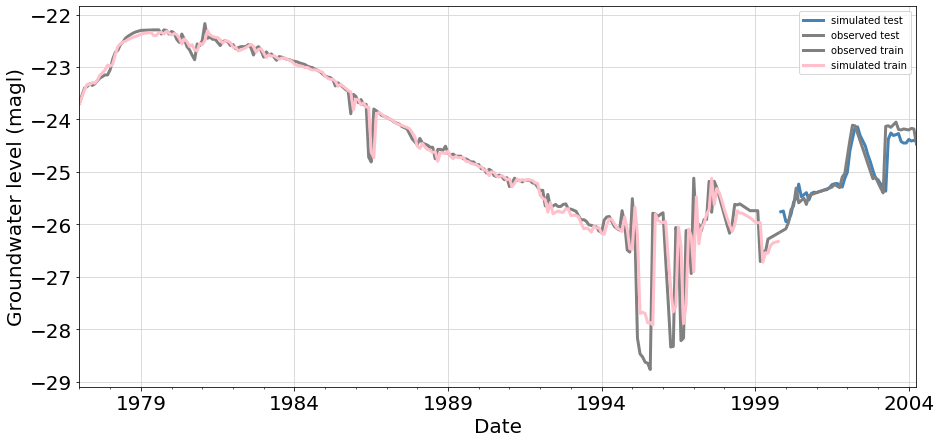

In [60]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima1.iloc[274:328].index)
df1['observed test']      = pima['D4N0142'].iloc[274:328].values

df2 = pd.DataFrame(train_inverse_trans[6].values, columns = ['simulated train'],index =pima1.iloc[0:274].index)
df2['observed train'] = pima['D4N0142'].iloc[0:274].values

out_df = df2.append(df1, sort=True)




#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed train'].plot(color='grey', linewidth=3)
out_df['simulated train'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(15,7)

In [61]:
y_lstm = out_df['simulated test']

### GRU

In [62]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

In [63]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gru', 'rmse_gru', 'r2_gru','mae_gru'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(20, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(54, 6)

    #running function
    gwl = -1.09980612
    test_forecast = X_test
    steps_ahead = 54
    y_gru = forecast(model, test_forecast, gwl, steps_ahead)
    y_gru = np.array(y_gru)
    
    #metrics for test
    y_gru = y_gru
    test_pred.append(y_gru)
    mse_gru = mean_squared_error(y_test, y_gru)
    rmse_gru = np.sqrt(mse_gru)
    r2_gru = r2_score(y_test, y_gru)
    mae_gru = mean_absolute_error(y_test, y_gru)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gru,Round), round(rmse_gru,Round), round(r2_gru,Round),round(mae_gru,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(274, 6)
Train on 274 samples, validate on 54 samples
Epoch 1/1000
 96/274 [=========>....................] - ETA: 4s - loss: 1.7636 - mean_squared_error: 1.7636
Epoch 00001: val_loss improved from inf to 0.29980, saving model to model.h5
274/274 [==============================] - 5s 18ms/sample - loss: 1.5327 - mean_squared_error: 1.5327 - val_loss: 0.2998 - val_mean_squared_error: 0.2998
Epoch 2/1000
 96/274 [=========>....................] - ETA: 0s - loss: 1.1013 - mean_squared_error: 1.1013
Epoch 00002: val_loss improved from 0.29980 to 0.28679, saving model to model.h5
274/274 [==============================] - 0s 153us/sample - loss: 1.3457 - mean_squared_error: 1.3457 - val_loss: 0.2868 - val_mean_squared_error: 0.2868
Epoch 3/1000
 96/274 [=========>....................] - ETA: 0s - loss: 1.4362 - mean_squared_error: 1.4362
Epoch 00003: val_loss improved from 0.28679 to 0.27666, saving model to model.h5
274/274 [==============================] - 0s 142us/sample 

Epoch 25/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.3797 - mean_squared_error: 0.3797
Epoch 00025: val_loss improved from 0.14008 to 0.13386, saving model to model.h5
274/274 [==============================] - 0s 137us/sample - loss: 0.3827 - mean_squared_error: 0.3827 - val_loss: 0.1339 - val_mean_squared_error: 0.1339
Epoch 26/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.4226 - mean_squared_error: 0.4226
Epoch 00026: val_loss improved from 0.13386 to 0.12921, saving model to model.h5
274/274 [==============================] - 0s 133us/sample - loss: 0.3721 - mean_squared_error: 0.3721 - val_loss: 0.1292 - val_mean_squared_error: 0.1292
Epoch 27/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.3008 - mean_squared_error: 0.3008
Epoch 00027: val_loss improved from 0.12921 to 0.12411, saving model to model.h5
274/274 [==============================] - 0s 140us/sample - loss: 0.3291 - mean_squared_error: 0.3291 - val_loss: 0.124

Epoch 49/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1212 - mean_squared_error: 0.1212
Epoch 00049: val_loss improved from 0.05791 to 0.05529, saving model to model.h5
274/274 [==============================] - 0s 141us/sample - loss: 0.1160 - mean_squared_error: 0.1160 - val_loss: 0.0553 - val_mean_squared_error: 0.0553
Epoch 50/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1244 - mean_squared_error: 0.1244
Epoch 00050: val_loss improved from 0.05529 to 0.05342, saving model to model.h5
274/274 [==============================] - 0s 147us/sample - loss: 0.1131 - mean_squared_error: 0.1131 - val_loss: 0.0534 - val_mean_squared_error: 0.0534
Epoch 51/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1292 - mean_squared_error: 0.1292
Epoch 00051: val_loss improved from 0.05342 to 0.05268, saving model to model.h5
274/274 [==============================] - 0s 169us/sample - loss: 0.1160 - mean_squared_error: 0.1160 - val_loss: 0.052

Epoch 74/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0990 - mean_squared_error: 0.0990
Epoch 00074: val_loss improved from 0.03773 to 0.03759, saving model to model.h5
274/274 [==============================] - 0s 155us/sample - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 75/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1171 - mean_squared_error: 0.1171
Epoch 00075: val_loss improved from 0.03759 to 0.03714, saving model to model.h5
274/274 [==============================] - 0s 167us/sample - loss: 0.0966 - mean_squared_error: 0.0966 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 76/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1216 - mean_squared_error: 0.1216
Epoch 00076: val_loss did not improve from 0.03714
274/274 [==============================] - 0s 79us/sample - loss: 0.0986 - mean_squared_error: 0.0986 - val_loss: 0.0384 - val_mean_squared_error: 0.0

 96/274 [=========>....................] - ETA: 0s - loss: 0.0937 - mean_squared_error: 0.0937
Epoch 00099: val_loss did not improve from 0.03372
274/274 [==============================] - 0s 82us/sample - loss: 0.0799 - mean_squared_error: 0.0799 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 100/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0861 - mean_squared_error: 0.0861
Epoch 00100: val_loss did not improve from 0.03372
274/274 [==============================] - 0s 79us/sample - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 101/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0565 - mean_squared_error: 0.0565
Epoch 00101: val_loss did not improve from 0.03372
274/274 [==============================] - 0s 79us/sample - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 102/1000
 96/274 [=========>....................] - ETA: 0s - lo

Epoch 125/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 00125: val_loss did not improve from 0.03071
274/274 [==============================] - 0s 151us/sample - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 126/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1043 - mean_squared_error: 0.1043
Epoch 00126: val_loss improved from 0.03071 to 0.03039, saving model to model.h5
274/274 [==============================] - 0s 210us/sample - loss: 0.0808 - mean_squared_error: 0.0808 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 127/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0813 - mean_squared_error: 0.0813
Epoch 00127: val_loss did not improve from 0.03039
274/274 [==============================] - 0s 85us/sample - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 128/1000
 96/274 

 96/274 [=========>....................] - ETA: 0s - loss: 0.0745 - mean_squared_error: 0.0745
Epoch 00150: val_loss improved from 0.02925 to 0.02901, saving model to model.h5
274/274 [==============================] - 0s 167us/sample - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 151/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 00151: val_loss did not improve from 0.02901
274/274 [==============================] - 0s 83us/sample - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 152/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0651 - mean_squared_error: 0.0651
Epoch 00152: val_loss improved from 0.02901 to 0.02880, saving model to model.h5
274/274 [==============================] - 0s 158us/sample - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 15

274/274 [==============================] - 0s 184us/sample - loss: 0.0691 - mean_squared_error: 0.0691 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 176/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0922 - mean_squared_error: 0.0922
Epoch 00176: val_loss did not improve from 0.02684
274/274 [==============================] - 0s 96us/sample - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 177/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1043 - mean_squared_error: 0.1043
Epoch 00177: val_loss did not improve from 0.02684
274/274 [==============================] - 0s 84us/sample - loss: 0.0700 - mean_squared_error: 0.0700 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 178/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0583 - mean_squared_error: 0.0583
Epoch 00178: val_loss did not improve from 0.02684
274/274 [==============================] - 0s 88us/sam

Epoch 201/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0786 - mean_squared_error: 0.0786
Epoch 00201: val_loss improved from 0.02601 to 0.02591, saving model to model.h5
274/274 [==============================] - 0s 190us/sample - loss: 0.0725 - mean_squared_error: 0.0725 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 202/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0825 - mean_squared_error: 0.0825
Epoch 00202: val_loss did not improve from 0.02591
274/274 [==============================] - 0s 115us/sample - loss: 0.0771 - mean_squared_error: 0.0771 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 203/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0643 - mean_squared_error: 0.0643
Epoch 00203: val_loss did not improve from 0.02591
274/274 [==============================] - 0s 116us/sample - loss: 0.0724 - mean_squared_error: 0.0724 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 204/1000
 96/274

Epoch 227/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0618 - mean_squared_error: 0.0618
Epoch 00227: val_loss did not improve from 0.02581
274/274 [==============================] - 0s 123us/sample - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 228/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0576 - mean_squared_error: 0.0576
Epoch 00228: val_loss did not improve from 0.02581
274/274 [==============================] - 0s 123us/sample - loss: 0.0697 - mean_squared_error: 0.0697 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 229/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1078 - mean_squared_error: 0.1078
Epoch 00229: val_loss did not improve from 0.02581
274/274 [==============================] - 0s 163us/sample - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 230/1000
 96/274 [=========>..................

Epoch 253/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0559 - mean_squared_error: 0.0559
Epoch 00253: val_loss did not improve from 0.02557
274/274 [==============================] - 0s 110us/sample - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 254/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 00254: val_loss did not improve from 0.02557
274/274 [==============================] - 0s 136us/sample - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 255/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0622 - mean_squared_error: 0.0622
Epoch 00255: val_loss did not improve from 0.02557
274/274 [==============================] - 0s 125us/sample - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 256/1000
 96/274 [=========>..................

Epoch 279/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0577 - mean_squared_error: 0.0577
Epoch 00279: val_loss did not improve from 0.02536
274/274 [==============================] - 0s 113us/sample - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 280/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0658 - mean_squared_error: 0.0658
Epoch 00280: val_loss did not improve from 0.02536
274/274 [==============================] - 0s 103us/sample - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 281/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 00281: val_loss did not improve from 0.02536
274/274 [==============================] - 0s 107us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 282/1000
 96/274 [=========>..................

Epoch 305/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0875 - mean_squared_error: 0.0875
Epoch 00305: val_loss did not improve from 0.02516
274/274 [==============================] - 0s 114us/sample - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 306/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0945 - mean_squared_error: 0.0945
Epoch 00306: val_loss did not improve from 0.02516
274/274 [==============================] - 0s 104us/sample - loss: 0.0733 - mean_squared_error: 0.0733 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 307/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0752 - mean_squared_error: 0.0752
Epoch 00307: val_loss did not improve from 0.02516
274/274 [==============================] - 0s 132us/sample - loss: 0.0610 - mean_squared_error: 0.0610 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 308/1000
 96/274 [=========>..................

Epoch 331/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 00331: val_loss did not improve from 0.02516
274/274 [==============================] - 0s 135us/sample - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 332/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0753 - mean_squared_error: 0.0753
Epoch 00332: val_loss did not improve from 0.02516
274/274 [==============================] - 0s 161us/sample - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 333/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0883 - mean_squared_error: 0.0883
Epoch 00333: val_loss did not improve from 0.02516
274/274 [==============================] - 0s 169us/sample - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 334/1000
 96/274 [=========>..................

Epoch 357/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0878 - mean_squared_error: 0.0878
Epoch 00357: val_loss did not improve from 0.02516
274/274 [==============================] - 0s 115us/sample - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 358/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0921 - mean_squared_error: 0.0921
Epoch 00358: val_loss did not improve from 0.02516
274/274 [==============================] - 0s 215us/sample - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 359/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0562 - mean_squared_error: 0.0562
Epoch 00359: val_loss did not improve from 0.02516
274/274 [==============================] - 0s 156us/sample - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 360/1000
 96/274 [=========>..................

Epoch 383/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0739 - mean_squared_error: 0.0739
Epoch 00383: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 245us/sample - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 384/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0816 - mean_squared_error: 0.0816
Epoch 00384: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 348us/sample - loss: 0.0648 - mean_squared_error: 0.0648 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 385/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00385: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 214us/sample - loss: 0.0649 - mean_squared_error: 0.0649 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 386/1000
 96/274 [=========>..................

Epoch 409/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0455 - mean_squared_error: 0.0455
Epoch 00409: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 92us/sample - loss: 0.0592 - mean_squared_error: 0.0592 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 410/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0474 - mean_squared_error: 0.0474
Epoch 00410: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 131us/sample - loss: 0.0733 - mean_squared_error: 0.0733 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 411/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0760 - mean_squared_error: 0.0760
Epoch 00411: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 140us/sample - loss: 0.0669 - mean_squared_error: 0.0669 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 412/1000
 96/274 [=========>...................

Epoch 435/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0745 - mean_squared_error: 0.0745
Epoch 00435: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 203us/sample - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 436/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0605 - mean_squared_error: 0.0605
Epoch 00436: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 126us/sample - loss: 0.0626 - mean_squared_error: 0.0626 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 437/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 00437: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 162us/sample - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 438/1000
 96/274 [=========>..................

Epoch 461/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00461: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 88us/sample - loss: 0.0649 - mean_squared_error: 0.0649 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 462/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0738 - mean_squared_error: 0.0738
Epoch 00462: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 97us/sample - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 463/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 00463: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 90us/sample - loss: 0.0559 - mean_squared_error: 0.0559 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 464/1000
 96/274 [=========>....................]

274/274 [==============================] - 0s 207us/sample - loss: 0.7918 - mean_squared_error: 0.7918 - val_loss: 0.1698 - val_mean_squared_error: 0.1698
Epoch 15/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.6315 - mean_squared_error: 0.6315
Epoch 00015: val_loss improved from 0.16979 to 0.16314, saving model to model.h5
274/274 [==============================] - 0s 235us/sample - loss: 0.7503 - mean_squared_error: 0.7503 - val_loss: 0.1631 - val_mean_squared_error: 0.1631
Epoch 16/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.7100 - mean_squared_error: 0.7100
Epoch 00016: val_loss improved from 0.16314 to 0.15679, saving model to model.h5
274/274 [==============================] - 0s 192us/sample - loss: 0.6991 - mean_squared_error: 0.6991 - val_loss: 0.1568 - val_mean_squared_error: 0.1568
Epoch 17/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.7927 - mean_squared_error: 0.7927
Epoch 00017: val_loss improved from 0.15679 to

 96/274 [=========>....................] - ETA: 0s - loss: 0.2114 - mean_squared_error: 0.2114
Epoch 00038: val_loss improved from 0.06292 to 0.06136, saving model to model.h5
274/274 [==============================] - 0s 228us/sample - loss: 0.1715 - mean_squared_error: 0.1715 - val_loss: 0.0614 - val_mean_squared_error: 0.0614
Epoch 39/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1519 - mean_squared_error: 0.1519
Epoch 00039: val_loss improved from 0.06136 to 0.05932, saving model to model.h5
274/274 [==============================] - 0s 280us/sample - loss: 0.1887 - mean_squared_error: 0.1887 - val_loss: 0.0593 - val_mean_squared_error: 0.0593
Epoch 40/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2078 - mean_squared_error: 0.2078
Epoch 00040: val_loss improved from 0.05932 to 0.05762, saving model to model.h5
274/274 [==============================] - 0s 182us/sample - loss: 0.1459 - mean_squared_error: 0.1459 - val_loss: 0.0576 - val_mean_s

 96/274 [=========>....................] - ETA: 0s - loss: 0.1254 - mean_squared_error: 0.1254
Epoch 00062: val_loss improved from 0.04140 to 0.04085, saving model to model.h5
274/274 [==============================] - 0s 180us/sample - loss: 0.0929 - mean_squared_error: 0.0929 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 63/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0941 - mean_squared_error: 0.0941
Epoch 00063: val_loss improved from 0.04085 to 0.04033, saving model to model.h5
274/274 [==============================] - 0s 212us/sample - loss: 0.0924 - mean_squared_error: 0.0924 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 64/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1422 - mean_squared_error: 0.1422
Epoch 00064: val_loss improved from 0.04033 to 0.04032, saving model to model.h5
274/274 [==============================] - 0s 184us/sample - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.0403 - val_mean_s

 96/274 [=========>....................] - ETA: 0s - loss: 0.1007 - mean_squared_error: 0.1007
Epoch 00087: val_loss did not improve from 0.03567
274/274 [==============================] - 0s 94us/sample - loss: 0.0826 - mean_squared_error: 0.0826 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 88/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1148 - mean_squared_error: 0.1148
Epoch 00088: val_loss improved from 0.03567 to 0.03473, saving model to model.h5
274/274 [==============================] - 0s 174us/sample - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 89/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0811 - mean_squared_error: 0.0811
Epoch 00089: val_loss did not improve from 0.03473
274/274 [==============================] - 0s 87us/sample - loss: 0.0761 - mean_squared_error: 0.0761 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 90/1000
 96/274 [=========>........

 96/274 [=========>....................] - ETA: 0s - loss: 0.1122 - mean_squared_error: 0.1122
Epoch 00112: val_loss did not improve from 0.03192
274/274 [==============================] - 0s 102us/sample - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 113/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1148 - mean_squared_error: 0.1148
Epoch 00113: val_loss did not improve from 0.03192
274/274 [==============================] - 0s 90us/sample - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 114/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 00114: val_loss improved from 0.03192 to 0.03184, saving model to model.h5
274/274 [==============================] - 0s 181us/sample - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 115/1000
 96/274 [=========>....

Epoch 138/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0854 - mean_squared_error: 0.0854
Epoch 00138: val_loss did not improve from 0.02974
274/274 [==============================] - 0s 89us/sample - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 139/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 00139: val_loss did not improve from 0.02974
274/274 [==============================] - 0s 99us/sample - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 140/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 00140: val_loss improved from 0.02974 to 0.02958, saving model to model.h5
274/274 [==============================] - 0s 170us/sample - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 141/1000
 96/274 [

Epoch 164/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 00164: val_loss did not improve from 0.02822
274/274 [==============================] - 0s 90us/sample - loss: 0.0748 - mean_squared_error: 0.0748 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 165/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0867 - mean_squared_error: 0.0867
Epoch 00165: val_loss did not improve from 0.02822
274/274 [==============================] - 0s 107us/sample - loss: 0.0710 - mean_squared_error: 0.0710 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 166/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 00166: val_loss did not improve from 0.02822
274/274 [==============================] - 0s 83us/sample - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 167/1000
 96/274 [=========>....................

 96/274 [=========>....................] - ETA: 0s - loss: 0.0748 - mean_squared_error: 0.0748
Epoch 00189: val_loss did not improve from 0.02702
274/274 [==============================] - 0s 103us/sample - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 190/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0408 - mean_squared_error: 0.0408
Epoch 00190: val_loss did not improve from 0.02702
274/274 [==============================] - 0s 218us/sample - loss: 0.0626 - mean_squared_error: 0.0626 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 191/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0408 - mean_squared_error: 0.0408
Epoch 00191: val_loss did not improve from 0.02702
274/274 [==============================] - 0s 98us/sample - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 192/1000
 96/274 [=========>....................] - ETA: 0s - 

Epoch 215/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 00215: val_loss did not improve from 0.02671
274/274 [==============================] - 0s 89us/sample - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 216/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0719 - mean_squared_error: 0.0719
Epoch 00216: val_loss did not improve from 0.02671
274/274 [==============================] - 0s 91us/sample - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 217/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0538 - mean_squared_error: 0.0538
Epoch 00217: val_loss did not improve from 0.02671
274/274 [==============================] - 0s 85us/sample - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 218/1000
 96/274 [=========>....................]

Epoch 241/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0908 - mean_squared_error: 0.0908
Epoch 00241: val_loss did not improve from 0.02596
274/274 [==============================] - 0s 86us/sample - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 242/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0779 - mean_squared_error: 0.0779
Epoch 00242: val_loss did not improve from 0.02596
274/274 [==============================] - 0s 86us/sample - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 243/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0590 - mean_squared_error: 0.0590
Epoch 00243: val_loss improved from 0.02596 to 0.02594, saving model to model.h5
274/274 [==============================] - 0s 169us/sample - loss: 0.0702 - mean_squared_error: 0.0702 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 244/1000
 96/274 [

Epoch 267/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0570 - mean_squared_error: 0.0570
Epoch 00267: val_loss did not improve from 0.02573
274/274 [==============================] - 0s 102us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 268/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1111 - mean_squared_error: 0.1111
Epoch 00268: val_loss did not improve from 0.02573
274/274 [==============================] - 0s 93us/sample - loss: 0.0668 - mean_squared_error: 0.0668 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 269/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0830 - mean_squared_error: 0.0830
Epoch 00269: val_loss did not improve from 0.02573
274/274 [==============================] - 0s 98us/sample - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 270/1000
 96/274 [=========>....................

Epoch 293/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0699 - mean_squared_error: 0.0699
Epoch 00293: val_loss did not improve from 0.02547
274/274 [==============================] - 0s 85us/sample - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 294/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 00294: val_loss did not improve from 0.02547
274/274 [==============================] - 0s 104us/sample - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 295/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 00295: val_loss did not improve from 0.02547
274/274 [==============================] - 0s 91us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 296/1000
 96/274 [=========>....................

Epoch 319/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0812 - mean_squared_error: 0.0812
Epoch 00319: val_loss did not improve from 0.02547
274/274 [==============================] - 0s 93us/sample - loss: 0.0727 - mean_squared_error: 0.0727 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 320/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0504 - mean_squared_error: 0.0504
Epoch 00320: val_loss did not improve from 0.02547
274/274 [==============================] - 0s 87us/sample - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 321/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0843 - mean_squared_error: 0.0843
Epoch 00321: val_loss did not improve from 0.02547
274/274 [==============================] - 0s 89us/sample - loss: 0.0649 - mean_squared_error: 0.0649 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 322/1000
 96/274 [=========>....................]

Epoch 345/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0515 - mean_squared_error: 0.0515
Epoch 00345: val_loss did not improve from 0.02547
274/274 [==============================] - 0s 115us/sample - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 346/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0570 - mean_squared_error: 0.0570
Epoch 00346: val_loss did not improve from 0.02547
274/274 [==============================] - 0s 97us/sample - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 347/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0572 - mean_squared_error: 0.0572
Epoch 00347: val_loss did not improve from 0.02547
274/274 [==============================] - 0s 102us/sample - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 348/1000
 96/274 [=========>...................

Epoch 371/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0716 - mean_squared_error: 0.0716
Epoch 00371: val_loss did not improve from 0.02547
274/274 [==============================] - 0s 90us/sample - loss: 0.0710 - mean_squared_error: 0.0710 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 372/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0744 - mean_squared_error: 0.0744
Epoch 00372: val_loss did not improve from 0.02547
274/274 [==============================] - 0s 87us/sample - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 373/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0512 - mean_squared_error: 0.0512
Epoch 00373: val_loss did not improve from 0.02547
274/274 [==============================] - 0s 85us/sample - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 374/1000
 96/274 [=========>....................]

Epoch 21/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.3389 - mean_squared_error: 0.3389
Epoch 00021: val_loss improved from 0.14119 to 0.13762, saving model to model.h5
274/274 [==============================] - 0s 172us/sample - loss: 0.3023 - mean_squared_error: 0.3023 - val_loss: 0.1376 - val_mean_squared_error: 0.1376
Epoch 22/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2707 - mean_squared_error: 0.2707
Epoch 00022: val_loss improved from 0.13762 to 0.13469, saving model to model.h5
274/274 [==============================] - 0s 174us/sample - loss: 0.2926 - mean_squared_error: 0.2926 - val_loss: 0.1347 - val_mean_squared_error: 0.1347
Epoch 23/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2664 - mean_squared_error: 0.2664
Epoch 00023: val_loss improved from 0.13469 to 0.13146, saving model to model.h5
274/274 [==============================] - 0s 160us/sample - loss: 0.2765 - mean_squared_error: 0.2765 - val_loss: 0.131

Epoch 45/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1178 - mean_squared_error: 0.1178
Epoch 00045: val_loss improved from 0.08560 to 0.08473, saving model to model.h5
274/274 [==============================] - 0s 153us/sample - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.0847 - val_mean_squared_error: 0.0847
Epoch 46/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0840 - mean_squared_error: 0.0840
Epoch 00046: val_loss improved from 0.08473 to 0.08235, saving model to model.h5
274/274 [==============================] - 0s 177us/sample - loss: 0.1071 - mean_squared_error: 0.1071 - val_loss: 0.0824 - val_mean_squared_error: 0.0824
Epoch 47/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1218 - mean_squared_error: 0.1218
Epoch 00047: val_loss improved from 0.08235 to 0.08165, saving model to model.h5
274/274 [==============================] - 0s 176us/sample - loss: 0.0995 - mean_squared_error: 0.0995 - val_loss: 0.081

274/274 [==============================] - 0s 174us/sample - loss: 0.1034 - mean_squared_error: 0.1034 - val_loss: 0.0622 - val_mean_squared_error: 0.0622
Epoch 70/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1145 - mean_squared_error: 0.1145
Epoch 00070: val_loss improved from 0.06224 to 0.06199, saving model to model.h5
274/274 [==============================] - 0s 173us/sample - loss: 0.0915 - mean_squared_error: 0.0915 - val_loss: 0.0620 - val_mean_squared_error: 0.0620
Epoch 71/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0841 - mean_squared_error: 0.0841
Epoch 00071: val_loss improved from 0.06199 to 0.06080, saving model to model.h5
274/274 [==============================] - 0s 149us/sample - loss: 0.0913 - mean_squared_error: 0.0913 - val_loss: 0.0608 - val_mean_squared_error: 0.0608
Epoch 72/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0822 - mean_squared_error: 0.0822
Epoch 00072: val_loss did not improve from 0.0

Epoch 95/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0702 - mean_squared_error: 0.0702
Epoch 00095: val_loss improved from 0.05291 to 0.05203, saving model to model.h5
274/274 [==============================] - 0s 198us/sample - loss: 0.0934 - mean_squared_error: 0.0934 - val_loss: 0.0520 - val_mean_squared_error: 0.0520
Epoch 96/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1147 - mean_squared_error: 0.1147
Epoch 00096: val_loss improved from 0.05203 to 0.04985, saving model to model.h5
274/274 [==============================] - 0s 167us/sample - loss: 0.0862 - mean_squared_error: 0.0862 - val_loss: 0.0498 - val_mean_squared_error: 0.0498
Epoch 97/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0802 - mean_squared_error: 0.0802
Epoch 00097: val_loss did not improve from 0.04985
274/274 [==============================] - 0s 92us/sample - loss: 0.0903 - mean_squared_error: 0.0903 - val_loss: 0.0520 - val_mean_squared_error: 0.0

 96/274 [=========>....................] - ETA: 0s - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 00120: val_loss did not improve from 0.04398
274/274 [==============================] - 0s 100us/sample - loss: 0.0832 - mean_squared_error: 0.0832 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 121/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0950 - mean_squared_error: 0.0950
Epoch 00121: val_loss improved from 0.04398 to 0.04378, saving model to model.h5
274/274 [==============================] - 0s 160us/sample - loss: 0.0903 - mean_squared_error: 0.0903 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 122/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0629 - mean_squared_error: 0.0629
Epoch 00122: val_loss did not improve from 0.04378
274/274 [==============================] - 0s 106us/sample - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 123/1000
 96/274 [=========>...

 96/274 [=========>....................] - ETA: 0s - loss: 0.1016 - mean_squared_error: 0.1016
Epoch 00145: val_loss did not improve from 0.03881
274/274 [==============================] - 0s 101us/sample - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 146/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0832 - mean_squared_error: 0.0832
Epoch 00146: val_loss improved from 0.03881 to 0.03811, saving model to model.h5
274/274 [==============================] - 0s 202us/sample - loss: 0.0765 - mean_squared_error: 0.0765 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 147/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 00147: val_loss did not improve from 0.03811
274/274 [==============================] - 0s 88us/sample - loss: 0.0852 - mean_squared_error: 0.0852 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 148/1000
 96/274 [=========>....

Epoch 171/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0483 - mean_squared_error: 0.0483
Epoch 00171: val_loss improved from 0.03460 to 0.03353, saving model to model.h5
274/274 [==============================] - 0s 266us/sample - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.0335 - val_mean_squared_error: 0.0335
Epoch 172/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0704 - mean_squared_error: 0.0704
Epoch 00172: val_loss did not improve from 0.03353
274/274 [==============================] - 0s 105us/sample - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 173/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0839 - mean_squared_error: 0.0839
Epoch 00173: val_loss did not improve from 0.03353
274/274 [==============================] - 0s 126us/sample - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 174/1000
 96/274

 96/274 [=========>....................] - ETA: 0s - loss: 0.0655 - mean_squared_error: 0.0655
Epoch 00196: val_loss did not improve from 0.03134
274/274 [==============================] - 0s 89us/sample - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 197/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0406 - mean_squared_error: 0.0406
Epoch 00197: val_loss improved from 0.03134 to 0.03055, saving model to model.h5
274/274 [==============================] - 0s 164us/sample - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 198/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 00198: val_loss did not improve from 0.03055
274/274 [==============================] - 0s 101us/sample - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.0312 - val_mean_squared_error: 0.0312
Epoch 199/1000
 96/274 [=========>....

Epoch 222/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0697 - mean_squared_error: 0.0697
Epoch 00222: val_loss did not improve from 0.02898
274/274 [==============================] - 0s 84us/sample - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 223/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0819 - mean_squared_error: 0.0819
Epoch 00223: val_loss did not improve from 0.02898
274/274 [==============================] - 0s 91us/sample - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 224/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0778 - mean_squared_error: 0.0778
Epoch 00224: val_loss did not improve from 0.02898
274/274 [==============================] - 0s 90us/sample - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 225/1000
 96/274 [=========>....................]

 96/274 [=========>....................] - ETA: 0s - loss: 0.0824 - mean_squared_error: 0.0824
Epoch 00247: val_loss did not improve from 0.02738
274/274 [==============================] - 0s 108us/sample - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 248/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0822 - mean_squared_error: 0.0822
Epoch 00248: val_loss did not improve from 0.02738
274/274 [==============================] - 0s 99us/sample - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 249/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 00249: val_loss did not improve from 0.02738
274/274 [==============================] - 0s 98us/sample - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 250/1000
 96/274 [=========>....................] - ETA: 0s - l

Epoch 273/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0947 - mean_squared_error: 0.0947
Epoch 00273: val_loss did not improve from 0.02650
274/274 [==============================] - 0s 100us/sample - loss: 0.0705 - mean_squared_error: 0.0705 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 274/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0703 - mean_squared_error: 0.0703
Epoch 00274: val_loss did not improve from 0.02650
274/274 [==============================] - 0s 102us/sample - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 275/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 00275: val_loss did not improve from 0.02650
274/274 [==============================] - 0s 108us/sample - loss: 0.0725 - mean_squared_error: 0.0725 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 276/1000
 96/274 [=========>..................

Epoch 299/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0605 - mean_squared_error: 0.0605
Epoch 00299: val_loss did not improve from 0.02620
274/274 [==============================] - 0s 104us/sample - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 300/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00300: val_loss did not improve from 0.02620
274/274 [==============================] - 0s 97us/sample - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 301/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0520 - mean_squared_error: 0.0520
Epoch 00301: val_loss did not improve from 0.02620
274/274 [==============================] - 0s 124us/sample - loss: 0.0583 - mean_squared_error: 0.0583 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 302/1000
 96/274 [=========>...................

Epoch 325/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 00325: val_loss did not improve from 0.02532
274/274 [==============================] - 0s 99us/sample - loss: 0.0670 - mean_squared_error: 0.0670 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 326/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0880 - mean_squared_error: 0.0880
Epoch 00326: val_loss did not improve from 0.02532
274/274 [==============================] - 0s 96us/sample - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 327/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0399 - mean_squared_error: 0.0399
Epoch 00327: val_loss did not improve from 0.02532
274/274 [==============================] - 0s 122us/sample - loss: 0.0722 - mean_squared_error: 0.0722 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 328/1000
 96/274 [=========>....................

Epoch 351/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00351: val_loss did not improve from 0.02532
274/274 [==============================] - 0s 92us/sample - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 352/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0573 - mean_squared_error: 0.0573
Epoch 00352: val_loss did not improve from 0.02532
274/274 [==============================] - 0s 119us/sample - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 353/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00353: val_loss did not improve from 0.02532
274/274 [==============================] - 0s 98us/sample - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 354/1000
 96/274 [=========>....................

Epoch 377/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0840 - mean_squared_error: 0.0840
Epoch 00377: val_loss did not improve from 0.02474
274/274 [==============================] - 0s 96us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 378/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0560 - mean_squared_error: 0.0560
Epoch 00378: val_loss did not improve from 0.02474
274/274 [==============================] - 0s 95us/sample - loss: 0.0586 - mean_squared_error: 0.0586 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 379/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0513 - mean_squared_error: 0.0513
Epoch 00379: val_loss did not improve from 0.02474
274/274 [==============================] - 0s 93us/sample - loss: 0.0620 - mean_squared_error: 0.0620 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 380/1000
 96/274 [=========>....................]

Epoch 403/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1207 - mean_squared_error: 0.1207
Epoch 00403: val_loss did not improve from 0.02456
274/274 [==============================] - 0s 112us/sample - loss: 0.0621 - mean_squared_error: 0.0621 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 404/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0371 - mean_squared_error: 0.0371
Epoch 00404: val_loss did not improve from 0.02456
274/274 [==============================] - 0s 92us/sample - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 405/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0668 - mean_squared_error: 0.0668
Epoch 00405: val_loss did not improve from 0.02456
274/274 [==============================] - 0s 88us/sample - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 406/1000
 96/274 [=========>....................

Epoch 429/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0666 - mean_squared_error: 0.0666
Epoch 00429: val_loss did not improve from 0.02424
274/274 [==============================] - 0s 124us/sample - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 430/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0860 - mean_squared_error: 0.0860
Epoch 00430: val_loss did not improve from 0.02424
274/274 [==============================] - 0s 92us/sample - loss: 0.0666 - mean_squared_error: 0.0666 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 431/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0587 - mean_squared_error: 0.0587
Epoch 00431: val_loss did not improve from 0.02424
274/274 [==============================] - 0s 88us/sample - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 432/1000
 96/274 [=========>....................

Epoch 455/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 00455: val_loss did not improve from 0.02424
274/274 [==============================] - 0s 89us/sample - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 456/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0502 - mean_squared_error: 0.0502
Epoch 00456: val_loss did not improve from 0.02424
274/274 [==============================] - 0s 92us/sample - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 457/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0495 - mean_squared_error: 0.0495
Epoch 00457: val_loss did not improve from 0.02424
274/274 [==============================] - 0s 91us/sample - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 458/1000
 96/274 [=========>....................]

Epoch 481/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 00481: val_loss did not improve from 0.02419
274/274 [==============================] - 0s 85us/sample - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 482/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 00482: val_loss did not improve from 0.02419
274/274 [==============================] - 0s 84us/sample - loss: 0.0679 - mean_squared_error: 0.0679 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 483/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0425 - mean_squared_error: 0.0425
Epoch 00483: val_loss did not improve from 0.02419
274/274 [==============================] - 0s 83us/sample - loss: 0.0679 - mean_squared_error: 0.0679 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 484/1000
 96/274 [=========>....................]

Epoch 507/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0681 - mean_squared_error: 0.0681
Epoch 00507: val_loss did not improve from 0.02419
274/274 [==============================] - 0s 97us/sample - loss: 0.0660 - mean_squared_error: 0.0660 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 508/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 00508: val_loss did not improve from 0.02419
274/274 [==============================] - 0s 93us/sample - loss: 0.0608 - mean_squared_error: 0.0608 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 509/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0903 - mean_squared_error: 0.0903
Epoch 00509: val_loss did not improve from 0.02419
274/274 [==============================] - 0s 94us/sample - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 510/1000
 96/274 [=========>....................]

Epoch 533/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0485 - mean_squared_error: 0.0485
Epoch 00533: val_loss did not improve from 0.02415
274/274 [==============================] - 0s 99us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 534/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0490 - mean_squared_error: 0.0490
Epoch 00534: val_loss did not improve from 0.02415
274/274 [==============================] - 0s 112us/sample - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 535/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 00535: val_loss did not improve from 0.02415
274/274 [==============================] - 0s 97us/sample - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 536/1000
 96/274 [=========>....................

Epoch 559/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0511 - mean_squared_error: 0.0511
Epoch 00559: val_loss did not improve from 0.02415
274/274 [==============================] - 0s 101us/sample - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 560/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0791 - mean_squared_error: 0.0791
Epoch 00560: val_loss improved from 0.02415 to 0.02414, saving model to model.h5
274/274 [==============================] - 0s 173us/sample - loss: 0.0701 - mean_squared_error: 0.0701 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 561/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0668 - mean_squared_error: 0.0668
Epoch 00561: val_loss did not improve from 0.02414
274/274 [==============================] - 0s 87us/sample - loss: 0.0637 - mean_squared_error: 0.0637 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 562/1000
 96/274 

Epoch 585/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0395 - mean_squared_error: 0.0395
Epoch 00585: val_loss did not improve from 0.02399
274/274 [==============================] - 0s 106us/sample - loss: 0.0666 - mean_squared_error: 0.0666 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 586/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0603 - mean_squared_error: 0.0603
Epoch 00586: val_loss did not improve from 0.02399
274/274 [==============================] - 0s 90us/sample - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 587/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 00587: val_loss did not improve from 0.02399
274/274 [==============================] - 0s 92us/sample - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 588/1000
 96/274 [=========>....................

Epoch 611/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 00611: val_loss did not improve from 0.02394
274/274 [==============================] - 0s 104us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 612/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0700 - mean_squared_error: 0.0700
Epoch 00612: val_loss did not improve from 0.02394
274/274 [==============================] - 0s 105us/sample - loss: 0.0697 - mean_squared_error: 0.0697 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 613/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0447 - mean_squared_error: 0.0447
Epoch 00613: val_loss did not improve from 0.02394
274/274 [==============================] - 0s 122us/sample - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 614/1000
 96/274 [=========>..................

Epoch 637/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0915 - mean_squared_error: 0.0915
Epoch 00637: val_loss did not improve from 0.02394
274/274 [==============================] - 0s 99us/sample - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 638/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0961 - mean_squared_error: 0.0961
Epoch 00638: val_loss did not improve from 0.02394
274/274 [==============================] - 0s 103us/sample - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 639/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0739 - mean_squared_error: 0.0739
Epoch 00639: val_loss did not improve from 0.02394
274/274 [==============================] - 0s 102us/sample - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 640/1000
 96/274 [=========>...................

Epoch 663/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0590 - mean_squared_error: 0.0590
Epoch 00663: val_loss did not improve from 0.02394
274/274 [==============================] - 0s 98us/sample - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 664/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 00664: val_loss did not improve from 0.02394
274/274 [==============================] - 0s 100us/sample - loss: 0.0603 - mean_squared_error: 0.0603 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 665/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0847 - mean_squared_error: 0.0847
Epoch 00665: val_loss did not improve from 0.02394
274/274 [==============================] - 0s 94us/sample - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 666/1000
 96/274 [=========>....................

Epoch 689/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0726 - mean_squared_error: 0.0726
Epoch 00689: val_loss did not improve from 0.02394
274/274 [==============================] - 0s 103us/sample - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 690/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 00690: val_loss did not improve from 0.02394
274/274 [==============================] - 0s 108us/sample - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 691/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 00691: val_loss did not improve from 0.02394
274/274 [==============================] - 0s 91us/sample - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 692/1000
 96/274 [=========>...................

Epoch 5/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.7104 - mean_squared_error: 0.7104
Epoch 00005: val_loss improved from 0.21624 to 0.20758, saving model to model.h5
274/274 [==============================] - 0s 170us/sample - loss: 0.6862 - mean_squared_error: 0.6862 - val_loss: 0.2076 - val_mean_squared_error: 0.2076
Epoch 6/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.7835 - mean_squared_error: 0.7835
Epoch 00006: val_loss improved from 0.20758 to 0.19966, saving model to model.h5
274/274 [==============================] - 0s 170us/sample - loss: 0.6426 - mean_squared_error: 0.6426 - val_loss: 0.1997 - val_mean_squared_error: 0.1997
Epoch 7/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.6019 - mean_squared_error: 0.6019
Epoch 00007: val_loss improved from 0.19966 to 0.19229, saving model to model.h5
274/274 [==============================] - 0s 160us/sample - loss: 0.6065 - mean_squared_error: 0.6065 - val_loss: 0.1923 -

Epoch 29/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2024 - mean_squared_error: 0.2024
Epoch 00029: val_loss improved from 0.08727 to 0.08472, saving model to model.h5
274/274 [==============================] - 0s 173us/sample - loss: 0.1733 - mean_squared_error: 0.1733 - val_loss: 0.0847 - val_mean_squared_error: 0.0847
Epoch 30/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2119 - mean_squared_error: 0.2119
Epoch 00030: val_loss improved from 0.08472 to 0.08271, saving model to model.h5
274/274 [==============================] - 0s 200us/sample - loss: 0.1662 - mean_squared_error: 0.1662 - val_loss: 0.0827 - val_mean_squared_error: 0.0827
Epoch 31/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1357 - mean_squared_error: 0.1357
Epoch 00031: val_loss improved from 0.08271 to 0.08028, saving model to model.h5
274/274 [==============================] - 0s 160us/sample - loss: 0.1651 - mean_squared_error: 0.1651 - val_loss: 0.080

Epoch 53/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0801 - mean_squared_error: 0.0801
Epoch 00053: val_loss improved from 0.05454 to 0.05311, saving model to model.h5
274/274 [==============================] - 0s 177us/sample - loss: 0.0966 - mean_squared_error: 0.0966 - val_loss: 0.0531 - val_mean_squared_error: 0.0531
Epoch 54/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0965 - mean_squared_error: 0.0965
Epoch 00054: val_loss improved from 0.05311 to 0.05269, saving model to model.h5
274/274 [==============================] - 0s 203us/sample - loss: 0.0975 - mean_squared_error: 0.0975 - val_loss: 0.0527 - val_mean_squared_error: 0.0527
Epoch 55/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 00055: val_loss improved from 0.05269 to 0.05095, saving model to model.h5
274/274 [==============================] - 0s 176us/sample - loss: 0.0899 - mean_squared_error: 0.0899 - val_loss: 0.050

Epoch 78/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 00078: val_loss did not improve from 0.04200
274/274 [==============================] - 0s 94us/sample - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 79/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0795 - mean_squared_error: 0.0795
Epoch 00079: val_loss did not improve from 0.04200
274/274 [==============================] - 0s 99us/sample - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 80/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0735 - mean_squared_error: 0.0735
Epoch 00080: val_loss did not improve from 0.04200
274/274 [==============================] - 0s 113us/sample - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 81/1000
 96/274 [=========>....................] - 

 96/274 [=========>....................] - ETA: 0s - loss: 0.0988 - mean_squared_error: 0.0988
Epoch 00103: val_loss did not improve from 0.03644
274/274 [==============================] - 0s 106us/sample - loss: 0.0799 - mean_squared_error: 0.0799 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 104/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0669 - mean_squared_error: 0.0669
Epoch 00104: val_loss improved from 0.03644 to 0.03591, saving model to model.h5
274/274 [==============================] - 0s 176us/sample - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 105/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0751 - mean_squared_error: 0.0751
Epoch 00105: val_loss improved from 0.03591 to 0.03544, saving model to model.h5
274/274 [==============================] - 0s 189us/sample - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.0354 - val_mean_squared_error: 0.0354
Epoch 1

Epoch 128/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0760 - mean_squared_error: 0.0760
Epoch 00128: val_loss did not improve from 0.03269
274/274 [==============================] - 0s 99us/sample - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 129/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0645 - mean_squared_error: 0.0645
Epoch 00129: val_loss did not improve from 0.03269
274/274 [==============================] - 0s 98us/sample - loss: 0.0818 - mean_squared_error: 0.0818 - val_loss: 0.0332 - val_mean_squared_error: 0.0332
Epoch 130/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00130: val_loss did not improve from 0.03269
274/274 [==============================] - 0s 95us/sample - loss: 0.0761 - mean_squared_error: 0.0761 - val_loss: 0.0332 - val_mean_squared_error: 0.0332
Epoch 131/1000
 96/274 [=========>....................]

 96/274 [=========>....................] - ETA: 0s - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 00153: val_loss did not improve from 0.03028
274/274 [==============================] - 0s 490us/sample - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 154/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0518 - mean_squared_error: 0.0518
Epoch 00154: val_loss improved from 0.03028 to 0.03019, saving model to model.h5
274/274 [==============================] - 0s 661us/sample - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 155/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00155: val_loss improved from 0.03019 to 0.02970, saving model to model.h5
274/274 [==============================] - 0s 417us/sample - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 1

Epoch 178/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0557 - mean_squared_error: 0.0557
Epoch 00178: val_loss did not improve from 0.02749
274/274 [==============================] - 0s 138us/sample - loss: 0.0724 - mean_squared_error: 0.0724 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 179/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0587 - mean_squared_error: 0.0587
Epoch 00179: val_loss did not improve from 0.02749
274/274 [==============================] - 0s 129us/sample - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 180/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0596 - mean_squared_error: 0.0596
Epoch 00180: val_loss did not improve from 0.02749
274/274 [==============================] - 0s 135us/sample - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 181/1000
 96/274 [=========>..................

Epoch 204/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0721 - mean_squared_error: 0.0721
Epoch 00204: val_loss improved from 0.02690 to 0.02683, saving model to model.h5
274/274 [==============================] - 0s 642us/sample - loss: 0.0717 - mean_squared_error: 0.0717 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 205/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0603 - mean_squared_error: 0.0603
Epoch 00205: val_loss did not improve from 0.02683
274/274 [==============================] - 0s 248us/sample - loss: 0.0725 - mean_squared_error: 0.0725 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 206/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00206: val_loss did not improve from 0.02683
274/274 [==============================] - 0s 174us/sample - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 207/1000
 96/274

 96/274 [=========>....................] - ETA: 0s - loss: 0.0827 - mean_squared_error: 0.0827
Epoch 00229: val_loss improved from 0.02625 to 0.02619, saving model to model.h5
274/274 [==============================] - 0s 828us/sample - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 230/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00230: val_loss did not improve from 0.02619
274/274 [==============================] - 0s 365us/sample - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 231/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0635 - mean_squared_error: 0.0635
Epoch 00231: val_loss did not improve from 0.02619
274/274 [==============================] - 0s 392us/sample - loss: 0.0679 - mean_squared_error: 0.0679 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 232/1000
 96/274 [=========>...

Epoch 255/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0724 - mean_squared_error: 0.0724
Epoch 00255: val_loss did not improve from 0.02549
274/274 [==============================] - 0s 141us/sample - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 256/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 00256: val_loss did not improve from 0.02549
274/274 [==============================] - 0s 163us/sample - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 257/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0517 - mean_squared_error: 0.0517
Epoch 00257: val_loss did not improve from 0.02549
274/274 [==============================] - 0s 176us/sample - loss: 0.0749 - mean_squared_error: 0.0749 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 258/1000
 96/274 [=========>..................

Epoch 281/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0733 - mean_squared_error: 0.0733
Epoch 00281: val_loss did not improve from 0.02523
274/274 [==============================] - 0s 195us/sample - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 282/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 00282: val_loss improved from 0.02523 to 0.02516, saving model to model.h5
274/274 [==============================] - 0s 407us/sample - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 283/1000
192/274 [====================>.........] - ETA: 0s - loss: 0.0480 - mean_squared_error: 0.0480
Epoch 00283: val_loss did not improve from 0.02516
274/274 [==============================] - 0s 833us/sample - loss: 0.0689 - mean_squared_error: 0.0689 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 284/1000
 96/274

Epoch 307/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 00307: val_loss did not improve from 0.02507
274/274 [==============================] - 0s 227us/sample - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 308/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0615 - mean_squared_error: 0.0615
Epoch 00308: val_loss did not improve from 0.02507
274/274 [==============================] - 0s 261us/sample - loss: 0.0669 - mean_squared_error: 0.0669 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 309/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0617 - mean_squared_error: 0.0617
Epoch 00309: val_loss did not improve from 0.02507
274/274 [==============================] - 0s 219us/sample - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 310/1000
 96/274 [=========>..................

Epoch 333/1000
192/274 [====================>.........] - ETA: 0s - loss: 0.0682 - mean_squared_error: 0.0682
Epoch 00333: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 1ms/sample - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 334/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1034 - mean_squared_error: 0.1034
Epoch 00334: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 368us/sample - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 335/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0740 - mean_squared_error: 0.0740
Epoch 00335: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 302us/sample - loss: 0.0679 - mean_squared_error: 0.0679 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 336/1000
 96/274 [=========>....................

Epoch 359/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0560 - mean_squared_error: 0.0560
Epoch 00359: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 189us/sample - loss: 0.0670 - mean_squared_error: 0.0670 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 360/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 00360: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 387us/sample - loss: 0.0637 - mean_squared_error: 0.0637 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 361/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1265 - mean_squared_error: 0.1265
Epoch 00361: val_loss did not improve from 0.02497
274/274 [==============================] - 0s 193us/sample - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 362/1000
 96/274 [=========>..................

Epoch 385/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0760 - mean_squared_error: 0.0760
Epoch 00385: val_loss did not improve from 0.02481
274/274 [==============================] - 0s 305us/sample - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 386/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0466 - mean_squared_error: 0.0466
Epoch 00386: val_loss did not improve from 0.02481
274/274 [==============================] - 0s 116us/sample - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 387/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00387: val_loss did not improve from 0.02481
274/274 [==============================] - 0s 132us/sample - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 388/1000
 96/274 [=========>..................

Epoch 411/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0679 - mean_squared_error: 0.0679
Epoch 00411: val_loss did not improve from 0.02480
274/274 [==============================] - 0s 385us/sample - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 412/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0683 - mean_squared_error: 0.0683
Epoch 00412: val_loss did not improve from 0.02480
274/274 [==============================] - 0s 266us/sample - loss: 0.0705 - mean_squared_error: 0.0705 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 413/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0729 - mean_squared_error: 0.0729
Epoch 00413: val_loss did not improve from 0.02480
274/274 [==============================] - 0s 296us/sample - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 414/1000
 96/274 [=========>..................

Epoch 437/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0939 - mean_squared_error: 0.0939
Epoch 00437: val_loss did not improve from 0.02480
274/274 [==============================] - 0s 195us/sample - loss: 0.0636 - mean_squared_error: 0.0636 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 438/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0848 - mean_squared_error: 0.0848
Epoch 00438: val_loss did not improve from 0.02480
274/274 [==============================] - 0s 240us/sample - loss: 0.0637 - mean_squared_error: 0.0637 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 439/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0550 - mean_squared_error: 0.0550
Epoch 00439: val_loss did not improve from 0.02480
274/274 [==============================] - 0s 191us/sample - loss: 0.0710 - mean_squared_error: 0.0710 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 440/1000
 96/274 [=========>..................

Epoch 463/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0651 - mean_squared_error: 0.0651
Epoch 00463: val_loss did not improve from 0.02480
274/274 [==============================] - 0s 265us/sample - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 464/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 00464: val_loss did not improve from 0.02480
274/274 [==============================] - 0s 237us/sample - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 465/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0937 - mean_squared_error: 0.0937
Epoch 00465: val_loss did not improve from 0.02480
274/274 [==============================] - 0s 228us/sample - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 466/1000
 96/274 [=========>..................

Epoch 489/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0455 - mean_squared_error: 0.0455
Epoch 00489: val_loss did not improve from 0.02480
274/274 [==============================] - 0s 137us/sample - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 490/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 00490: val_loss did not improve from 0.02480
274/274 [==============================] - 0s 110us/sample - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 491/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0543 - mean_squared_error: 0.0543
Epoch 00491: val_loss did not improve from 0.02480
274/274 [==============================] - 0s 137us/sample - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 492/1000
 96/274 [=========>..................

 96/274 [=========>....................] - ETA: 0s - loss: 1.8334 - mean_squared_error: 1.8334
Epoch 00006: val_loss improved from 0.38436 to 0.36952, saving model to model.h5
274/274 [==============================] - 0s 174us/sample - loss: 1.6859 - mean_squared_error: 1.6859 - val_loss: 0.3695 - val_mean_squared_error: 0.3695
Epoch 7/1000
 96/274 [=========>....................] - ETA: 0s - loss: 1.8120 - mean_squared_error: 1.8120
Epoch 00007: val_loss improved from 0.36952 to 0.35559, saving model to model.h5
274/274 [==============================] - 0s 169us/sample - loss: 1.5879 - mean_squared_error: 1.5879 - val_loss: 0.3556 - val_mean_squared_error: 0.3556
Epoch 8/1000
 96/274 [=========>....................] - ETA: 0s - loss: 1.3472 - mean_squared_error: 1.3472
Epoch 00008: val_loss improved from 0.35559 to 0.33978, saving model to model.h5
274/274 [==============================] - 0s 207us/sample - loss: 1.4742 - mean_squared_error: 1.4742 - val_loss: 0.3398 - val_mean_squ

Epoch 30/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.4241 - mean_squared_error: 0.4241
Epoch 00030: val_loss improved from 0.12944 to 0.12357, saving model to model.h5
274/274 [==============================] - 0s 321us/sample - loss: 0.3826 - mean_squared_error: 0.3826 - val_loss: 0.1236 - val_mean_squared_error: 0.1236
Epoch 31/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.3271 - mean_squared_error: 0.3271
Epoch 00031: val_loss improved from 0.12357 to 0.11683, saving model to model.h5
274/274 [==============================] - 0s 296us/sample - loss: 0.3610 - mean_squared_error: 0.3610 - val_loss: 0.1168 - val_mean_squared_error: 0.1168
Epoch 32/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2913 - mean_squared_error: 0.2913
Epoch 00032: val_loss improved from 0.11683 to 0.11224, saving model to model.h5
274/274 [==============================] - 0s 278us/sample - loss: 0.3155 - mean_squared_error: 0.3155 - val_loss: 0.112

Epoch 54/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1165 - mean_squared_error: 0.1165
Epoch 00054: val_loss improved from 0.05465 to 0.05406, saving model to model.h5
274/274 [==============================] - 0s 223us/sample - loss: 0.1084 - mean_squared_error: 0.1084 - val_loss: 0.0541 - val_mean_squared_error: 0.0541
Epoch 55/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1537 - mean_squared_error: 0.1537
Epoch 00055: val_loss improved from 0.05406 to 0.05266, saving model to model.h5
274/274 [==============================] - 0s 308us/sample - loss: 0.1189 - mean_squared_error: 0.1189 - val_loss: 0.0527 - val_mean_squared_error: 0.0527
Epoch 56/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0772 - mean_squared_error: 0.0772
Epoch 00056: val_loss improved from 0.05266 to 0.05123, saving model to model.h5
274/274 [==============================] - 0s 316us/sample - loss: 0.1109 - mean_squared_error: 0.1109 - val_loss: 0.051

Epoch 78/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0975 - mean_squared_error: 0.0975
Epoch 00078: val_loss improved from 0.03706 to 0.03645, saving model to model.h5
274/274 [==============================] - 0s 361us/sample - loss: 0.0901 - mean_squared_error: 0.0901 - val_loss: 0.0365 - val_mean_squared_error: 0.0365
Epoch 79/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 00079: val_loss did not improve from 0.03645
274/274 [==============================] - 0s 158us/sample - loss: 0.0910 - mean_squared_error: 0.0910 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 80/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1327 - mean_squared_error: 0.1327
Epoch 00080: val_loss did not improve from 0.03645
274/274 [==============================] - 0s 107us/sample - loss: 0.0945 - mean_squared_error: 0.0945 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 81/1000
 96/274 [==

Epoch 103/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 00103: val_loss improved from 0.03104 to 0.03094, saving model to model.h5
274/274 [==============================] - 0s 275us/sample - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 104/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0735 - mean_squared_error: 0.0735
Epoch 00104: val_loss did not improve from 0.03094
274/274 [==============================] - 0s 209us/sample - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.0312 - val_mean_squared_error: 0.0312
Epoch 105/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1130 - mean_squared_error: 0.1130
Epoch 00105: val_loss improved from 0.03094 to 0.03084, saving model to model.h5
274/274 [==============================] - 0s 339us/sample - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.0308 - val_mean_squared_error:

 96/274 [=========>....................] - ETA: 0s - loss: 0.0861 - mean_squared_error: 0.0861
Epoch 00128: val_loss improved from 0.02895 to 0.02840, saving model to model.h5
274/274 [==============================] - 0s 349us/sample - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 129/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0515 - mean_squared_error: 0.0515
Epoch 00129: val_loss improved from 0.02840 to 0.02812, saving model to model.h5
274/274 [==============================] - 0s 228us/sample - loss: 0.0702 - mean_squared_error: 0.0702 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 130/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0698 - mean_squared_error: 0.0698
Epoch 00130: val_loss did not improve from 0.02812
274/274 [==============================] - 0s 183us/sample - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 1

 96/274 [=========>....................] - ETA: 0s - loss: 0.1109 - mean_squared_error: 0.1109
Epoch 00153: val_loss did not improve from 0.02709
274/274 [==============================] - 0s 139us/sample - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 154/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0902 - mean_squared_error: 0.0902
Epoch 00154: val_loss improved from 0.02709 to 0.02701, saving model to model.h5
274/274 [==============================] - 0s 302us/sample - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 155/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0872 - mean_squared_error: 0.0872
Epoch 00155: val_loss did not improve from 0.02701
274/274 [==============================] - 0s 137us/sample - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 156/1000
 96/274 [=========>...

Epoch 179/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0834 - mean_squared_error: 0.0834
Epoch 00179: val_loss did not improve from 0.02593
274/274 [==============================] - 0s 144us/sample - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 180/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 00180: val_loss did not improve from 0.02593
274/274 [==============================] - 0s 135us/sample - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 181/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0915 - mean_squared_error: 0.0915
Epoch 00181: val_loss did not improve from 0.02593
274/274 [==============================] - 0s 164us/sample - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 182/1000
 96/274 [=========>..................

Epoch 205/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1098 - mean_squared_error: 0.1098
Epoch 00205: val_loss did not improve from 0.02530
274/274 [==============================] - 0s 129us/sample - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 206/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0681 - mean_squared_error: 0.0681
Epoch 00206: val_loss did not improve from 0.02530
274/274 [==============================] - 0s 107us/sample - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 207/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0547 - mean_squared_error: 0.0547
Epoch 00207: val_loss improved from 0.02530 to 0.02509, saving model to model.h5
274/274 [==============================] - 0s 214us/sample - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 208/1000
 96/274

Epoch 231/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0546 - mean_squared_error: 0.0546
Epoch 00231: val_loss did not improve from 0.02501
274/274 [==============================] - 0s 174us/sample - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 232/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0367 - mean_squared_error: 0.0367
Epoch 00232: val_loss did not improve from 0.02501
274/274 [==============================] - 0s 210us/sample - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 233/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0699 - mean_squared_error: 0.0699
Epoch 00233: val_loss did not improve from 0.02501
274/274 [==============================] - 0s 156us/sample - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 234/1000
 96/274 [=========>..................

Epoch 257/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1225 - mean_squared_error: 0.1225
Epoch 00257: val_loss did not improve from 0.02501
274/274 [==============================] - 0s 113us/sample - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 258/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0809 - mean_squared_error: 0.0809
Epoch 00258: val_loss did not improve from 0.02501
274/274 [==============================] - 0s 170us/sample - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 259/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0753 - mean_squared_error: 0.0753
Epoch 00259: val_loss did not improve from 0.02501
274/274 [==============================] - 0s 443us/sample - loss: 0.0727 - mean_squared_error: 0.0727 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 260/1000
 96/274 [=========>..................

Epoch 283/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0839 - mean_squared_error: 0.0839
Epoch 00283: val_loss did not improve from 0.02495
274/274 [==============================] - 0s 132us/sample - loss: 0.0692 - mean_squared_error: 0.0692 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 284/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1016 - mean_squared_error: 0.1016
Epoch 00284: val_loss did not improve from 0.02495
274/274 [==============================] - 0s 135us/sample - loss: 0.0702 - mean_squared_error: 0.0702 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 285/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0667 - mean_squared_error: 0.0667
Epoch 00285: val_loss did not improve from 0.02495
274/274 [==============================] - 0s 184us/sample - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 286/1000
192/274 [====================>.......

Epoch 309/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0544 - mean_squared_error: 0.0544
Epoch 00309: val_loss did not improve from 0.02495
274/274 [==============================] - 0s 251us/sample - loss: 0.0730 - mean_squared_error: 0.0730 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 310/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1181 - mean_squared_error: 0.1181
Epoch 00310: val_loss did not improve from 0.02495
274/274 [==============================] - 0s 163us/sample - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 311/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0801 - mean_squared_error: 0.0801
Epoch 00311: val_loss did not improve from 0.02495
274/274 [==============================] - 0s 235us/sample - loss: 0.0626 - mean_squared_error: 0.0626 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 312/1000
 96/274 [=========>..................

Epoch 335/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0745 - mean_squared_error: 0.0745
Epoch 00335: val_loss did not improve from 0.02467
274/274 [==============================] - 0s 274us/sample - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 336/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00336: val_loss did not improve from 0.02467
274/274 [==============================] - 0s 219us/sample - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 337/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 00337: val_loss did not improve from 0.02467
274/274 [==============================] - 0s 235us/sample - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 338/1000
 96/274 [=========>..................

Epoch 361/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0725 - mean_squared_error: 0.0725
Epoch 00361: val_loss did not improve from 0.02467
274/274 [==============================] - 0s 125us/sample - loss: 0.0702 - mean_squared_error: 0.0702 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 362/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0675 - mean_squared_error: 0.0675
Epoch 00362: val_loss did not improve from 0.02467
274/274 [==============================] - 0s 158us/sample - loss: 0.0602 - mean_squared_error: 0.0602 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 363/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0524 - mean_squared_error: 0.0524
Epoch 00363: val_loss did not improve from 0.02467
274/274 [==============================] - 0s 133us/sample - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 364/1000
 96/274 [=========>..................

Epoch 387/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0998 - mean_squared_error: 0.0998
Epoch 00387: val_loss did not improve from 0.02467
274/274 [==============================] - 0s 195us/sample - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 388/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1241 - mean_squared_error: 0.1241
Epoch 00388: val_loss did not improve from 0.02467
274/274 [==============================] - 0s 115us/sample - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 389/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 00389: val_loss did not improve from 0.02467
274/274 [==============================] - 0s 161us/sample - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 390/1000
 96/274 [=========>..................

Epoch 413/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 00413: val_loss did not improve from 0.02467
274/274 [==============================] - 0s 281us/sample - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 414/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0607 - mean_squared_error: 0.0607
Epoch 00414: val_loss did not improve from 0.02467
274/274 [==============================] - 0s 168us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 415/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0522 - mean_squared_error: 0.0522
Epoch 00415: val_loss did not improve from 0.02467
274/274 [==============================] - 0s 203us/sample - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 416/1000
 96/274 [=========>..................

274/274 [==============================] - 0s 195us/sample - loss: 0.9387 - mean_squared_error: 0.9387 - val_loss: 0.2440 - val_mean_squared_error: 0.2440
Epoch 5/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.8583 - mean_squared_error: 0.8583
Epoch 00005: val_loss improved from 0.24400 to 0.23436, saving model to model.h5
274/274 [==============================] - 0s 603us/sample - loss: 0.8620 - mean_squared_error: 0.8620 - val_loss: 0.2344 - val_mean_squared_error: 0.2344
Epoch 6/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.8909 - mean_squared_error: 0.8909
Epoch 00006: val_loss improved from 0.23436 to 0.22527, saving model to model.h5
274/274 [==============================] - 0s 435us/sample - loss: 0.8167 - mean_squared_error: 0.8167 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 7/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.7523 - mean_squared_error: 0.7523
Epoch 00007: val_loss improved from 0.22527 to 0.

 96/274 [=========>....................] - ETA: 0s - loss: 0.2540 - mean_squared_error: 0.2540
Epoch 00028: val_loss improved from 0.10429 to 0.10146, saving model to model.h5
274/274 [==============================] - 0s 288us/sample - loss: 0.2354 - mean_squared_error: 0.2354 - val_loss: 0.1015 - val_mean_squared_error: 0.1015
Epoch 29/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2072 - mean_squared_error: 0.2072
Epoch 00029: val_loss improved from 0.10146 to 0.09829, saving model to model.h5
274/274 [==============================] - 0s 265us/sample - loss: 0.2222 - mean_squared_error: 0.2222 - val_loss: 0.0983 - val_mean_squared_error: 0.0983
Epoch 30/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2659 - mean_squared_error: 0.2659
Epoch 00030: val_loss improved from 0.09829 to 0.09537, saving model to model.h5
274/274 [==============================] - 0s 890us/sample - loss: 0.2291 - mean_squared_error: 0.2291 - val_loss: 0.0954 - val_mean_s

Epoch 52/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1342 - mean_squared_error: 0.1342
Epoch 00052: val_loss improved from 0.05943 to 0.05837, saving model to model.h5
274/274 [==============================] - 0s 296us/sample - loss: 0.1144 - mean_squared_error: 0.1144 - val_loss: 0.0584 - val_mean_squared_error: 0.0584
Epoch 53/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0801 - mean_squared_error: 0.0801
Epoch 00053: val_loss improved from 0.05837 to 0.05770, saving model to model.h5
274/274 [==============================] - 0s 244us/sample - loss: 0.1013 - mean_squared_error: 0.1013 - val_loss: 0.0577 - val_mean_squared_error: 0.0577
Epoch 54/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1533 - mean_squared_error: 0.1533
Epoch 00054: val_loss improved from 0.05770 to 0.05667, saving model to model.h5
274/274 [==============================] - 0s 238us/sample - loss: 0.1115 - mean_squared_error: 0.1115 - val_loss: 0.056

Epoch 76/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0875 - mean_squared_error: 0.0875
Epoch 00076: val_loss improved from 0.04187 to 0.04177, saving model to model.h5
274/274 [==============================] - 0s 234us/sample - loss: 0.0913 - mean_squared_error: 0.0913 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 77/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0611 - mean_squared_error: 0.0611
Epoch 00077: val_loss improved from 0.04177 to 0.04087, saving model to model.h5
274/274 [==============================] - 0s 437us/sample - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 78/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0743 - mean_squared_error: 0.0743
Epoch 00078: val_loss improved from 0.04087 to 0.04043, saving model to model.h5
274/274 [==============================] - 0s 412us/sample - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.040

Epoch 101/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1193 - mean_squared_error: 0.1193
Epoch 00101: val_loss improved from 0.03510 to 0.03483, saving model to model.h5
274/274 [==============================] - 0s 227us/sample - loss: 0.0867 - mean_squared_error: 0.0867 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 102/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1156 - mean_squared_error: 0.1156
Epoch 00102: val_loss improved from 0.03483 to 0.03340, saving model to model.h5
274/274 [==============================] - 0s 241us/sample - loss: 0.0908 - mean_squared_error: 0.0908 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 103/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0986 - mean_squared_error: 0.0986
Epoch 00103: val_loss did not improve from 0.03340
274/274 [==============================] - 0s 123us/sample - loss: 0.0913 - mean_squared_error: 0.0913 - val_loss: 0.0336 - val_mean_squared_error:

 96/274 [=========>....................] - ETA: 0s - loss: 0.0454 - mean_squared_error: 0.0454
Epoch 00126: val_loss improved from 0.03152 to 0.03113, saving model to model.h5
274/274 [==============================] - 0s 388us/sample - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 127/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1109 - mean_squared_error: 0.1109
Epoch 00127: val_loss did not improve from 0.03113
274/274 [==============================] - 0s 366us/sample - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.0312 - val_mean_squared_error: 0.0312
Epoch 128/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0865 - mean_squared_error: 0.0865
Epoch 00128: val_loss did not improve from 0.03113
274/274 [==============================] - 0s 311us/sample - loss: 0.0836 - mean_squared_error: 0.0836 - val_loss: 0.0312 - val_mean_squared_error: 0.0312
Epoch 129/1000
192/274 [=============

Epoch 152/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0672 - mean_squared_error: 0.0672
Epoch 00152: val_loss did not improve from 0.02955
274/274 [==============================] - 0s 146us/sample - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 153/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 00153: val_loss improved from 0.02955 to 0.02929, saving model to model.h5
274/274 [==============================] - 0s 298us/sample - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 154/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0686 - mean_squared_error: 0.0686
Epoch 00154: val_loss did not improve from 0.02929
274/274 [==============================] - 0s 152us/sample - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 155/1000
 96/274

274/274 [==============================] - 0s 520us/sample - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 178/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0753 - mean_squared_error: 0.0753
Epoch 00178: val_loss did not improve from 0.02742
274/274 [==============================] - 0s 288us/sample - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 179/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1117 - mean_squared_error: 0.1117
Epoch 00179: val_loss did not improve from 0.02742
274/274 [==============================] - 0s 489us/sample - loss: 0.0729 - mean_squared_error: 0.0729 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 180/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0736 - mean_squared_error: 0.0736
Epoch 00180: val_loss did not improve from 0.02742
274/274 [==============================] - 0s 257us/

 96/274 [=========>....................] - ETA: 0s - loss: 0.0450 - mean_squared_error: 0.0450
Epoch 00203: val_loss did not improve from 0.02723
274/274 [==============================] - 0s 204us/sample - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 204/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0835 - mean_squared_error: 0.0835
Epoch 00204: val_loss did not improve from 0.02723
274/274 [==============================] - 0s 215us/sample - loss: 0.0624 - mean_squared_error: 0.0624 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 205/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0912 - mean_squared_error: 0.0912
Epoch 00205: val_loss did not improve from 0.02723
274/274 [==============================] - 0s 198us/sample - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 206/1000
 96/274 [=========>....................] - ETA: 0s -

 96/274 [=========>....................] - ETA: 0s - loss: 0.0956 - mean_squared_error: 0.0956
Epoch 00228: val_loss improved from 0.02618 to 0.02609, saving model to model.h5
274/274 [==============================] - 0s 236us/sample - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 229/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0973 - mean_squared_error: 0.0973
Epoch 00229: val_loss did not improve from 0.02609
274/274 [==============================] - 0s 147us/sample - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 230/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0551 - mean_squared_error: 0.0551
Epoch 00230: val_loss did not improve from 0.02609
274/274 [==============================] - 0s 130us/sample - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 231/1000
 96/274 [=========>...

Epoch 254/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00254: val_loss did not improve from 0.02567
274/274 [==============================] - 0s 140us/sample - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 255/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0925 - mean_squared_error: 0.0925
Epoch 00255: val_loss did not improve from 0.02567
274/274 [==============================] - 0s 134us/sample - loss: 0.0725 - mean_squared_error: 0.0725 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 256/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0638 - mean_squared_error: 0.0638
Epoch 00256: val_loss did not improve from 0.02567
274/274 [==============================] - 0s 122us/sample - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 257/1000
 96/274 [=========>..................

Epoch 280/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0741 - mean_squared_error: 0.0741
Epoch 00280: val_loss improved from 0.02550 to 0.02543, saving model to model.h5
274/274 [==============================] - 0s 186us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 281/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1174 - mean_squared_error: 0.1174
Epoch 00281: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 95us/sample - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 282/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0517 - mean_squared_error: 0.0517
Epoch 00282: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 175us/sample - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 283/1000
 96/274 

Epoch 306/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0582 - mean_squared_error: 0.0582
Epoch 00306: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 124us/sample - loss: 0.0758 - mean_squared_error: 0.0758 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 307/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0685 - mean_squared_error: 0.0685
Epoch 00307: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 119us/sample - loss: 0.0671 - mean_squared_error: 0.0671 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 308/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00308: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 111us/sample - loss: 0.0633 - mean_squared_error: 0.0633 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 309/1000
 96/274 [=========>..................

Epoch 332/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0706 - mean_squared_error: 0.0706
Epoch 00332: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 103us/sample - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 333/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0776 - mean_squared_error: 0.0776
Epoch 00333: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 103us/sample - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 334/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0896 - mean_squared_error: 0.0896
Epoch 00334: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 119us/sample - loss: 0.0813 - mean_squared_error: 0.0813 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 335/1000
 96/274 [=========>..................

Epoch 358/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0432 - mean_squared_error: 0.0432
Epoch 00358: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 125us/sample - loss: 0.0603 - mean_squared_error: 0.0603 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 359/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0847 - mean_squared_error: 0.0847
Epoch 00359: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 113us/sample - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 360/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0715 - mean_squared_error: 0.0715
Epoch 00360: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 113us/sample - loss: 0.0772 - mean_squared_error: 0.0772 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 361/1000
 96/274 [=========>..................

Epoch 4/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.6149 - mean_squared_error: 0.6149
Epoch 00004: val_loss improved from 0.18923 to 0.18166, saving model to model.h5
274/274 [==============================] - 0s 158us/sample - loss: 0.6015 - mean_squared_error: 0.6015 - val_loss: 0.1817 - val_mean_squared_error: 0.1817
Epoch 5/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.4951 - mean_squared_error: 0.4951
Epoch 00005: val_loss improved from 0.18166 to 0.17437, saving model to model.h5
274/274 [==============================] - 0s 175us/sample - loss: 0.5766 - mean_squared_error: 0.5766 - val_loss: 0.1744 - val_mean_squared_error: 0.1744
Epoch 6/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.5138 - mean_squared_error: 0.5138
Epoch 00006: val_loss improved from 0.17437 to 0.16925, saving model to model.h5
274/274 [==============================] - 0s 174us/sample - loss: 0.5196 - mean_squared_error: 0.5196 - val_loss: 0.1692 -

Epoch 28/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2087 - mean_squared_error: 0.2087
Epoch 00028: val_loss improved from 0.08612 to 0.08433, saving model to model.h5
274/274 [==============================] - 0s 198us/sample - loss: 0.1488 - mean_squared_error: 0.1488 - val_loss: 0.0843 - val_mean_squared_error: 0.0843
Epoch 29/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1404 - mean_squared_error: 0.1404
Epoch 00029: val_loss improved from 0.08433 to 0.08161, saving model to model.h5
274/274 [==============================] - 0s 214us/sample - loss: 0.1338 - mean_squared_error: 0.1338 - val_loss: 0.0816 - val_mean_squared_error: 0.0816
Epoch 30/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1073 - mean_squared_error: 0.1073
Epoch 00030: val_loss improved from 0.08161 to 0.07958, saving model to model.h5
274/274 [==============================] - 0s 185us/sample - loss: 0.1331 - mean_squared_error: 0.1331 - val_loss: 0.079

Epoch 52/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0795 - mean_squared_error: 0.0795
Epoch 00052: val_loss did not improve from 0.05309
274/274 [==============================] - 0s 106us/sample - loss: 0.1071 - mean_squared_error: 0.1071 - val_loss: 0.0532 - val_mean_squared_error: 0.0532
Epoch 53/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0799 - mean_squared_error: 0.0799
Epoch 00053: val_loss improved from 0.05309 to 0.05088, saving model to model.h5
274/274 [==============================] - 0s 363us/sample - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0509 - val_mean_squared_error: 0.0509
Epoch 54/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0727 - mean_squared_error: 0.0727
Epoch 00054: val_loss improved from 0.05088 to 0.04959, saving model to model.h5
274/274 [==============================] - 0s 394us/sample - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 0.0496 - val_mean_squared_error: 0.

 96/274 [=========>....................] - ETA: 0s - loss: 0.0841 - mean_squared_error: 0.0841
Epoch 00077: val_loss did not improve from 0.04233
274/274 [==============================] - 0s 127us/sample - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 78/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0559 - mean_squared_error: 0.0559
Epoch 00078: val_loss did not improve from 0.04233
274/274 [==============================] - 0s 99us/sample - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 79/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0508 - mean_squared_error: 0.0508
Epoch 00079: val_loss improved from 0.04233 to 0.04223, saving model to model.h5
274/274 [==============================] - 0s 215us/sample - loss: 0.0853 - mean_squared_error: 0.0853 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 80/1000
 96/274 [=========>.......

 96/274 [=========>....................] - ETA: 0s - loss: 0.1144 - mean_squared_error: 0.1144
Epoch 00102: val_loss did not improve from 0.03767
274/274 [==============================] - 0s 151us/sample - loss: 0.0873 - mean_squared_error: 0.0873 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 103/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0551 - mean_squared_error: 0.0551
Epoch 00103: val_loss improved from 0.03767 to 0.03719, saving model to model.h5
274/274 [==============================] - 0s 239us/sample - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 104/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0969 - mean_squared_error: 0.0969
Epoch 00104: val_loss improved from 0.03719 to 0.03711, saving model to model.h5
274/274 [==============================] - 0s 227us/sample - loss: 0.0705 - mean_squared_error: 0.0705 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 1

 96/274 [=========>....................] - ETA: 0s - loss: 0.0664 - mean_squared_error: 0.0664
Epoch 00127: val_loss improved from 0.03292 to 0.03290, saving model to model.h5
274/274 [==============================] - 0s 217us/sample - loss: 0.0729 - mean_squared_error: 0.0729 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 128/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00128: val_loss did not improve from 0.03290
274/274 [==============================] - 0s 126us/sample - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.0332 - val_mean_squared_error: 0.0332
Epoch 129/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0553 - mean_squared_error: 0.0553
Epoch 00129: val_loss did not improve from 0.03290
274/274 [==============================] - 0s 146us/sample - loss: 0.0689 - mean_squared_error: 0.0689 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 130/1000
 96/274 [=========>...

 96/274 [=========>....................] - ETA: 0s - loss: 0.1038 - mean_squared_error: 0.1038
Epoch 00152: val_loss did not improve from 0.02881
274/274 [==============================] - 0s 125us/sample - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 153/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0881 - mean_squared_error: 0.0881
Epoch 00153: val_loss did not improve from 0.02881
274/274 [==============================] - 0s 162us/sample - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 154/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0799 - mean_squared_error: 0.0799
Epoch 00154: val_loss did not improve from 0.02881
274/274 [==============================] - 0s 151us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 155/1000
 96/274 [=========>....................] - ETA: 0s -

Epoch 178/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1013 - mean_squared_error: 0.1013
Epoch 00178: val_loss did not improve from 0.02765
274/274 [==============================] - 0s 153us/sample - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 179/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0787 - mean_squared_error: 0.0787
Epoch 00179: val_loss did not improve from 0.02765
274/274 [==============================] - 0s 126us/sample - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 180/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 00180: val_loss did not improve from 0.02765
274/274 [==============================] - 0s 151us/sample - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 181/1000
 96/274 [=========>..................

Epoch 204/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0633 - mean_squared_error: 0.0633
Epoch 00204: val_loss did not improve from 0.02689
274/274 [==============================] - 0s 155us/sample - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 205/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0676 - mean_squared_error: 0.0676
Epoch 00205: val_loss did not improve from 0.02689
274/274 [==============================] - 0s 142us/sample - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 206/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0771 - mean_squared_error: 0.0771
Epoch 00206: val_loss did not improve from 0.02689
274/274 [==============================] - 0s 155us/sample - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 207/1000
 96/274 [=========>..................

Epoch 230/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 00230: val_loss did not improve from 0.02689
274/274 [==============================] - 0s 240us/sample - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 231/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0775 - mean_squared_error: 0.0775
Epoch 00231: val_loss improved from 0.02689 to 0.02671, saving model to model.h5
274/274 [==============================] - 0s 302us/sample - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 232/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 00232: val_loss did not improve from 0.02671
274/274 [==============================] - 0s 145us/sample - loss: 0.0733 - mean_squared_error: 0.0733 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 233/1000
 96/274

Epoch 256/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0560 - mean_squared_error: 0.0560
Epoch 00256: val_loss improved from 0.02635 to 0.02631, saving model to model.h5
274/274 [==============================] - 0s 259us/sample - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 257/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0754 - mean_squared_error: 0.0754
Epoch 00257: val_loss did not improve from 0.02631
274/274 [==============================] - 0s 150us/sample - loss: 0.0690 - mean_squared_error: 0.0690 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 258/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0566 - mean_squared_error: 0.0566
Epoch 00258: val_loss improved from 0.02631 to 0.02611, saving model to model.h5
274/274 [==============================] - 0s 245us/sample - loss: 0.0611 - mean_squared_error: 0.0611 - val_loss: 0.0261 - val_mean_squared_error:

Epoch 282/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 00282: val_loss improved from 0.02603 to 0.02571, saving model to model.h5
274/274 [==============================] - 0s 226us/sample - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 283/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0959 - mean_squared_error: 0.0959
Epoch 00283: val_loss improved from 0.02571 to 0.02562, saving model to model.h5
274/274 [==============================] - 0s 268us/sample - loss: 0.0710 - mean_squared_error: 0.0710 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 284/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 00284: val_loss did not improve from 0.02562
274/274 [==============================] - 0s 167us/sample - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.0258 - val_mean_squared_error:

Epoch 308/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0873 - mean_squared_error: 0.0873
Epoch 00308: val_loss did not improve from 0.02562
274/274 [==============================] - 0s 241us/sample - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 309/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1026 - mean_squared_error: 0.1026
Epoch 00309: val_loss did not improve from 0.02562
274/274 [==============================] - 0s 168us/sample - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 310/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0858 - mean_squared_error: 0.0858
Epoch 00310: val_loss did not improve from 0.02562
274/274 [==============================] - 0s 139us/sample - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 311/1000
 96/274 [=========>..................

Epoch 334/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0557 - mean_squared_error: 0.0557
Epoch 00334: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 163us/sample - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 335/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 00335: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 185us/sample - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 336/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0856 - mean_squared_error: 0.0856
Epoch 00336: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 175us/sample - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 337/1000
 96/274 [=========>..................

Epoch 360/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0955 - mean_squared_error: 0.0955
Epoch 00360: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 241us/sample - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 361/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 00361: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 194us/sample - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 362/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 00362: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 320us/sample - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 363/1000
 96/274 [=========>..................

Epoch 386/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0821 - mean_squared_error: 0.0821
Epoch 00386: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 183us/sample - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 387/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0392 - mean_squared_error: 0.0392
Epoch 00387: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 130us/sample - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 388/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0544 - mean_squared_error: 0.0544
Epoch 00388: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 124us/sample - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 389/1000
 96/274 [=========>..................

Epoch 412/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0611 - mean_squared_error: 0.0611
Epoch 00412: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 158us/sample - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 413/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0868 - mean_squared_error: 0.0868
Epoch 00413: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 128us/sample - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 414/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0529 - mean_squared_error: 0.0529
Epoch 00414: val_loss did not improve from 0.02543
274/274 [==============================] - 0s 142us/sample - loss: 0.0676 - mean_squared_error: 0.0676 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 415/1000
 96/274 [=========>..................

 96/274 [=========>....................] - ETA: 0s - loss: 0.2339 - mean_squared_error: 0.2339
Epoch 00019: val_loss improved from 0.10447 to 0.10173, saving model to model.h5
274/274 [==============================] - 0s 221us/sample - loss: 0.2141 - mean_squared_error: 0.2141 - val_loss: 0.1017 - val_mean_squared_error: 0.1017
Epoch 20/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2075 - mean_squared_error: 0.2075
Epoch 00020: val_loss improved from 0.10173 to 0.09923, saving model to model.h5
274/274 [==============================] - 0s 179us/sample - loss: 0.1872 - mean_squared_error: 0.1872 - val_loss: 0.0992 - val_mean_squared_error: 0.0992
Epoch 21/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2343 - mean_squared_error: 0.2343
Epoch 00021: val_loss improved from 0.09923 to 0.09711, saving model to model.h5
274/274 [==============================] - 0s 201us/sample - loss: 0.1928 - mean_squared_error: 0.1928 - val_loss: 0.0971 - val_mean_s

 96/274 [=========>....................] - ETA: 0s - loss: 0.0702 - mean_squared_error: 0.0702
Epoch 00043: val_loss improved from 0.06659 to 0.06461, saving model to model.h5
274/274 [==============================] - 0s 239us/sample - loss: 0.1036 - mean_squared_error: 0.1036 - val_loss: 0.0646 - val_mean_squared_error: 0.0646
Epoch 44/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0870 - mean_squared_error: 0.0870
Epoch 00044: val_loss improved from 0.06461 to 0.06363, saving model to model.h5
274/274 [==============================] - 0s 222us/sample - loss: 0.1012 - mean_squared_error: 0.1012 - val_loss: 0.0636 - val_mean_squared_error: 0.0636
Epoch 45/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0851 - mean_squared_error: 0.0851
Epoch 00045: val_loss improved from 0.06363 to 0.06277, saving model to model.h5
274/274 [==============================] - 0s 198us/sample - loss: 0.0929 - mean_squared_error: 0.0929 - val_loss: 0.0628 - val_mean_s

274/274 [==============================] - 0s 235us/sample - loss: 0.0852 - mean_squared_error: 0.0852 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 68/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 00068: val_loss did not improve from 0.04796
274/274 [==============================] - 0s 130us/sample - loss: 0.0884 - mean_squared_error: 0.0884 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 69/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0578 - mean_squared_error: 0.0578
Epoch 00069: val_loss did not improve from 0.04796
274/274 [==============================] - 0s 117us/sample - loss: 0.0897 - mean_squared_error: 0.0897 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch 70/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0913 - mean_squared_error: 0.0913
Epoch 00070: val_loss improved from 0.04796 to 0.04788, saving model to model.h5
274/274 [================

Epoch 93/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0552 - mean_squared_error: 0.0552
Epoch 00093: val_loss improved from 0.04118 to 0.04061, saving model to model.h5
274/274 [==============================] - 0s 206us/sample - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 94/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0856 - mean_squared_error: 0.0856
Epoch 00094: val_loss did not improve from 0.04061
274/274 [==============================] - 0s 117us/sample - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 95/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0703 - mean_squared_error: 0.0703
Epoch 00095: val_loss did not improve from 0.04061
274/274 [==============================] - 0s 122us/sample - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 96/1000
 96/274 [==

 96/274 [=========>....................] - ETA: 0s - loss: 0.0543 - mean_squared_error: 0.0543
Epoch 00118: val_loss improved from 0.03689 to 0.03554, saving model to model.h5
274/274 [==============================] - 0s 248us/sample - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 119/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0841 - mean_squared_error: 0.0841
Epoch 00119: val_loss did not improve from 0.03554
274/274 [==============================] - 0s 129us/sample - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 120/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1085 - mean_squared_error: 0.1085
Epoch 00120: val_loss did not improve from 0.03554
274/274 [==============================] - 0s 118us/sample - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 121/1000
 96/274 [=========>...

 96/274 [=========>....................] - ETA: 0s - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 00143: val_loss improved from 0.03338 to 0.03302, saving model to model.h5
274/274 [==============================] - 0s 287us/sample - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 144/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0934 - mean_squared_error: 0.0934
Epoch 00144: val_loss improved from 0.03302 to 0.03293, saving model to model.h5
274/274 [==============================] - 0s 240us/sample - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 145/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0706 - mean_squared_error: 0.0706
Epoch 00145: val_loss did not improve from 0.03293
274/274 [==============================] - 0s 153us/sample - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 1

 96/274 [=========>....................] - ETA: 0s - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 00168: val_loss did not improve from 0.03024
274/274 [==============================] - 0s 130us/sample - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 169/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0587 - mean_squared_error: 0.0587
Epoch 00169: val_loss did not improve from 0.03024
274/274 [==============================] - 0s 170us/sample - loss: 0.0749 - mean_squared_error: 0.0749 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 170/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 00170: val_loss did not improve from 0.03024
274/274 [==============================] - 0s 147us/sample - loss: 0.0672 - mean_squared_error: 0.0672 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 171/1000
 96/274 [=========>....................] - ETA: 0s -

Epoch 194/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1155 - mean_squared_error: 0.1155
Epoch 00194: val_loss did not improve from 0.02917
274/274 [==============================] - 0s 142us/sample - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 195/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0714 - mean_squared_error: 0.0714
Epoch 00195: val_loss did not improve from 0.02917
274/274 [==============================] - 0s 132us/sample - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 196/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 00196: val_loss improved from 0.02917 to 0.02873, saving model to model.h5
274/274 [==============================] - 0s 219us/sample - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 197/1000
 96/274

Epoch 220/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0601 - mean_squared_error: 0.0601
Epoch 00220: val_loss did not improve from 0.02789
274/274 [==============================] - 0s 110us/sample - loss: 0.0653 - mean_squared_error: 0.0653 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 221/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0493 - mean_squared_error: 0.0493
Epoch 00221: val_loss did not improve from 0.02789
274/274 [==============================] - 0s 110us/sample - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 222/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0449 - mean_squared_error: 0.0449
Epoch 00222: val_loss did not improve from 0.02789
274/274 [==============================] - 0s 140us/sample - loss: 0.0669 - mean_squared_error: 0.0669 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 223/1000
 96/274 [=========>..................

Epoch 246/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0603 - mean_squared_error: 0.0603
Epoch 00246: val_loss did not improve from 0.02701
274/274 [==============================] - 0s 132us/sample - loss: 0.0748 - mean_squared_error: 0.0748 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 247/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0800 - mean_squared_error: 0.0800
Epoch 00247: val_loss did not improve from 0.02701
274/274 [==============================] - 0s 132us/sample - loss: 0.0672 - mean_squared_error: 0.0672 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 248/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0827 - mean_squared_error: 0.0827
Epoch 00248: val_loss did not improve from 0.02701
274/274 [==============================] - 0s 134us/sample - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 249/1000
 96/274 [=========>..................

Epoch 272/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0624 - mean_squared_error: 0.0624
Epoch 00272: val_loss did not improve from 0.02688
274/274 [==============================] - 0s 135us/sample - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 273/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0684 - mean_squared_error: 0.0684
Epoch 00273: val_loss did not improve from 0.02688
274/274 [==============================] - 0s 146us/sample - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 274/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0666 - mean_squared_error: 0.0666
Epoch 00274: val_loss did not improve from 0.02688
274/274 [==============================] - 0s 139us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 275/1000
 96/274 [=========>..................

Epoch 298/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0470 - mean_squared_error: 0.0470
Epoch 00298: val_loss did not improve from 0.02621
274/274 [==============================] - 0s 131us/sample - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 299/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0811 - mean_squared_error: 0.0811
Epoch 00299: val_loss did not improve from 0.02621
274/274 [==============================] - 0s 146us/sample - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 300/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0907 - mean_squared_error: 0.0907
Epoch 00300: val_loss did not improve from 0.02621
274/274 [==============================] - 0s 124us/sample - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 301/1000
 96/274 [=========>..................

Epoch 324/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0508 - mean_squared_error: 0.0508
Epoch 00324: val_loss did not improve from 0.02621
274/274 [==============================] - 0s 165us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 325/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1064 - mean_squared_error: 0.1064
Epoch 00325: val_loss did not improve from 0.02621
274/274 [==============================] - 0s 195us/sample - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 326/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0414 - mean_squared_error: 0.0414
Epoch 00326: val_loss did not improve from 0.02621
274/274 [==============================] - 0s 143us/sample - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 327/1000
 96/274 [=========>..................

Epoch 350/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0682 - mean_squared_error: 0.0682
Epoch 00350: val_loss did not improve from 0.02621
274/274 [==============================] - 0s 123us/sample - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 351/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0808 - mean_squared_error: 0.0808
Epoch 00351: val_loss did not improve from 0.02621
274/274 [==============================] - 0s 148us/sample - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 352/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 00352: val_loss did not improve from 0.02621
274/274 [==============================] - 0s 139us/sample - loss: 0.0644 - mean_squared_error: 0.0644 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 353/1000
 96/274 [=========>..................

Epoch 376/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0927 - mean_squared_error: 0.0927
Epoch 00376: val_loss did not improve from 0.02621
274/274 [==============================] - 0s 133us/sample - loss: 0.0669 - mean_squared_error: 0.0669 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 377/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0752 - mean_squared_error: 0.0752
Epoch 00377: val_loss did not improve from 0.02621
274/274 [==============================] - 0s 98us/sample - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 378/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0573 - mean_squared_error: 0.0573
Epoch 00378: val_loss did not improve from 0.02621
274/274 [==============================] - 0s 142us/sample - loss: 0.0674 - mean_squared_error: 0.0674 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 379/1000
 96/274 [=========>...................

 96/274 [=========>....................] - ETA: 0s - loss: 0.6002 - mean_squared_error: 0.6002
Epoch 00006: val_loss improved from 0.19570 to 0.18715, saving model to model.h5
274/274 [==============================] - 0s 216us/sample - loss: 0.6043 - mean_squared_error: 0.6043 - val_loss: 0.1871 - val_mean_squared_error: 0.1871
Epoch 7/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.6574 - mean_squared_error: 0.6574
Epoch 00007: val_loss improved from 0.18715 to 0.17925, saving model to model.h5
274/274 [==============================] - 0s 182us/sample - loss: 0.5629 - mean_squared_error: 0.5629 - val_loss: 0.1792 - val_mean_squared_error: 0.1792
Epoch 8/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.5282 - mean_squared_error: 0.5282
Epoch 00008: val_loss improved from 0.17925 to 0.17158, saving model to model.h5
274/274 [==============================] - 0s 189us/sample - loss: 0.5122 - mean_squared_error: 0.5122 - val_loss: 0.1716 - val_mean_squ

Epoch 30/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1532 - mean_squared_error: 0.1532
Epoch 00030: val_loss improved from 0.08202 to 0.08076, saving model to model.h5
274/274 [==============================] - 0s 260us/sample - loss: 0.1314 - mean_squared_error: 0.1314 - val_loss: 0.0808 - val_mean_squared_error: 0.0808
Epoch 31/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1410 - mean_squared_error: 0.1410
Epoch 00031: val_loss improved from 0.08076 to 0.07934, saving model to model.h5
274/274 [==============================] - 0s 261us/sample - loss: 0.1273 - mean_squared_error: 0.1273 - val_loss: 0.0793 - val_mean_squared_error: 0.0793
Epoch 32/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1752 - mean_squared_error: 0.1752
Epoch 00032: val_loss improved from 0.07934 to 0.07804, saving model to model.h5
274/274 [==============================] - 0s 227us/sample - loss: 0.1301 - mean_squared_error: 0.1301 - val_loss: 0.078

Epoch 54/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1225 - mean_squared_error: 0.1225
Epoch 00054: val_loss improved from 0.05200 to 0.05100, saving model to model.h5
274/274 [==============================] - 0s 170us/sample - loss: 0.0992 - mean_squared_error: 0.0992 - val_loss: 0.0510 - val_mean_squared_error: 0.0510
Epoch 55/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0668 - mean_squared_error: 0.0668
Epoch 00055: val_loss improved from 0.05100 to 0.05062, saving model to model.h5
274/274 [==============================] - 0s 162us/sample - loss: 0.0994 - mean_squared_error: 0.0994 - val_loss: 0.0506 - val_mean_squared_error: 0.0506
Epoch 56/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0992 - mean_squared_error: 0.0992
Epoch 00056: val_loss improved from 0.05062 to 0.04960, saving model to model.h5
274/274 [==============================] - 0s 205us/sample - loss: 0.0936 - mean_squared_error: 0.0936 - val_loss: 0.049

Epoch 79/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0681 - mean_squared_error: 0.0681
Epoch 00079: val_loss did not improve from 0.03855
274/274 [==============================] - 0s 114us/sample - loss: 0.0882 - mean_squared_error: 0.0882 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 80/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0903 - mean_squared_error: 0.0903
Epoch 00080: val_loss did not improve from 0.03855
274/274 [==============================] - 0s 114us/sample - loss: 0.1036 - mean_squared_error: 0.1036 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 81/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1296 - mean_squared_error: 0.1296
Epoch 00081: val_loss improved from 0.03855 to 0.03854, saving model to model.h5
274/274 [==============================] - 0s 234us/sample - loss: 0.0878 - mean_squared_error: 0.0878 - val_loss: 0.0385 - val_mean_squared_error: 0.0385
Epoch 82/1000
 96/274 [==

Epoch 104/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0804 - mean_squared_error: 0.0804
Epoch 00104: val_loss did not improve from 0.03235
274/274 [==============================] - 0s 126us/sample - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 105/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0544 - mean_squared_error: 0.0544
Epoch 00105: val_loss did not improve from 0.03235
274/274 [==============================] - 0s 113us/sample - loss: 0.0799 - mean_squared_error: 0.0799 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 106/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0962 - mean_squared_error: 0.0962
Epoch 00106: val_loss did not improve from 0.03235
274/274 [==============================] - 0s 101us/sample - loss: 0.0737 - mean_squared_error: 0.0737 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 107/1000
 96/274 [=========>..................

 96/274 [=========>....................] - ETA: 0s - loss: 0.0997 - mean_squared_error: 0.0997
Epoch 00129: val_loss improved from 0.02947 to 0.02941, saving model to model.h5
274/274 [==============================] - 0s 209us/sample - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 130/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0845 - mean_squared_error: 0.0845
Epoch 00130: val_loss did not improve from 0.02941
274/274 [==============================] - 0s 125us/sample - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 131/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0552 - mean_squared_error: 0.0552
Epoch 00131: val_loss did not improve from 0.02941
274/274 [==============================] - 0s 138us/sample - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 132/1000
 96/274 [=========>...

 96/274 [=========>....................] - ETA: 0s - loss: 0.0576 - mean_squared_error: 0.0576
Epoch 00154: val_loss did not improve from 0.02787
274/274 [==============================] - 0s 104us/sample - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 155/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0970 - mean_squared_error: 0.0970
Epoch 00155: val_loss did not improve from 0.02787
274/274 [==============================] - 0s 122us/sample - loss: 0.0813 - mean_squared_error: 0.0813 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 156/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 00156: val_loss improved from 0.02787 to 0.02779, saving model to model.h5
274/274 [==============================] - 0s 203us/sample - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 157/1000
 96/274 [=========>...

 96/274 [=========>....................] - ETA: 0s - loss: 0.0740 - mean_squared_error: 0.0740
Epoch 00179: val_loss did not improve from 0.02680
274/274 [==============================] - 0s 127us/sample - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 180/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 00180: val_loss did not improve from 0.02680
274/274 [==============================] - 0s 123us/sample - loss: 0.0766 - mean_squared_error: 0.0766 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 181/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0536 - mean_squared_error: 0.0536
Epoch 00181: val_loss improved from 0.02680 to 0.02673, saving model to model.h5
274/274 [==============================] - 0s 242us/sample - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 182/1000
 96/274 [=========>...

Epoch 205/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0706 - mean_squared_error: 0.0706
Epoch 00205: val_loss did not improve from 0.02636
274/274 [==============================] - 0s 108us/sample - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 206/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0562 - mean_squared_error: 0.0562
Epoch 00206: val_loss did not improve from 0.02636
274/274 [==============================] - 0s 98us/sample - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 207/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 00207: val_loss did not improve from 0.02636
274/274 [==============================] - 0s 137us/sample - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 208/1000
 96/274 [=========>...................

Epoch 231/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00231: val_loss did not improve from 0.02596
274/274 [==============================] - 0s 149us/sample - loss: 0.0672 - mean_squared_error: 0.0672 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 232/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0718 - mean_squared_error: 0.0718
Epoch 00232: val_loss did not improve from 0.02596
274/274 [==============================] - 0s 134us/sample - loss: 0.0676 - mean_squared_error: 0.0676 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 233/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0898 - mean_squared_error: 0.0898
Epoch 00233: val_loss did not improve from 0.02596
274/274 [==============================] - 0s 125us/sample - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 234/1000
 96/274 [=========>..................

Epoch 257/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0899 - mean_squared_error: 0.0899
Epoch 00257: val_loss did not improve from 0.02596
274/274 [==============================] - 0s 125us/sample - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 258/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0842 - mean_squared_error: 0.0842
Epoch 00258: val_loss did not improve from 0.02596
274/274 [==============================] - 0s 231us/sample - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 259/1000
192/274 [====================>.........] - ETA: 0s - loss: 0.0951 - mean_squared_error: 0.0951
Epoch 00259: val_loss did not improve from 0.02596
274/274 [==============================] - 0s 923us/sample - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 260/1000
 96/274 [=========>..................

Epoch 283/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0364 - mean_squared_error: 0.0364
Epoch 00283: val_loss improved from 0.02583 to 0.02565, saving model to model.h5
274/274 [==============================] - 0s 211us/sample - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 284/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 00284: val_loss did not improve from 0.02565
274/274 [==============================] - 0s 117us/sample - loss: 0.0672 - mean_squared_error: 0.0672 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 285/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0761 - mean_squared_error: 0.0761
Epoch 00285: val_loss improved from 0.02565 to 0.02564, saving model to model.h5
274/274 [==============================] - 0s 230us/sample - loss: 0.0626 - mean_squared_error: 0.0626 - val_loss: 0.0256 - val_mean_squared_error:

Epoch 309/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0791 - mean_squared_error: 0.0791
Epoch 00309: val_loss did not improve from 0.02560
274/274 [==============================] - 0s 136us/sample - loss: 0.0671 - mean_squared_error: 0.0671 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 310/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1003 - mean_squared_error: 0.1003
Epoch 00310: val_loss did not improve from 0.02560
274/274 [==============================] - 0s 129us/sample - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 311/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0657 - mean_squared_error: 0.0657
Epoch 00311: val_loss did not improve from 0.02560
274/274 [==============================] - 0s 140us/sample - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 312/1000
 96/274 [=========>..................

Epoch 335/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 00335: val_loss did not improve from 0.02560
274/274 [==============================] - 0s 106us/sample - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 336/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1104 - mean_squared_error: 0.1104
Epoch 00336: val_loss did not improve from 0.02560
274/274 [==============================] - 0s 126us/sample - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 337/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0785 - mean_squared_error: 0.0785
Epoch 00337: val_loss did not improve from 0.02560
274/274 [==============================] - 0s 128us/sample - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 338/1000
 96/274 [=========>..................

Epoch 361/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0775 - mean_squared_error: 0.0775
Epoch 00361: val_loss did not improve from 0.02560
274/274 [==============================] - 0s 127us/sample - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 362/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1051 - mean_squared_error: 0.1051
Epoch 00362: val_loss did not improve from 0.02560
274/274 [==============================] - 0s 116us/sample - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 363/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0840 - mean_squared_error: 0.0840
Epoch 00363: val_loss did not improve from 0.02560
274/274 [==============================] - 0s 120us/sample - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 364/1000
 96/274 [=========>..................

Epoch 387/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00387: val_loss did not improve from 0.02535
274/274 [==============================] - 0s 127us/sample - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 388/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 00388: val_loss did not improve from 0.02535
274/274 [==============================] - 0s 128us/sample - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 389/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00389: val_loss did not improve from 0.02535
274/274 [==============================] - 0s 125us/sample - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 390/1000
 96/274 [=========>..................

Epoch 413/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0510 - mean_squared_error: 0.0510
Epoch 00413: val_loss did not improve from 0.02535
274/274 [==============================] - 0s 106us/sample - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 414/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 00414: val_loss did not improve from 0.02535
274/274 [==============================] - 0s 118us/sample - loss: 0.0767 - mean_squared_error: 0.0767 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 415/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1000 - mean_squared_error: 0.1000
Epoch 00415: val_loss did not improve from 0.02535
274/274 [==============================] - 0s 105us/sample - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 416/1000
 96/274 [=========>..................

Epoch 439/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 00439: val_loss did not improve from 0.02508
274/274 [==============================] - 0s 649us/sample - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 440/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0570 - mean_squared_error: 0.0570
Epoch 00440: val_loss did not improve from 0.02508
274/274 [==============================] - 0s 473us/sample - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 441/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 00441: val_loss did not improve from 0.02508
274/274 [==============================] - 0s 293us/sample - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 442/1000
 96/274 [=========>..................

Epoch 465/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0868 - mean_squared_error: 0.0868
Epoch 00465: val_loss did not improve from 0.02508
274/274 [==============================] - 0s 190us/sample - loss: 0.0700 - mean_squared_error: 0.0700 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 466/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0609 - mean_squared_error: 0.0609
Epoch 00466: val_loss did not improve from 0.02508
274/274 [==============================] - 0s 344us/sample - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 467/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0768 - mean_squared_error: 0.0768
Epoch 00467: val_loss did not improve from 0.02508
274/274 [==============================] - 0s 300us/sample - loss: 0.0669 - mean_squared_error: 0.0669 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 468/1000
 96/274 [=========>..................

Epoch 491/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0457 - mean_squared_error: 0.0457
Epoch 00491: val_loss did not improve from 0.02508
274/274 [==============================] - 0s 230us/sample - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 492/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0904 - mean_squared_error: 0.0904
Epoch 00492: val_loss did not improve from 0.02508
274/274 [==============================] - 0s 241us/sample - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 493/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0573 - mean_squared_error: 0.0573
Epoch 00493: val_loss did not improve from 0.02508
274/274 [==============================] - 0s 153us/sample - loss: 0.0697 - mean_squared_error: 0.0697 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 494/1000
 96/274 [=========>..................

Epoch 517/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0681 - mean_squared_error: 0.0681
Epoch 00517: val_loss did not improve from 0.02508
274/274 [==============================] - 0s 125us/sample - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 518/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0806 - mean_squared_error: 0.0806
Epoch 00518: val_loss improved from 0.02508 to 0.02507, saving model to model.h5
274/274 [==============================] - 0s 375us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 519/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1000 - mean_squared_error: 0.1000
Epoch 00519: val_loss improved from 0.02507 to 0.02501, saving model to model.h5
274/274 [==============================] - 0s 328us/sample - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.0250 - val_mean_squared_error:

Epoch 543/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 00543: val_loss did not improve from 0.02501
274/274 [==============================] - 0s 155us/sample - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 544/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1078 - mean_squared_error: 0.1078
Epoch 00544: val_loss did not improve from 0.02501
274/274 [==============================] - 0s 121us/sample - loss: 0.0651 - mean_squared_error: 0.0651 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 545/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0839 - mean_squared_error: 0.0839
Epoch 00545: val_loss did not improve from 0.02501
274/274 [==============================] - 0s 131us/sample - loss: 0.0701 - mean_squared_error: 0.0701 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 546/1000
 96/274 [=========>..................

Epoch 569/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 00569: val_loss did not improve from 0.02501
274/274 [==============================] - 0s 200us/sample - loss: 0.0543 - mean_squared_error: 0.0543 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 570/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 00570: val_loss did not improve from 0.02501
274/274 [==============================] - 0s 125us/sample - loss: 0.0622 - mean_squared_error: 0.0622 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 571/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0465 - mean_squared_error: 0.0465
Epoch 00571: val_loss did not improve from 0.02501
274/274 [==============================] - 0s 115us/sample - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 572/1000
 96/274 [=========>..................

Epoch 595/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0502 - mean_squared_error: 0.0502
Epoch 00595: val_loss did not improve from 0.02501
274/274 [==============================] - 0s 106us/sample - loss: 0.0690 - mean_squared_error: 0.0690 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 596/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1071 - mean_squared_error: 0.1071
Epoch 00596: val_loss did not improve from 0.02501
274/274 [==============================] - 0s 113us/sample - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 597/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0618 - mean_squared_error: 0.0618
Epoch 00597: val_loss did not improve from 0.02501
274/274 [==============================] - 0s 114us/sample - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 598/1000
 96/274 [=========>..................

Epoch 2/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.7146 - mean_squared_error: 0.7146
Epoch 00002: val_loss improved from 0.20665 to 0.19515, saving model to model.h5
274/274 [==============================] - 0s 202us/sample - loss: 0.6698 - mean_squared_error: 0.6698 - val_loss: 0.1952 - val_mean_squared_error: 0.1952
Epoch 3/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.6232 - mean_squared_error: 0.6232
Epoch 00003: val_loss improved from 0.19515 to 0.18705, saving model to model.h5
274/274 [==============================] - 0s 183us/sample - loss: 0.6043 - mean_squared_error: 0.6043 - val_loss: 0.1870 - val_mean_squared_error: 0.1870
Epoch 4/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.5689 - mean_squared_error: 0.5689
Epoch 00004: val_loss improved from 0.18705 to 0.17818, saving model to model.h5
274/274 [==============================] - 0s 162us/sample - loss: 0.5562 - mean_squared_error: 0.5562 - val_loss: 0.1782 -

Epoch 26/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1670 - mean_squared_error: 0.1670
Epoch 00026: val_loss improved from 0.09463 to 0.09299, saving model to model.h5
274/274 [==============================] - 0s 190us/sample - loss: 0.1597 - mean_squared_error: 0.1597 - val_loss: 0.0930 - val_mean_squared_error: 0.0930
Epoch 27/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0917 - mean_squared_error: 0.0917
Epoch 00027: val_loss improved from 0.09299 to 0.09044, saving model to model.h5
274/274 [==============================] - 0s 179us/sample - loss: 0.1420 - mean_squared_error: 0.1420 - val_loss: 0.0904 - val_mean_squared_error: 0.0904
Epoch 28/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1127 - mean_squared_error: 0.1127
Epoch 00028: val_loss improved from 0.09044 to 0.08911, saving model to model.h5
274/274 [==============================] - 0s 200us/sample - loss: 0.1609 - mean_squared_error: 0.1609 - val_loss: 0.089

Epoch 50/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0700 - mean_squared_error: 0.0700
Epoch 00050: val_loss improved from 0.06300 to 0.06170, saving model to model.h5
274/274 [==============================] - 0s 187us/sample - loss: 0.0976 - mean_squared_error: 0.0976 - val_loss: 0.0617 - val_mean_squared_error: 0.0617
Epoch 51/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1153 - mean_squared_error: 0.1153
Epoch 00051: val_loss improved from 0.06170 to 0.06106, saving model to model.h5
274/274 [==============================] - 0s 188us/sample - loss: 0.0948 - mean_squared_error: 0.0948 - val_loss: 0.0611 - val_mean_squared_error: 0.0611
Epoch 52/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0909 - mean_squared_error: 0.0909
Epoch 00052: val_loss improved from 0.06106 to 0.06053, saving model to model.h5
274/274 [==============================] - 0s 187us/sample - loss: 0.0965 - mean_squared_error: 0.0965 - val_loss: 0.060

274/274 [==============================] - 0s 208us/sample - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 75/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0970 - mean_squared_error: 0.0970
Epoch 00075: val_loss did not improve from 0.04837
274/274 [==============================] - 0s 121us/sample - loss: 0.0911 - mean_squared_error: 0.0911 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 76/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0887 - mean_squared_error: 0.0887
Epoch 00076: val_loss improved from 0.04837 to 0.04718, saving model to model.h5
274/274 [==============================] - 0s 202us/sample - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 77/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0683 - mean_squared_error: 0.0683
Epoch 00077: val_loss improved from 0.04718 to 0.04685, saving model to mode

Epoch 100/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0523 - mean_squared_error: 0.0523
Epoch 00100: val_loss did not improve from 0.04128
274/274 [==============================] - 0s 166us/sample - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 101/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0596 - mean_squared_error: 0.0596
Epoch 00101: val_loss did not improve from 0.04128
274/274 [==============================] - 0s 146us/sample - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 102/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0915 - mean_squared_error: 0.0915
Epoch 00102: val_loss improved from 0.04128 to 0.04068, saving model to model.h5
274/274 [==============================] - 0s 192us/sample - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 103/1000
 96/274

 96/274 [=========>....................] - ETA: 0s - loss: 0.0969 - mean_squared_error: 0.0969
Epoch 00125: val_loss did not improve from 0.03674
274/274 [==============================] - 0s 116us/sample - loss: 0.0866 - mean_squared_error: 0.0866 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 126/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0704 - mean_squared_error: 0.0704
Epoch 00126: val_loss did not improve from 0.03674
274/274 [==============================] - 0s 132us/sample - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 127/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0659 - mean_squared_error: 0.0659
Epoch 00127: val_loss did not improve from 0.03674
274/274 [==============================] - 0s 149us/sample - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.0384 - val_mean_squared_error: 0.0384
Epoch 128/1000
 96/274 [=========>....................] - ETA: 0s -

 96/274 [=========>....................] - ETA: 0s - loss: 0.0753 - mean_squared_error: 0.0753
Epoch 00150: val_loss improved from 0.03401 to 0.03382, saving model to model.h5
274/274 [==============================] - 0s 214us/sample - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 151/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 00151: val_loss improved from 0.03382 to 0.03330, saving model to model.h5
274/274 [==============================] - 0s 181us/sample - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 152/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0854 - mean_squared_error: 0.0854
Epoch 00152: val_loss improved from 0.03330 to 0.03293, saving model to model.h5
274/274 [==============================] - 0s 183us/sample - loss: 0.0673 - mean_squared_error: 0.0673 - val_loss: 0.0329 - val_mean

 96/274 [=========>....................] - ETA: 0s - loss: 0.0678 - mean_squared_error: 0.0678
Epoch 00175: val_loss did not improve from 0.03029
274/274 [==============================] - 0s 98us/sample - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 176/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 00176: val_loss did not improve from 0.03029
274/274 [==============================] - 0s 101us/sample - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0320 - val_mean_squared_error: 0.0320
Epoch 177/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1170 - mean_squared_error: 0.1170
Epoch 00177: val_loss did not improve from 0.03029
274/274 [==============================] - 0s 100us/sample - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 178/1000
 96/274 [=========>....................] - ETA: 0s - 

Epoch 201/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 00201: val_loss improved from 0.02944 to 0.02925, saving model to model.h5
274/274 [==============================] - 0s 230us/sample - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 202/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 00202: val_loss improved from 0.02925 to 0.02908, saving model to model.h5
274/274 [==============================] - 0s 203us/sample - loss: 0.0607 - mean_squared_error: 0.0607 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 203/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0534 - mean_squared_error: 0.0534
Epoch 00203: val_loss did not improve from 0.02908
274/274 [==============================] - 0s 116us/sample - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.0291 - val_mean_squared_error:

Epoch 226/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0523 - mean_squared_error: 0.0523
Epoch 00226: val_loss did not improve from 0.02762
274/274 [==============================] - 0s 157us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 227/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0984 - mean_squared_error: 0.0984
Epoch 00227: val_loss did not improve from 0.02762
274/274 [==============================] - 0s 193us/sample - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 228/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0522 - mean_squared_error: 0.0522
Epoch 00228: val_loss improved from 0.02762 to 0.02742, saving model to model.h5
274/274 [==============================] - 0s 217us/sample - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 229/1000
 96/274

Epoch 252/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0887 - mean_squared_error: 0.0887
Epoch 00252: val_loss did not improve from 0.02663
274/274 [==============================] - 0s 161us/sample - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 253/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0661 - mean_squared_error: 0.0661
Epoch 00253: val_loss did not improve from 0.02663
274/274 [==============================] - 0s 139us/sample - loss: 0.0668 - mean_squared_error: 0.0668 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 254/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0816 - mean_squared_error: 0.0816
Epoch 00254: val_loss did not improve from 0.02663
274/274 [==============================] - 0s 128us/sample - loss: 0.0670 - mean_squared_error: 0.0670 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 255/1000
 96/274 [=========>..................

Epoch 278/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 00278: val_loss did not improve from 0.02585
274/274 [==============================] - 0s 161us/sample - loss: 0.0633 - mean_squared_error: 0.0633 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 279/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0701 - mean_squared_error: 0.0701
Epoch 00279: val_loss did not improve from 0.02585
274/274 [==============================] - 0s 156us/sample - loss: 0.0722 - mean_squared_error: 0.0722 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 280/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0777 - mean_squared_error: 0.0777
Epoch 00280: val_loss did not improve from 0.02585
274/274 [==============================] - 0s 238us/sample - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 281/1000
 96/274 [=========>..................

Epoch 304/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0428 - mean_squared_error: 0.0428
Epoch 00304: val_loss did not improve from 0.02551
274/274 [==============================] - 0s 132us/sample - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 305/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0902 - mean_squared_error: 0.0902
Epoch 00305: val_loss did not improve from 0.02551
274/274 [==============================] - 0s 121us/sample - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 306/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 00306: val_loss did not improve from 0.02551
274/274 [==============================] - 0s 99us/sample - loss: 0.0660 - mean_squared_error: 0.0660 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 307/1000
 96/274 [=========>...................

Epoch 330/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0672 - mean_squared_error: 0.0672
Epoch 00330: val_loss did not improve from 0.02506
274/274 [==============================] - 0s 130us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 331/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0550 - mean_squared_error: 0.0550
Epoch 00331: val_loss did not improve from 0.02506
274/274 [==============================] - 0s 144us/sample - loss: 0.0747 - mean_squared_error: 0.0747 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 332/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0849 - mean_squared_error: 0.0849
Epoch 00332: val_loss did not improve from 0.02506
274/274 [==============================] - 0s 107us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 333/1000
 96/274 [=========>..................

Epoch 356/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 00356: val_loss did not improve from 0.02506
274/274 [==============================] - 0s 148us/sample - loss: 0.0644 - mean_squared_error: 0.0644 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 357/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0653 - mean_squared_error: 0.0653
Epoch 00357: val_loss did not improve from 0.02506
274/274 [==============================] - 0s 121us/sample - loss: 0.0722 - mean_squared_error: 0.0722 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 358/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0686 - mean_squared_error: 0.0686
Epoch 00358: val_loss did not improve from 0.02506
274/274 [==============================] - 0s 134us/sample - loss: 0.0672 - mean_squared_error: 0.0672 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 359/1000
 96/274 [=========>..................

Epoch 382/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0785 - mean_squared_error: 0.0785
Epoch 00382: val_loss did not improve from 0.02506
274/274 [==============================] - 0s 136us/sample - loss: 0.0749 - mean_squared_error: 0.0749 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 383/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0591 - mean_squared_error: 0.0591
Epoch 00383: val_loss did not improve from 0.02506
274/274 [==============================] - 0s 141us/sample - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 384/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0795 - mean_squared_error: 0.0795
Epoch 00384: val_loss did not improve from 0.02506
274/274 [==============================] - 0s 158us/sample - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 385/1000
 96/274 [=========>..................

Epoch 408/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0711 - mean_squared_error: 0.0711
Epoch 00408: val_loss did not improve from 0.02506
274/274 [==============================] - 0s 113us/sample - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 409/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 00409: val_loss did not improve from 0.02506
274/274 [==============================] - 0s 105us/sample - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 410/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0623 - mean_squared_error: 0.0623
Epoch 00410: val_loss did not improve from 0.02506
274/274 [==============================] - 0s 132us/sample - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 411/1000
 96/274 [=========>..................

In [64]:
summary

Iteration_No  mse_gru  rmse_gru  r2_gru  mae_gru
0   Iteration_1    0.026     0.161   0.854    0.109
1   Iteration_2    0.026     0.161   0.854    0.108
2   Iteration_3    0.025     0.158   0.860    0.106
3   Iteration_4    0.025     0.159   0.857    0.102
4   Iteration_5    0.027     0.164   0.849    0.104
5   Iteration_6    0.026     0.162   0.851    0.114
6   Iteration_7    0.026     0.162   0.852    0.109
7   Iteration_8    0.027     0.164   0.849    0.114
8   Iteration_9    0.027     0.164   0.848    0.109
9  Iteration_10    0.026     0.161   0.854    0.110

In [65]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:274, 6].values

In [66]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[274:328, 6].values


In [67]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'Precipitation_log', 'scenario_usage_log', 't_1', 't_2']]
a = a.iloc[:274]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'Precipitation_log', 'scenario_usage_log', 't_1', 't_2']]
b = b.iloc[274:328]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.058
Root mean squared error is: 0.24
Mean absolute error is: 0.113
R^2 score is:  0.949

The model performance for the test set
--------------------------------------
R^2 score is:  0.853
Mean squared error is: 0.026
Root mean squared error is: 0.162
Mean absolute error is: 0.108


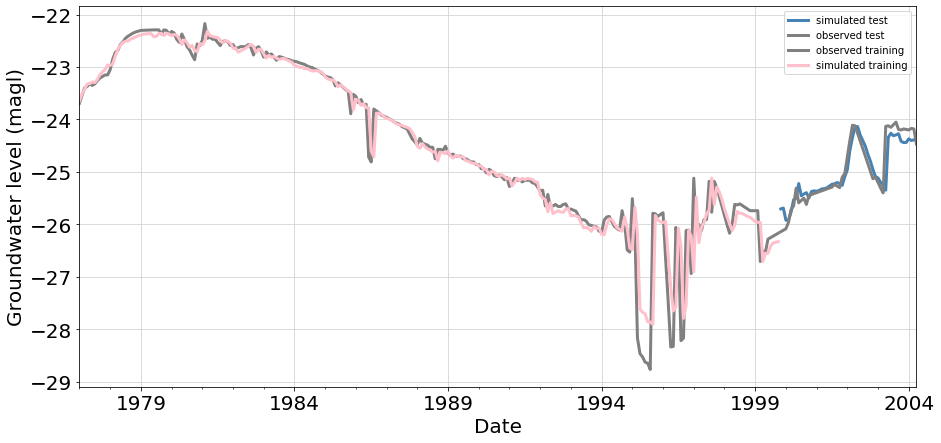

In [68]:
mse_gru = summary['mse_gru'].mean(axis=0)
rmse_gru= summary['rmse_gru'].mean(axis=0)
mae_gru = summary['mae_gru'].mean(axis=0)
r2_gru  = summary['r2_gru'].mean(axis=0)
stdv_gru= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gru, 3))
print("Mean squared error is:",round(mse_gru,3))
print("Root mean squared error is:",round(rmse_gru, 3))
print("Mean absolute error is:",round(mae_gru,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[274:328].index)
df1['observed test']      = pima.iloc[274:328, 0].values

df2 = pd.DataFrame(pima.iloc[0:274, 0].values, columns = ['observed training'],index =pima.iloc[0:274].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(15,7)

In [69]:
y_gru = out_df['simulated test']

### FFNN

In [70]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_ff', 'rmse_ff', 'r2_ff','mae_ff'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu', input_shape=(1,6)))

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu'))

    # Add fully connected layer with no activation function
    model.add(Dense(units=1))
    #model.add(Flatten())

    # Compile neural network
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    
    X_val_reshaped = X_val_reshaped.reshape(54, 6)

    #running function
    gwl = -1.09980612
    test_forecast = X_test
    steps_ahead = 54
    y_ff = forecast(model, test_forecast, gwl, steps_ahead)
    y_ff = np.array(y_ff)

     #metrics for test
    y_ff = y_pred
    test_pred.append(y_ff)
    mse_ff = mean_squared_error(y_test, y_ff)
    rmse_ff = np.sqrt(mse_ff)
    r2_ff = r2_score(y_test, y_ff)
    mae_ff = mean_absolute_error(y_test, y_ff)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_ff,Round), round(rmse_ff,Round), round(r2_ff,Round),round(mae_ff,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')  

Running fold 1
(274, 6)
Train on 274 samples, validate on 54 samples
Epoch 1/1000
 96/274 [=========>....................] - ETA: 5s - loss: 1.3129 - mean_squared_error: 1.3129
Epoch 00001: val_loss improved from inf to 0.12438, saving model to model.h5
274/274 [==============================] - 8s 29ms/sample - loss: 1.0880 - mean_squared_error: 1.0880 - val_loss: 0.1244 - val_mean_squared_error: 0.1244
Epoch 2/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.8587 - mean_squared_error: 0.8587
Epoch 00002: val_loss improved from 0.12438 to 0.08607, saving model to model.h5
274/274 [==============================] - 0s 391us/sample - loss: 0.8518 - mean_squared_error: 0.8518 - val_loss: 0.0861 - val_mean_squared_error: 0.0861
Epoch 3/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.7086 - mean_squared_error: 0.7086
Epoch 00003: val_loss improved from 0.08607 to 0.05947, saving model to model.h5
274/274 [==============================] - 0s 297us/sample 

Epoch 26/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0712 - mean_squared_error: 0.0712
Epoch 00026: val_loss did not improve from 0.02692
274/274 [==============================] - 0s 148us/sample - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 27/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0716 - mean_squared_error: 0.0716
Epoch 00027: val_loss did not improve from 0.02692
274/274 [==============================] - 0s 124us/sample - loss: 0.0774 - mean_squared_error: 0.0774 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 28/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0916 - mean_squared_error: 0.0916
Epoch 00028: val_loss did not improve from 0.02692
274/274 [==============================] - 0s 143us/sample - loss: 0.0668 - mean_squared_error: 0.0668 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 29/1000
 96/274 [=========>....................] 

Epoch 52/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0594 - mean_squared_error: 0.0594
Epoch 00052: val_loss did not improve from 0.02502
274/274 [==============================] - 0s 140us/sample - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 53/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0514 - mean_squared_error: 0.0514
Epoch 00053: val_loss did not improve from 0.02502
274/274 [==============================] - 0s 130us/sample - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 54/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0672 - mean_squared_error: 0.0672
Epoch 00054: val_loss did not improve from 0.02502
274/274 [==============================] - 0s 133us/sample - loss: 0.0717 - mean_squared_error: 0.0717 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 55/1000
 96/274 [=========>....................] 

Epoch 78/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0756 - mean_squared_error: 0.0756
Epoch 00078: val_loss improved from 0.02413 to 0.02396, saving model to model.h5
274/274 [==============================] - 0s 270us/sample - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 79/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0969 - mean_squared_error: 0.0969
Epoch 00079: val_loss did not improve from 0.02396
274/274 [==============================] - 0s 304us/sample - loss: 0.0668 - mean_squared_error: 0.0668 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 80/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 00080: val_loss did not improve from 0.02396
274/274 [==============================] - 0s 109us/sample - loss: 0.0702 - mean_squared_error: 0.0702 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 81/1000
 96/274 [==

Epoch 104/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0602 - mean_squared_error: 0.0602
Epoch 00104: val_loss did not improve from 0.02366
274/274 [==============================] - 0s 142us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 105/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00105: val_loss did not improve from 0.02366
274/274 [==============================] - 0s 171us/sample - loss: 0.0666 - mean_squared_error: 0.0666 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 106/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0514 - mean_squared_error: 0.0514
Epoch 00106: val_loss did not improve from 0.02366
274/274 [==============================] - 0s 118us/sample - loss: 0.0605 - mean_squared_error: 0.0605 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 107/1000
 96/274 [=========>..................

Epoch 130/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0897 - mean_squared_error: 0.0897
Epoch 00130: val_loss did not improve from 0.02366
274/274 [==============================] - 0s 124us/sample - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 131/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0611 - mean_squared_error: 0.0611
Epoch 00131: val_loss did not improve from 0.02366
274/274 [==============================] - 0s 125us/sample - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 132/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 00132: val_loss did not improve from 0.02366
274/274 [==============================] - 0s 138us/sample - loss: 0.0697 - mean_squared_error: 0.0697 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 133/1000
 96/274 [=========>..................

Epoch 156/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 00156: val_loss did not improve from 0.02352
274/274 [==============================] - 0s 146us/sample - loss: 0.0748 - mean_squared_error: 0.0748 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 157/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00157: val_loss did not improve from 0.02352
274/274 [==============================] - 0s 137us/sample - loss: 0.0557 - mean_squared_error: 0.0557 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 158/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0495 - mean_squared_error: 0.0495
Epoch 00158: val_loss did not improve from 0.02352
274/274 [==============================] - 0s 134us/sample - loss: 0.0575 - mean_squared_error: 0.0575 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 159/1000
 96/274 [=========>..................

Epoch 182/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0595 - mean_squared_error: 0.0595
Epoch 00182: val_loss did not improve from 0.02352
274/274 [==============================] - 0s 123us/sample - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 183/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0798 - mean_squared_error: 0.0798
Epoch 00183: val_loss did not improve from 0.02352
274/274 [==============================] - 0s 122us/sample - loss: 0.0730 - mean_squared_error: 0.0730 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 184/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00184: val_loss did not improve from 0.02352
274/274 [==============================] - 0s 175us/sample - loss: 0.0611 - mean_squared_error: 0.0611 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 185/1000
 96/274 [=========>..................

Epoch 208/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0963 - mean_squared_error: 0.0963
Epoch 00208: val_loss did not improve from 0.02352
274/274 [==============================] - 0s 140us/sample - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 209/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0706 - mean_squared_error: 0.0706
Epoch 00209: val_loss did not improve from 0.02352
274/274 [==============================] - 0s 126us/sample - loss: 0.0660 - mean_squared_error: 0.0660 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 210/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 00210: val_loss did not improve from 0.02352
274/274 [==============================] - 0s 139us/sample - loss: 0.0756 - mean_squared_error: 0.0756 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 211/1000
 96/274 [=========>..................

Epoch 234/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0576 - mean_squared_error: 0.0576
Epoch 00234: val_loss did not improve from 0.02346
274/274 [==============================] - 0s 231us/sample - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 235/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0687 - mean_squared_error: 0.0687
Epoch 00235: val_loss did not improve from 0.02346
274/274 [==============================] - 0s 278us/sample - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 236/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0623 - mean_squared_error: 0.0623
Epoch 00236: val_loss did not improve from 0.02346
274/274 [==============================] - 0s 198us/sample - loss: 0.0607 - mean_squared_error: 0.0607 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 237/1000
 96/274 [=========>..................

Epoch 260/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0386 - mean_squared_error: 0.0386
Epoch 00260: val_loss did not improve from 0.02346
274/274 [==============================] - 0s 207us/sample - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 261/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1051 - mean_squared_error: 0.1051
Epoch 00261: val_loss did not improve from 0.02346
274/274 [==============================] - 0s 417us/sample - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 262/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0568 - mean_squared_error: 0.0568
Epoch 00262: val_loss did not improve from 0.02346
274/274 [==============================] - 0s 355us/sample - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 263/1000
 96/274 [=========>..................

Epoch 286/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 00286: val_loss did not improve from 0.02346
274/274 [==============================] - 0s 153us/sample - loss: 0.0700 - mean_squared_error: 0.0700 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 287/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 00287: val_loss did not improve from 0.02346
274/274 [==============================] - 0s 142us/sample - loss: 0.0666 - mean_squared_error: 0.0666 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 288/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0417 - mean_squared_error: 0.0417
Epoch 00288: val_loss did not improve from 0.02346
274/274 [==============================] - 0s 174us/sample - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 289/1000
 96/274 [=========>..................

Epoch 312/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0667 - mean_squared_error: 0.0667
Epoch 00312: val_loss did not improve from 0.02346
274/274 [==============================] - 0s 142us/sample - loss: 0.0633 - mean_squared_error: 0.0633 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 313/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0565 - mean_squared_error: 0.0565
Epoch 00313: val_loss did not improve from 0.02346
274/274 [==============================] - 0s 125us/sample - loss: 0.0710 - mean_squared_error: 0.0710 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 314/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0724 - mean_squared_error: 0.0724
Epoch 00314: val_loss did not improve from 0.02346
274/274 [==============================] - 0s 126us/sample - loss: 0.0621 - mean_squared_error: 0.0621 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 315/1000
 96/274 [=========>..................

Epoch 14/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0908 - mean_squared_error: 0.0908
Epoch 00014: val_loss did not improve from 0.02372
274/274 [==============================] - 0s 172us/sample - loss: 0.0676 - mean_squared_error: 0.0676 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 15/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0665 - mean_squared_error: 0.0665
Epoch 00015: val_loss did not improve from 0.02372
274/274 [==============================] - 0s 132us/sample - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 16/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0606 - mean_squared_error: 0.0606
Epoch 00016: val_loss did not improve from 0.02372
274/274 [==============================] - 0s 146us/sample - loss: 0.0633 - mean_squared_error: 0.0633 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 17/1000
 96/274 [=========>....................] 

Epoch 40/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0851 - mean_squared_error: 0.0851
Epoch 00040: val_loss did not improve from 0.02359
274/274 [==============================] - 0s 154us/sample - loss: 0.0758 - mean_squared_error: 0.0758 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 41/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0526 - mean_squared_error: 0.0526
Epoch 00041: val_loss did not improve from 0.02359
274/274 [==============================] - 0s 141us/sample - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 42/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0397 - mean_squared_error: 0.0397
Epoch 00042: val_loss did not improve from 0.02359
274/274 [==============================] - 0s 125us/sample - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 43/1000
 96/274 [=========>....................] 

 96/274 [=========>....................] - ETA: 0s - loss: 0.0623 - mean_squared_error: 0.0623
Epoch 00066: val_loss did not improve from 0.02359
274/274 [==============================] - 0s 167us/sample - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 67/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0512 - mean_squared_error: 0.0512
Epoch 00067: val_loss did not improve from 0.02359
274/274 [==============================] - 0s 153us/sample - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 68/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0579 - mean_squared_error: 0.0579
Epoch 00068: val_loss did not improve from 0.02359
274/274 [==============================] - 0s 151us/sample - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 69/1000
 96/274 [=========>....................] - ETA: 0s - lo

 96/274 [=========>....................] - ETA: 0s - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 00092: val_loss did not improve from 0.02359
274/274 [==============================] - 0s 170us/sample - loss: 0.0674 - mean_squared_error: 0.0674 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 93/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0588 - mean_squared_error: 0.0588
Epoch 00093: val_loss did not improve from 0.02359
274/274 [==============================] - 0s 174us/sample - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 94/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0548 - mean_squared_error: 0.0548
Epoch 00094: val_loss did not improve from 0.02359
274/274 [==============================] - 0s 314us/sample - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 95/1000
 96/274 [=========>....................] - ETA: 0s - lo

Epoch 118/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 00118: val_loss did not improve from 0.02359
274/274 [==============================] - 0s 185us/sample - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Running fold 3
(274, 6)
Train on 274 samples, validate on 54 samples
Epoch 1/1000
 96/274 [=========>....................] - ETA: 5s - loss: 0.7620 - mean_squared_error: 0.7620
Epoch 00001: val_loss improved from inf to 0.04827, saving model to model.h5
274/274 [==============================] - 10s 36ms/sample - loss: 0.5362 - mean_squared_error: 0.5362 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 2/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.2475 - mean_squared_error: 0.2475
Epoch 00002: val_loss improved from 0.04827 to 0.02339, saving model to model.h5
274/274 [==============================] - 0s 351us/sample - loss: 0.1725 - mean_squar

Epoch 26/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 00026: val_loss did not improve from 0.02339
274/274 [==============================] - 0s 143us/sample - loss: 0.0814 - mean_squared_error: 0.0814 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 27/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0594 - mean_squared_error: 0.0594
Epoch 00027: val_loss did not improve from 0.02339
274/274 [==============================] - 0s 131us/sample - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 28/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0553 - mean_squared_error: 0.0553
Epoch 00028: val_loss did not improve from 0.02339
274/274 [==============================] - 0s 165us/sample - loss: 0.0593 - mean_squared_error: 0.0593 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 29/1000
 96/274 [=========>....................] 

 96/274 [=========>....................] - ETA: 0s - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 00052: val_loss did not improve from 0.02339
274/274 [==============================] - 0s 145us/sample - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 53/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0564 - mean_squared_error: 0.0564
Epoch 00053: val_loss did not improve from 0.02339
274/274 [==============================] - 0s 156us/sample - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 54/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0417 - mean_squared_error: 0.0417
Epoch 00054: val_loss did not improve from 0.02339
274/274 [==============================] - 0s 150us/sample - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 55/1000
 96/274 [=========>....................] - ETA: 0s - lo

 96/274 [=========>....................] - ETA: 0s - loss: 0.0605 - mean_squared_error: 0.0605
Epoch 00078: val_loss did not improve from 0.02339
274/274 [==============================] - 0s 188us/sample - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 79/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 00079: val_loss did not improve from 0.02339
274/274 [==============================] - 0s 165us/sample - loss: 0.0731 - mean_squared_error: 0.0731 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 80/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0544 - mean_squared_error: 0.0544
Epoch 00080: val_loss did not improve from 0.02339
274/274 [==============================] - 0s 182us/sample - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 81/1000
 96/274 [=========>....................] - ETA: 0s - lo

Epoch 2/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.4881 - mean_squared_error: 0.4881
Epoch 00002: val_loss improved from 0.08382 to 0.02764, saving model to model.h5
274/274 [==============================] - 0s 459us/sample - loss: 0.4184 - mean_squared_error: 0.4184 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 3/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1982 - mean_squared_error: 0.1982
Epoch 00003: val_loss improved from 0.02764 to 0.02557, saving model to model.h5
274/274 [==============================] - 0s 441us/sample - loss: 0.1386 - mean_squared_error: 0.1386 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 4/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0791 - mean_squared_error: 0.0791
Epoch 00004: val_loss did not improve from 0.02557
274/274 [==============================] - 0s 202us/sample - loss: 0.0729 - mean_squared_error: 0.0729 - val_loss: 0.0256 - val_mean_squared_error: 0.025

Epoch 28/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0545 - mean_squared_error: 0.0545
Epoch 00028: val_loss did not improve from 0.02362
274/274 [==============================] - 0s 237us/sample - loss: 0.0651 - mean_squared_error: 0.0651 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 29/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0667 - mean_squared_error: 0.0667
Epoch 00029: val_loss did not improve from 0.02362
274/274 [==============================] - 0s 156us/sample - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 30/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0517 - mean_squared_error: 0.0517
Epoch 00030: val_loss did not improve from 0.02362
274/274 [==============================] - 0s 178us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 31/1000
 96/274 [=========>....................] 

 96/274 [=========>....................] - ETA: 0s - loss: 0.0844 - mean_squared_error: 0.0844
Epoch 00054: val_loss did not improve from 0.02362
274/274 [==============================] - 0s 178us/sample - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 55/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0972 - mean_squared_error: 0.0972
Epoch 00055: val_loss did not improve from 0.02362
274/274 [==============================] - 0s 287us/sample - loss: 0.0733 - mean_squared_error: 0.0733 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 56/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 00056: val_loss did not improve from 0.02362
274/274 [==============================] - 0s 165us/sample - loss: 0.0607 - mean_squared_error: 0.0607 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 57/1000
 96/274 [=========>....................] - ETA: 0s - lo

 96/274 [=========>....................] - ETA: 0s - loss: 0.1007 - mean_squared_error: 0.1007
Epoch 00080: val_loss did not improve from 0.02362
274/274 [==============================] - 0s 182us/sample - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 81/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0792 - mean_squared_error: 0.0792
Epoch 00081: val_loss did not improve from 0.02362
274/274 [==============================] - 0s 243us/sample - loss: 0.0649 - mean_squared_error: 0.0649 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 82/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0355 - mean_squared_error: 0.0355
Epoch 00082: val_loss did not improve from 0.02362
274/274 [==============================] - 0s 171us/sample - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 83/1000
 96/274 [=========>....................] - ETA: 0s - lo

 96/274 [=========>....................] - ETA: 0s - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 00106: val_loss did not improve from 0.02362
274/274 [==============================] - 0s 192us/sample - loss: 0.0673 - mean_squared_error: 0.0673 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 107/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0598 - mean_squared_error: 0.0598
Epoch 00107: val_loss did not improve from 0.02362
274/274 [==============================] - 0s 262us/sample - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 108/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0420 - mean_squared_error: 0.0420
Epoch 00108: val_loss did not improve from 0.02362
274/274 [==============================] - 0s 199us/sample - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 109/1000
 96/274 [=========>....................] - ETA: 0s -

 96/274 [=========>....................] - ETA: 0s - loss: 0.1291 - mean_squared_error: 0.1291
Epoch 00011: val_loss did not improve from 0.02802
274/274 [==============================] - 0s 206us/sample - loss: 0.1148 - mean_squared_error: 0.1148 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 12/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 00012: val_loss did not improve from 0.02802
274/274 [==============================] - 0s 178us/sample - loss: 0.0773 - mean_squared_error: 0.0773 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 13/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0769 - mean_squared_error: 0.0769
Epoch 00013: val_loss did not improve from 0.02802
274/274 [==============================] - 0s 191us/sample - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 14/1000
 96/274 [=========>....................] - ETA: 0s - lo

Epoch 37/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0587 - mean_squared_error: 0.0587
Epoch 00037: val_loss did not improve from 0.02570
274/274 [==============================] - 0s 212us/sample - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 38/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0628 - mean_squared_error: 0.0628
Epoch 00038: val_loss did not improve from 0.02570
274/274 [==============================] - 0s 184us/sample - loss: 0.0729 - mean_squared_error: 0.0729 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 39/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0464 - mean_squared_error: 0.0464
Epoch 00039: val_loss did not improve from 0.02570
274/274 [==============================] - 0s 215us/sample - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 40/1000
 96/274 [=========>....................] 

 96/274 [=========>....................] - ETA: 0s - loss: 0.1097 - mean_squared_error: 0.1097
Epoch 00063: val_loss did not improve from 0.02570
274/274 [==============================] - 0s 190us/sample - loss: 0.0691 - mean_squared_error: 0.0691 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 64/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0676 - mean_squared_error: 0.0676
Epoch 00064: val_loss did not improve from 0.02570
274/274 [==============================] - 0s 257us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 65/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0820 - mean_squared_error: 0.0820
Epoch 00065: val_loss did not improve from 0.02570
274/274 [==============================] - 0s 196us/sample - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 66/1000
 96/274 [=========>....................] - ETA: 0s - lo

 96/274 [=========>....................] - ETA: 0s - loss: 0.0600 - mean_squared_error: 0.0600
Epoch 00089: val_loss did not improve from 0.02570
274/274 [==============================] - 0s 205us/sample - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 90/1000
192/274 [====================>.........] - ETA: 0s - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 00090: val_loss did not improve from 0.02570
274/274 [==============================] - 0s 664us/sample - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 91/1000
192/274 [====================>.........] - ETA: 0s - loss: 0.0846 - mean_squared_error: 0.0846
Epoch 00091: val_loss did not improve from 0.02570
274/274 [==============================] - 0s 451us/sample - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 92/1000
 96/274 [=========>....................] - ETA: 0s - lo

 96/274 [=========>....................] - ETA: 0s - loss: 0.0592 - mean_squared_error: 0.0592
Epoch 00115: val_loss did not improve from 0.02570
274/274 [==============================] - 0s 166us/sample - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 116/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0505 - mean_squared_error: 0.0505
Epoch 00116: val_loss did not improve from 0.02570
274/274 [==============================] - 0s 213us/sample - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 117/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1451 - mean_squared_error: 0.1451
Epoch 00117: val_loss did not improve from 0.02570
274/274 [==============================] - 0s 182us/sample - loss: 0.0941 - mean_squared_error: 0.0941 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 118/1000
 96/274 [=========>....................] - ETA: 0s -

Epoch 13/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1121 - mean_squared_error: 0.1121
Epoch 00013: val_loss did not improve from 0.02588
274/274 [==============================] - 0s 211us/sample - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 14/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0469 - mean_squared_error: 0.0469
Epoch 00014: val_loss did not improve from 0.02588
274/274 [==============================] - 0s 208us/sample - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 15/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0832 - mean_squared_error: 0.0832
Epoch 00015: val_loss did not improve from 0.02588
274/274 [==============================] - 0s 353us/sample - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 16/1000
 96/274 [=========>....................] 

Epoch 39/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0787 - mean_squared_error: 0.0787
Epoch 00039: val_loss did not improve from 0.02569
274/274 [==============================] - 0s 225us/sample - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 40/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0820 - mean_squared_error: 0.0820
Epoch 00040: val_loss did not improve from 0.02569
274/274 [==============================] - 0s 298us/sample - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 41/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0534 - mean_squared_error: 0.0534
Epoch 00041: val_loss did not improve from 0.02569
274/274 [==============================] - 0s 245us/sample - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 42/1000
 96/274 [=========>....................] 

192/274 [====================>.........] - ETA: 0s - loss: 0.0857 - mean_squared_error: 0.0857
Epoch 00065: val_loss did not improve from 0.02569
274/274 [==============================] - 0s 325us/sample - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 66/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0628 - mean_squared_error: 0.0628
Epoch 00066: val_loss did not improve from 0.02569
274/274 [==============================] - 0s 212us/sample - loss: 0.0673 - mean_squared_error: 0.0673 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 67/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0406 - mean_squared_error: 0.0406
Epoch 00067: val_loss did not improve from 0.02569
274/274 [==============================] - 0s 192us/sample - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 68/1000
 96/274 [=========>....................] - ETA: 0s - lo

Epoch 91/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0486 - mean_squared_error: 0.0486
Epoch 00091: val_loss did not improve from 0.02566
274/274 [==============================] - 0s 188us/sample - loss: 0.0674 - mean_squared_error: 0.0674 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 92/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1005 - mean_squared_error: 0.1005
Epoch 00092: val_loss did not improve from 0.02566
274/274 [==============================] - 0s 214us/sample - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 93/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0886 - mean_squared_error: 0.0886
Epoch 00093: val_loss did not improve from 0.02566
274/274 [==============================] - 0s 231us/sample - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 94/1000
 96/274 [=========>....................] 

Epoch 117/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0658 - mean_squared_error: 0.0658
Epoch 00117: val_loss did not improve from 0.02545
274/274 [==============================] - 0s 397us/sample - loss: 0.0700 - mean_squared_error: 0.0700 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 118/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 00118: val_loss did not improve from 0.02545
274/274 [==============================] - 0s 202us/sample - loss: 0.0603 - mean_squared_error: 0.0603 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 119/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0814 - mean_squared_error: 0.0814
Epoch 00119: val_loss did not improve from 0.02545
274/274 [==============================] - 0s 206us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 120/1000
 96/274 [=========>..................

Epoch 143/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0610 - mean_squared_error: 0.0610
Epoch 00143: val_loss did not improve from 0.02545
274/274 [==============================] - 0s 223us/sample - loss: 0.0705 - mean_squared_error: 0.0705 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 144/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 00144: val_loss did not improve from 0.02545
274/274 [==============================] - 0s 346us/sample - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 145/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0939 - mean_squared_error: 0.0939
Epoch 00145: val_loss did not improve from 0.02545
274/274 [==============================] - 0s 295us/sample - loss: 0.0622 - mean_squared_error: 0.0622 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 146/1000
 96/274 [=========>..................

Epoch 169/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0614 - mean_squared_error: 0.0614
Epoch 00169: val_loss did not improve from 0.02545
274/274 [==============================] - 0s 193us/sample - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 170/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0654 - mean_squared_error: 0.0654
Epoch 00170: val_loss did not improve from 0.02545
274/274 [==============================] - 0s 178us/sample - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 171/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0869 - mean_squared_error: 0.0869
Epoch 00171: val_loss did not improve from 0.02545
274/274 [==============================] - 0s 181us/sample - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 172/1000
 96/274 [=========>..................

Epoch 195/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 00195: val_loss did not improve from 0.02545
274/274 [==============================] - 0s 178us/sample - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.0287 - val_mean_squared_error: 0.0287
Epoch 196/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 00196: val_loss did not improve from 0.02545
274/274 [==============================] - 0s 239us/sample - loss: 0.0724 - mean_squared_error: 0.0724 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 197/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 00197: val_loss did not improve from 0.02545
274/274 [==============================] - 0s 180us/sample - loss: 0.0676 - mean_squared_error: 0.0676 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 198/1000
 96/274 [=========>..................

274/274 [==============================] - 0s 619us/sample - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 6/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0502 - mean_squared_error: 0.0502
Epoch 00006: val_loss did not improve from 0.02934
274/274 [==============================] - 0s 174us/sample - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 7/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0924 - mean_squared_error: 0.0924
Epoch 00007: val_loss improved from 0.02934 to 0.02921, saving model to model.h5
274/274 [==============================] - 0s 712us/sample - loss: 0.0816 - mean_squared_error: 0.0816 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 8/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0879 - mean_squared_error: 0.0879
Epoch 00008: val_loss improved from 0.02921 to 0.02730, saving model to model.h

 96/274 [=========>....................] - ETA: 0s - loss: 0.1079 - mean_squared_error: 0.1079
Epoch 00031: val_loss did not improve from 0.02627
274/274 [==============================] - 0s 174us/sample - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 32/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0560 - mean_squared_error: 0.0560
Epoch 00032: val_loss did not improve from 0.02627
274/274 [==============================] - 0s 211us/sample - loss: 0.0717 - mean_squared_error: 0.0717 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 33/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0501 - mean_squared_error: 0.0501
Epoch 00033: val_loss did not improve from 0.02627
274/274 [==============================] - 0s 181us/sample - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 34/1000
 96/274 [=========>....................] - ETA: 0s - lo

Epoch 57/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0615 - mean_squared_error: 0.0615
Epoch 00057: val_loss did not improve from 0.02586
274/274 [==============================] - 0s 250us/sample - loss: 0.0727 - mean_squared_error: 0.0727 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 58/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0798 - mean_squared_error: 0.0798
Epoch 00058: val_loss did not improve from 0.02586
274/274 [==============================] - 0s 225us/sample - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 59/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0769 - mean_squared_error: 0.0769
Epoch 00059: val_loss did not improve from 0.02586
274/274 [==============================] - 0s 236us/sample - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 60/1000
 96/274 [=========>....................] 

Epoch 83/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0849 - mean_squared_error: 0.0849
Epoch 00083: val_loss did not improve from 0.02500
274/274 [==============================] - 0s 208us/sample - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 84/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0846 - mean_squared_error: 0.0846
Epoch 00084: val_loss did not improve from 0.02500
274/274 [==============================] - 0s 203us/sample - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 85/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1135 - mean_squared_error: 0.1135
Epoch 00085: val_loss did not improve from 0.02500
274/274 [==============================] - 0s 194us/sample - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 86/1000
 96/274 [=========>....................] 

Epoch 109/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0909 - mean_squared_error: 0.0909
Epoch 00109: val_loss did not improve from 0.02500
274/274 [==============================] - 0s 219us/sample - loss: 0.0670 - mean_squared_error: 0.0670 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 110/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 00110: val_loss did not improve from 0.02500
274/274 [==============================] - 0s 204us/sample - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 111/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0770 - mean_squared_error: 0.0770
Epoch 00111: val_loss did not improve from 0.02500
274/274 [==============================] - 0s 231us/sample - loss: 0.0660 - mean_squared_error: 0.0660 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 112/1000
 96/274 [=========>..................

Epoch 135/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 00135: val_loss did not improve from 0.02500
274/274 [==============================] - 0s 209us/sample - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 136/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 00136: val_loss did not improve from 0.02500
274/274 [==============================] - 0s 238us/sample - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 137/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0569 - mean_squared_error: 0.0569
Epoch 00137: val_loss did not improve from 0.02500
274/274 [==============================] - 0s 205us/sample - loss: 0.0673 - mean_squared_error: 0.0673 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 138/1000
 96/274 [=========>..................

Epoch 161/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00161: val_loss did not improve from 0.02500
274/274 [==============================] - 0s 200us/sample - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 162/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0473 - mean_squared_error: 0.0473
Epoch 00162: val_loss did not improve from 0.02500
274/274 [==============================] - 0s 190us/sample - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 163/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0772 - mean_squared_error: 0.0772
Epoch 00163: val_loss did not improve from 0.02500
274/274 [==============================] - 0s 192us/sample - loss: 0.0692 - mean_squared_error: 0.0692 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 164/1000
 96/274 [=========>..................

 96/274 [=========>....................] - ETA: 0s - loss: 0.0578 - mean_squared_error: 0.0578
Epoch 00010: val_loss improved from 0.02898 to 0.02811, saving model to model.h5
274/274 [==============================] - 0s 713us/sample - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 11/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0941 - mean_squared_error: 0.0941
Epoch 00011: val_loss did not improve from 0.02811
274/274 [==============================] - 0s 208us/sample - loss: 0.0954 - mean_squared_error: 0.0954 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 12/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0818 - mean_squared_error: 0.0818
Epoch 00012: val_loss improved from 0.02811 to 0.02653, saving model to model.h5
274/274 [==============================] - 0s 690us/sample - loss: 0.0795 - mean_squared_error: 0.0795 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 13/

Epoch 36/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0900 - mean_squared_error: 0.0900
Epoch 00036: val_loss did not improve from 0.02530
274/274 [==============================] - 0s 219us/sample - loss: 0.0926 - mean_squared_error: 0.0926 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 37/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0678 - mean_squared_error: 0.0678
Epoch 00037: val_loss did not improve from 0.02530
274/274 [==============================] - 0s 197us/sample - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 38/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0661 - mean_squared_error: 0.0661
Epoch 00038: val_loss did not improve from 0.02530
274/274 [==============================] - 0s 187us/sample - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 39/1000
 96/274 [=========>....................] 

 96/274 [=========>....................] - ETA: 0s - loss: 0.0430 - mean_squared_error: 0.0430
Epoch 00062: val_loss did not improve from 0.02530
274/274 [==============================] - 0s 213us/sample - loss: 0.0978 - mean_squared_error: 0.0978 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 63/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0663 - mean_squared_error: 0.0663
Epoch 00063: val_loss did not improve from 0.02530
274/274 [==============================] - 0s 212us/sample - loss: 0.0749 - mean_squared_error: 0.0749 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 64/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0596 - mean_squared_error: 0.0596
Epoch 00064: val_loss did not improve from 0.02530
274/274 [==============================] - 0s 228us/sample - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 65/1000
 96/274 [=========>....................] - ETA: 0s - lo

 96/274 [=========>....................] - ETA: 0s - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 00088: val_loss did not improve from 0.02530
274/274 [==============================] - 0s 204us/sample - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 89/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1096 - mean_squared_error: 0.1096
Epoch 00089: val_loss did not improve from 0.02530
274/274 [==============================] - 0s 224us/sample - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 90/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 00090: val_loss did not improve from 0.02530
274/274 [==============================] - 0s 220us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 91/1000
 96/274 [=========>....................] - ETA: 0s - lo

 96/274 [=========>....................] - ETA: 0s - loss: 0.0579 - mean_squared_error: 0.0579
Epoch 00114: val_loss did not improve from 0.02530
274/274 [==============================] - 0s 246us/sample - loss: 0.0818 - mean_squared_error: 0.0818 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 115/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0772 - mean_squared_error: 0.0772
Epoch 00115: val_loss did not improve from 0.02530
274/274 [==============================] - 0s 298us/sample - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 116/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1235 - mean_squared_error: 0.1235
Epoch 00116: val_loss did not improve from 0.02530
274/274 [==============================] - 0s 206us/sample - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 117/1000
 96/274 [=========>....................] - ETA: 0s -

 96/274 [=========>....................] - ETA: 0s - loss: 0.4382 - mean_squared_error: 0.4382
Epoch 00007: val_loss improved from 0.03030 to 0.02898, saving model to model.h5
274/274 [==============================] - 0s 673us/sample - loss: 0.3580 - mean_squared_error: 0.3580 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 8/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1451 - mean_squared_error: 0.1451
Epoch 00008: val_loss did not improve from 0.02898
274/274 [==============================] - 0s 190us/sample - loss: 0.1043 - mean_squared_error: 0.1043 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 9/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0432 - mean_squared_error: 0.0432
Epoch 00009: val_loss did not improve from 0.02898
274/274 [==============================] - 0s 207us/sample - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 10/1000
 96/274 [=========>........

Epoch 33/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0942 - mean_squared_error: 0.0942
Epoch 00033: val_loss did not improve from 0.02693
274/274 [==============================] - 0s 247us/sample - loss: 0.0648 - mean_squared_error: 0.0648 - val_loss: 0.0385 - val_mean_squared_error: 0.0385
Epoch 34/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0833 - mean_squared_error: 0.0833
Epoch 00034: val_loss did not improve from 0.02693
274/274 [==============================] - 0s 196us/sample - loss: 0.0851 - mean_squared_error: 0.0851 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 35/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0677 - mean_squared_error: 0.0677
Epoch 00035: val_loss did not improve from 0.02693
274/274 [==============================] - 0s 220us/sample - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 36/1000
 96/274 [=========>....................] 

Epoch 59/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0471 - mean_squared_error: 0.0471
Epoch 00059: val_loss did not improve from 0.02693
274/274 [==============================] - 0s 226us/sample - loss: 0.0666 - mean_squared_error: 0.0666 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 60/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 00060: val_loss did not improve from 0.02693
274/274 [==============================] - 0s 213us/sample - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 61/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0507 - mean_squared_error: 0.0507
Epoch 00061: val_loss did not improve from 0.02693
274/274 [==============================] - 0s 208us/sample - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 62/1000
 96/274 [=========>....................] 

 96/274 [=========>....................] - ETA: 0s - loss: 0.1034 - mean_squared_error: 0.1034
Epoch 00085: val_loss did not improve from 0.02693
274/274 [==============================] - 0s 252us/sample - loss: 0.0939 - mean_squared_error: 0.0939 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 86/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0768 - mean_squared_error: 0.0768
Epoch 00086: val_loss did not improve from 0.02693
274/274 [==============================] - 0s 275us/sample - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 87/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0909 - mean_squared_error: 0.0909
Epoch 00087: val_loss did not improve from 0.02693
274/274 [==============================] - 0s 233us/sample - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 88/1000
 96/274 [=========>....................] - ETA: 0s - lo

 96/274 [=========>....................] - ETA: 0s - loss: 0.0645 - mean_squared_error: 0.0645
Epoch 00111: val_loss did not improve from 0.02693
274/274 [==============================] - 0s 235us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 112/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0699 - mean_squared_error: 0.0699
Epoch 00112: val_loss did not improve from 0.02693
274/274 [==============================] - 0s 216us/sample - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 113/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0400 - mean_squared_error: 0.0400
Epoch 00113: val_loss did not improve from 0.02693
274/274 [==============================] - 0s 239us/sample - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 114/1000
 96/274 [=========>....................] - ETA: 0s -

Epoch 137/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0579 - mean_squared_error: 0.0579
Epoch 00137: val_loss did not improve from 0.02685
274/274 [==============================] - 0s 241us/sample - loss: 0.0847 - mean_squared_error: 0.0847 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 138/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0537 - mean_squared_error: 0.0537
Epoch 00138: val_loss did not improve from 0.02685
274/274 [==============================] - 0s 299us/sample - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 139/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0930 - mean_squared_error: 0.0930
Epoch 00139: val_loss did not improve from 0.02685
274/274 [==============================] - 0s 224us/sample - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 140/1000
 96/274 [=========>..................

Epoch 163/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1191 - mean_squared_error: 0.1191
Epoch 00163: val_loss did not improve from 0.02663
274/274 [==============================] - 0s 325us/sample - loss: 0.0691 - mean_squared_error: 0.0691 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 164/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0750 - mean_squared_error: 0.0750
Epoch 00164: val_loss did not improve from 0.02663
274/274 [==============================] - 0s 306us/sample - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 165/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1210 - mean_squared_error: 0.1210
Epoch 00165: val_loss did not improve from 0.02663
274/274 [==============================] - 0s 286us/sample - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 166/1000
 96/274 [=========>..................

Epoch 189/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0696 - mean_squared_error: 0.0696
Epoch 00189: val_loss did not improve from 0.02617
274/274 [==============================] - 0s 214us/sample - loss: 0.0733 - mean_squared_error: 0.0733 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 190/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0702 - mean_squared_error: 0.0702
Epoch 00190: val_loss did not improve from 0.02617
274/274 [==============================] - 0s 214us/sample - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 191/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0736 - mean_squared_error: 0.0736
Epoch 00191: val_loss did not improve from 0.02617
274/274 [==============================] - 0s 224us/sample - loss: 0.0755 - mean_squared_error: 0.0755 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 192/1000
 96/274 [=========>..................

Epoch 215/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 00215: val_loss did not improve from 0.02617
274/274 [==============================] - 0s 234us/sample - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 216/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0550 - mean_squared_error: 0.0550
Epoch 00216: val_loss did not improve from 0.02617
274/274 [==============================] - 0s 259us/sample - loss: 0.0729 - mean_squared_error: 0.0729 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 217/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0774 - mean_squared_error: 0.0774
Epoch 00217: val_loss did not improve from 0.02617
274/274 [==============================] - 0s 351us/sample - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 218/1000
 96/274 [=========>..................

Epoch 241/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0355 - mean_squared_error: 0.0355
Epoch 00241: val_loss did not improve from 0.02617
274/274 [==============================] - 0s 225us/sample - loss: 0.0748 - mean_squared_error: 0.0748 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 242/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0729 - mean_squared_error: 0.0729
Epoch 00242: val_loss did not improve from 0.02617
274/274 [==============================] - 0s 244us/sample - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.0319 - val_mean_squared_error: 0.0319
Epoch 243/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0441 - mean_squared_error: 0.0441
Epoch 00243: val_loss did not improve from 0.02617
274/274 [==============================] - 0s 224us/sample - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 244/1000
 96/274 [=========>..................

Epoch 267/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0962 - mean_squared_error: 0.0962
Epoch 00267: val_loss did not improve from 0.02617
274/274 [==============================] - 0s 252us/sample - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 268/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0974 - mean_squared_error: 0.0974
Epoch 00268: val_loss did not improve from 0.02617
274/274 [==============================] - 0s 233us/sample - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 269/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1232 - mean_squared_error: 0.1232
Epoch 00269: val_loss did not improve from 0.02617
274/274 [==============================] - 0s 233us/sample - loss: 0.0900 - mean_squared_error: 0.0900 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 270/1000
 96/274 [=========>..................

274/274 [==============================] - 0s 798us/sample - loss: 0.0940 - mean_squared_error: 0.0940 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 5/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.1047 - mean_squared_error: 0.1047
Epoch 00005: val_loss did not improve from 0.02504
274/274 [==============================] - 0s 203us/sample - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 6/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0526 - mean_squared_error: 0.0526
Epoch 00006: val_loss did not improve from 0.02504
274/274 [==============================] - 0s 218us/sample - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 7/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0761 - mean_squared_error: 0.0761
Epoch 00007: val_loss did not improve from 0.02504
274/274 [==============================] - 0s 199us/sample

Epoch 31/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 00031: val_loss did not improve from 0.02504
274/274 [==============================] - 0s 213us/sample - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 32/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0840 - mean_squared_error: 0.0840
Epoch 00032: val_loss did not improve from 0.02504
274/274 [==============================] - 0s 208us/sample - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 33/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0638 - mean_squared_error: 0.0638
Epoch 00033: val_loss did not improve from 0.02504
274/274 [==============================] - 0s 274us/sample - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 34/1000
 96/274 [=========>....................] 

 96/274 [=========>....................] - ETA: 0s - loss: 0.0935 - mean_squared_error: 0.0935
Epoch 00057: val_loss did not improve from 0.02504
274/274 [==============================] - 0s 243us/sample - loss: 0.0915 - mean_squared_error: 0.0915 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 58/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0605 - mean_squared_error: 0.0605
Epoch 00058: val_loss did not improve from 0.02504
274/274 [==============================] - 0s 245us/sample - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 59/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0737 - mean_squared_error: 0.0737
Epoch 00059: val_loss did not improve from 0.02504
274/274 [==============================] - 0s 231us/sample - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 60/1000
 96/274 [=========>....................] - ETA: 0s - lo

 96/274 [=========>....................] - ETA: 0s - loss: 0.0578 - mean_squared_error: 0.0578
Epoch 00083: val_loss did not improve from 0.02504
274/274 [==============================] - 0s 259us/sample - loss: 0.0733 - mean_squared_error: 0.0733 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 84/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0751 - mean_squared_error: 0.0751
Epoch 00084: val_loss did not improve from 0.02504
274/274 [==============================] - 0s 248us/sample - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 85/1000
 96/274 [=========>....................] - ETA: 0s - loss: 0.0722 - mean_squared_error: 0.0722
Epoch 00085: val_loss did not improve from 0.02504
274/274 [==============================] - 0s 265us/sample - loss: 0.0557 - mean_squared_error: 0.0557 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 86/1000
 96/274 [=========>....................] - ETA: 0s - lo

In [71]:
summary

Iteration_No  mse_ff  rmse_ff  r2_ff  mae_ff
0   Iteration_1   0.026     0.16  0.855   0.104
1   Iteration_2   0.026     0.16  0.855   0.104
2   Iteration_3   0.026     0.16  0.855   0.104
3   Iteration_4   0.026     0.16  0.855   0.104
4   Iteration_5   0.026     0.16  0.855   0.104
5   Iteration_6   0.026     0.16  0.855   0.104
6   Iteration_7   0.026     0.16  0.855   0.104
7   Iteration_8   0.026     0.16  0.855   0.104
8   Iteration_9   0.026     0.16  0.855   0.104
9  Iteration_10   0.026     0.16  0.855   0.104

In [72]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:274, 6].values

In [73]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[274:328, 6].values


In [74]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'Precipitation_log', 'scenario_usage_log', 't_1', 't_2']]
a = a.iloc[:274]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'Precipitation_log', 'scenario_usage_log', 't_1', 't_2']]
b = b.iloc[274:328]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.065
Root mean squared error is: 0.255
Mean absolute error is: 0.16
R^2 score is:  0.943

The model performance for the test set
--------------------------------------
R^2 score is:  0.855
Mean squared error is: 0.026
Root mean squared error is: 0.16
Mean absolute error is: 0.104


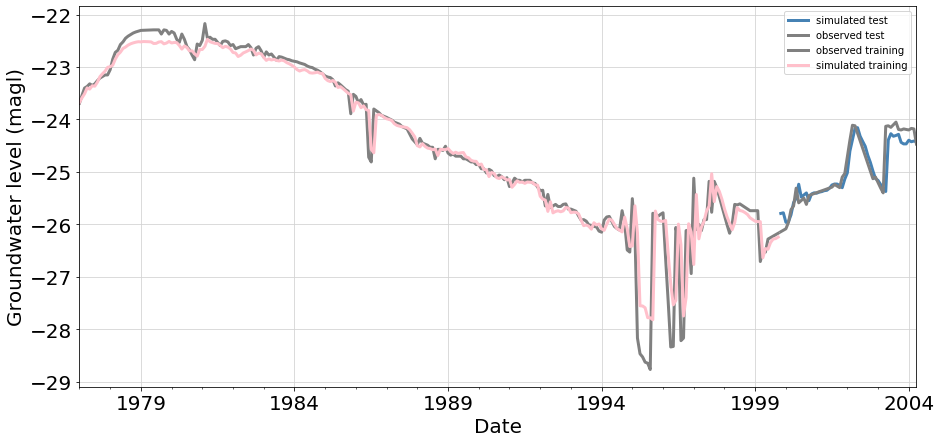

In [75]:
mse_ff = summary['mse_ff'].mean(axis=0)
rmse_ff= summary['rmse_ff'].mean(axis=0)
mae_ff = summary['mae_ff'].mean(axis=0)
r2_ff  = summary['r2_ff'].mean(axis=0)
stdv_ff= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_ff, 3))
print("Mean squared error is:",round(mse_ff,3))
print("Root mean squared error is:",round(rmse_ff, 3))
print("Mean absolute error is:",round(mae_ff,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[274:328].index)
df1['observed test']      = pima.iloc[274:328, 0].values

df2 = pd.DataFrame(pima.iloc[0:274, 0].values, columns = ['observed training'],index =pima.iloc[0:274].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(15,7)

In [76]:
y_ff = out_df['simulated test']

## Static Models

In [77]:
pima2  = pima[['Discharge_log', 'Temperature_log', 'Precipitation_log', 'scenario_usage_log', 't_1', 't_2','D4N0142']]

In [78]:
X = pima2[['Discharge_log' ,'Precipitation_log' ,'Discharge_log','scenario_usage_log' ,'t_1', 't_2']].values
y = pima2['D4N0142'].values
y = y.reshape(-1,1)

In [79]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(274, 6) (274, 1)
(54, 6) (54, 1)


In [80]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.fit(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### Decision Tree

In [81]:
from sklearn.metrics import *
import numpy as np
import csv  

from sklearn.tree import DecisionTreeRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_dc', 'rmse_dc', 'r2_dc','mae_dc'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = DecisionTreeRegressor(max_features='auto') #random state is so i get same results whenever i run the regressor
    regressor.fit(X_train,y_train)
    y_dc = regressor.predict(X_test)

    #metrics for test
    y_dc = y_dc
    test_pred.append(y_dc)
    mse_dc = mean_squared_error(y_test, y_dc)
    rmse_dc = np.sqrt(mse_dc)
    r2_dc = r2_score(y_test, y_dc)
    mae_dc = mean_absolute_error(y_test, y_dc)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_dc,Round), round(rmse_dc,Round), round(r2_dc,Round),round(mae_dc,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(274, 6)
Running fold 2
(274, 6)
Running fold 3
(274, 6)
Running fold 4
(274, 6)
Running fold 5
(274, 6)
Running fold 6
(274, 6)
Running fold 7
(274, 6)
Running fold 8
(274, 6)
Running fold 9
(274, 6)
Running fold 10
(274, 6)


In [82]:
summary

Iteration_No  mse_dc  rmse_dc  r2_dc  mae_dc
0   Iteration_1   0.385    0.620  0.010   0.400
1   Iteration_2   0.551    0.742 -0.419   0.511
2   Iteration_3   0.430    0.656 -0.108   0.427
3   Iteration_4   0.527    0.726 -0.356   0.506
4   Iteration_5   0.411    0.641 -0.058   0.411
5   Iteration_6   0.459    0.677 -0.181   0.456
6   Iteration_7   0.428    0.654 -0.103   0.447
7   Iteration_8   0.553    0.744 -0.424   0.511
8   Iteration_9   0.428    0.655 -0.103   0.421
9  Iteration_10   0.403    0.635 -0.039   0.402

In [83]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:274, 6].values

In [84]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.0
Root mean squared error is: 0.0
Mean absolute error is: 0.0
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  -0.178
Mean squared error is: 0.458
Root mean squared error is: 0.675
Mean absolute error is: 0.449


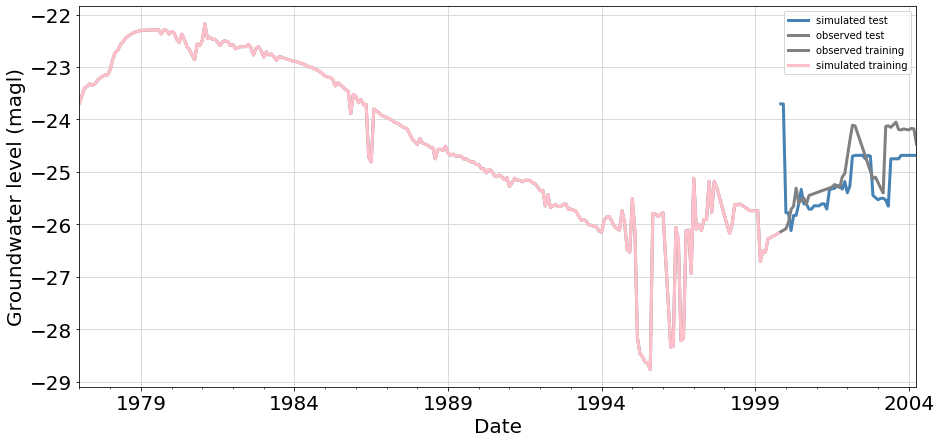

In [85]:
mse_dc = summary['mse_dc'].mean(axis=0)
rmse_dc = summary['rmse_dc'].mean(axis=0)
mae_dc = summary['mae_dc'].mean(axis=0)
r2_dc  = summary['r2_dc'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_dc, 3))
print("Mean squared error is:",round(mse_dc,3))
print("Root mean squared error is:",round(rmse_dc, 3))
print("Mean absolute error is:",round(mae_dc,3))




df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[274:328].index)
df1['observed test']      = pima.iloc[274:328, 0].values

df2 = pd.DataFrame(pima.iloc[0:274, 0].values, columns = ['observed training'],index =pima.iloc[0:274].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(15,7)

### SVR

In [86]:
from sklearn.svm import SVR

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_svr', 'rmse_svr', 'r2_svr','mae_svr'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)
    
    regressor = SVR(kernel='rbf', epsilon=0.1, C=1, degree=4 ,gamma='auto') 
    regressor.fit(X_train,y_train)
    y_svr = regressor.predict(X_test)

    #metrics for test
    y_svr = y_svr
    test_pred.append(y_svr)
    mse_svr = mean_squared_error(y_test, y_svr)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test, y_svr)
    mae_svr = mean_absolute_error(y_test, y_svr)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_svr,Round), round(rmse_svr,Round), round(r2_svr,Round),round(mae_svr,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(274, 6)
Running fold 2
(274, 6)
Running fold 3
(274, 6)
Running fold 4
(274, 6)
Running fold 5
(274, 6)
Running fold 6
(274, 6)
Running fold 7
(274, 6)
Running fold 8
(274, 6)
Running fold 9
(274, 6)
Running fold 10
(274, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [87]:
summary

Iteration_No  mse_svr  rmse_svr  r2_svr  mae_svr
0   Iteration_1    0.062     0.248   0.841     0.15
1   Iteration_2    0.062     0.248   0.841     0.15
2   Iteration_3    0.062     0.248   0.841     0.15
3   Iteration_4    0.062     0.248   0.841     0.15
4   Iteration_5    0.062     0.248   0.841     0.15
5   Iteration_6    0.062     0.248   0.841     0.15
6   Iteration_7    0.062     0.248   0.841     0.15
7   Iteration_8    0.062     0.248   0.841     0.15
8   Iteration_9    0.062     0.248   0.841     0.15
9  Iteration_10    0.062     0.248   0.841     0.15

In [88]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:274, 6].values

In [89]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.174
Root mean squared error is: 0.417
Mean absolute error is: 0.179
R^2 score is:  0.931

The model performance for the test set
--------------------------------------
R^2 score is:  0.841
Mean squared error is: 0.062
Root mean squared error is: 0.248
Mean absolute error is: 0.15


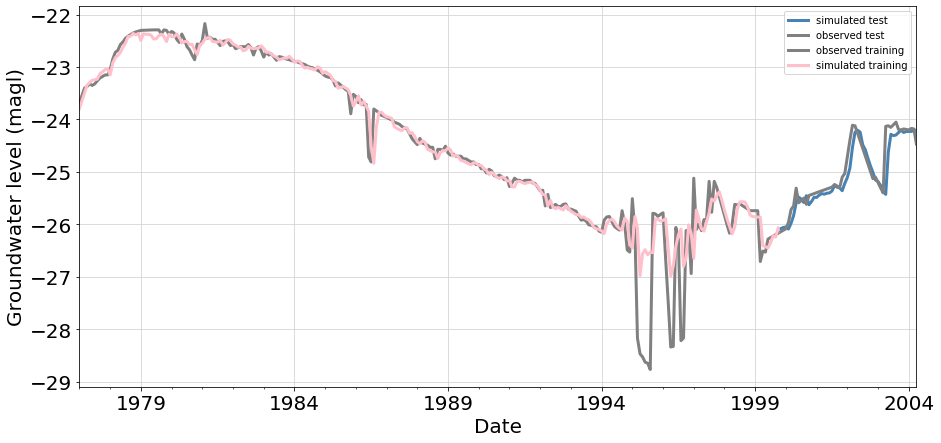

In [90]:
mse_svr  = summary['mse_svr'].mean(axis=0)
rmse_svr = summary['rmse_svr'].mean(axis=0)
mae_svr  = summary['mae_svr'].mean(axis=0)
r2_svr   = summary['r2_svr'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_svr, 3))
print("Mean squared error is:",round(mse_svr,3))
print("Root mean squared error is:",round(rmse_svr, 3))
print("Mean absolute error is:",round(mae_svr,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[274:328].index)
df1['observed test']      = pima.iloc[274:328, 0].values

df2 = pd.DataFrame(pima.iloc[0:274, 0].values, columns = ['observed training'],index =pima.iloc[0:274].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(15,7)

### GradientBoostingRegressor

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gb', 'rmse_gb', 'r2_gb','mae_gb'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = GradientBoostingRegressor()
    regressor.fit(X_train,y_train)
    y_gb = regressor.predict(X_test)

    #metrics for test
    y_gb = y_gb
    test_pred.append(y_gb)
    mse_gb = mean_squared_error(y_test, y_gb)
    rmse_gb = np.sqrt(mse_gb)
    r2_gb = r2_score(y_test, y_gb)
    mae_gb = mean_absolute_error(y_test, y_gb)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gb,Round), round(rmse_gb,Round), round(r2_gb,Round),round(mae_gb,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(274, 6)
Running fold 2
(274, 6)
Running fold 3
(274, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Running fold 4
(274, 6)
Running fold 5
(274, 6)
Running fold 6
(274, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Running fold 7
(274, 6)
Running fold 8
(274, 6)
Running fold 9
(274, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Running fold 10
(274, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [92]:
summary

Iteration_No  mse_gb  rmse_gb  r2_gb  mae_gb
0   Iteration_1   0.174    0.417  0.552   0.281
1   Iteration_2   0.163    0.404  0.579   0.269
2   Iteration_3   0.167    0.409  0.570   0.277
3   Iteration_4   0.177    0.421  0.544   0.289
4   Iteration_5   0.182    0.426  0.532   0.294
5   Iteration_6   0.179    0.423  0.539   0.286
6   Iteration_7   0.175    0.418  0.551   0.282
7   Iteration_8   0.175    0.418  0.550   0.282
8   Iteration_9   0.165    0.406  0.575   0.273
9  Iteration_10   0.168    0.410  0.568   0.273

In [93]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:274, 6].values

In [94]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.011
Root mean squared error is: 0.103
Mean absolute error is: 0.064
R^2 score is:  0.996

The model performance for the test set
--------------------------------------
R^2 score is:  0.556
Mean squared error is: 0.173
Root mean squared error is: 0.415
Mean absolute error is: 0.281


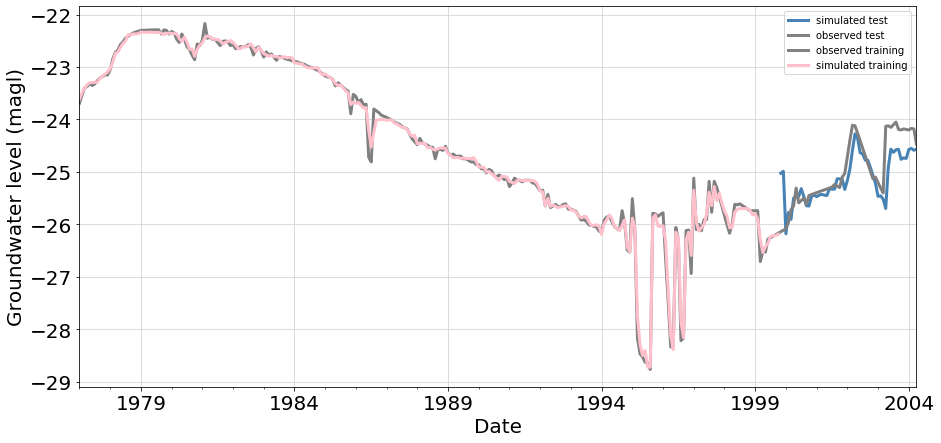

In [95]:
mse_gb  = summary['mse_gb'].mean(axis=0)
rmse_gb = summary['rmse_gb'].mean(axis=0)
mae_gb  = summary['mae_gb'].mean(axis=0)
r2_gb   = summary['r2_gb'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gb, 3))
print("Mean squared error is:",round(mse_gb,3))
print("Root mean squared error is:",round(rmse_gb, 3))
print("Mean absolute error is:",round(mae_gb,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[274:328].index)
df1['observed test']      = pima.iloc[274:328, 0].values

df2 = pd.DataFrame(pima.iloc[0:274, 0].values, columns = ['observed training'],index =pima.iloc[0:274].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(15,7)

### Randon Forest

In [96]:
from sklearn.ensemble import RandomForestRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_rf', 'rmse_rf', 'r2_rf','mae_rf'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)



    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train, y_train)
    y_rf = rf.predict(X_test)

    #metrics for test
    y_rf= y_rf
    test_pred.append(y_rf)
    mse_rf= mean_squared_error(y_test, y_rf)
    rmse_rf= np.sqrt(mse_rf)
    r2_rf= r2_score(y_test, y_rf)
    mae_rf= mean_absolute_error(y_test, y_rf)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_rf,Round), round(rmse_rf,Round), round(r2_rf,Round),round(mae_rf,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(274, 6)
Running fold 2
(274, 6)
Running fold 3
(274, 6)
Running fold 4
(274, 6)
Running fold 5
(274, 6)
Running fold 6
(274, 6)
Running fold 7
(274, 6)
Running fold 8
(274, 6)
Running fold 9
(274, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-

Running fold 10
(274, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [97]:
summary

Iteration_No  mse_rf  rmse_rf  r2_rf  mae_rf
0   Iteration_1   0.224    0.473  0.423   0.327
1   Iteration_2   0.128    0.357  0.671   0.244
2   Iteration_3   0.285    0.534  0.266   0.353
3   Iteration_4   0.217    0.465  0.442   0.302
4   Iteration_5   0.151    0.389  0.611   0.242
5   Iteration_6   0.125    0.353  0.679   0.217
6   Iteration_7   0.142    0.376  0.635   0.241
7   Iteration_8   0.132    0.364  0.660   0.243
8   Iteration_9   0.122    0.350  0.685   0.207
9  Iteration_10   0.224    0.473  0.423   0.312

In [98]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:274, 6].values

In [99]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.011
Root mean squared error is: 0.103
Mean absolute error is: 0.064
R^2 score is:  0.996

The model performance for the test set
--------------------------------------
R^2 score is:  0.549
Mean squared error is: 0.175
Root mean squared error is: 0.413
Mean absolute error is: 0.269


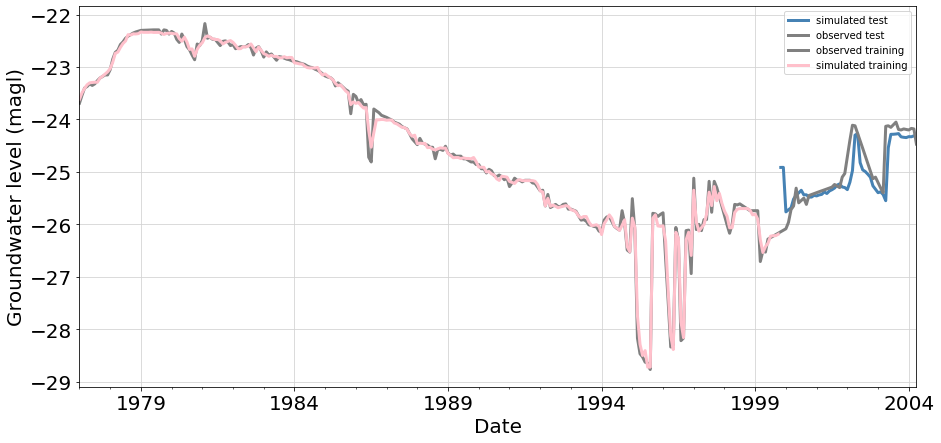

In [100]:
mse_rf  = summary['mse_rf'].mean(axis=0)
rmse_rf = summary['rmse_rf'].mean(axis=0)
mae_rf  = summary['mae_rf'].mean(axis=0)
r2_rf   = summary['r2_rf'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_rf, 3))
print("Mean squared error is:",round(mse_rf,3))
print("Root mean squared error is:",round(rmse_rf, 3))
print("Mean absolute error is:",round(mae_rf,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[274:328].index)
df1['observed test']      = pima.iloc[274:328, 0].values

df2 = pd.DataFrame(pima.iloc[0:274, 0].values, columns = ['observed training'],index =pima.iloc[0:274].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(15,7)

In [101]:
vs = pd.DataFrame(pima.iloc[274:328, 0].values, columns = ['Observed'],index =pima.iloc[274:328].index)
vs['SVR'] = y_svr
vs['GB'] = y_gb
vs['RF'] = y_rf
vs['DC'] = y_dc
vs['LSTM'] = y_lstm
vs['GRU'] = y_gru
vs['FFNN'] = y_ff

Text(0, 0.5, 'Groundwater levels (magl)')

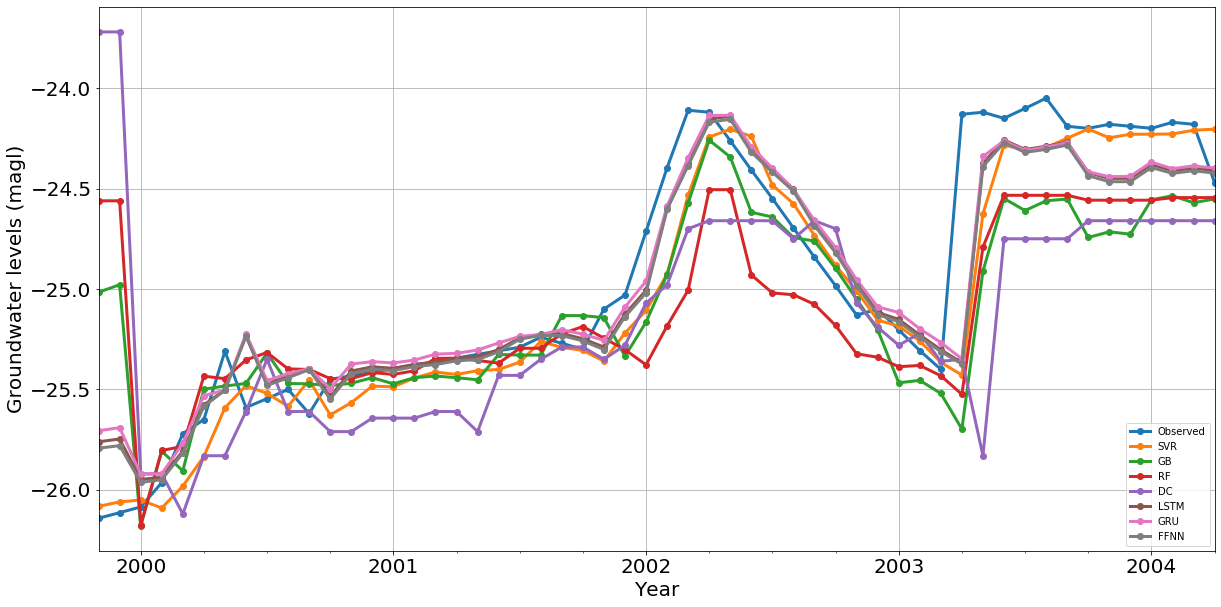

In [102]:
vs.plot(figsize=(20,10), linewidth=3, fontsize = 20, grid=True, marker='o')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Groundwater levels (magl)",fontsize=20)